In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = [0,1]
mu2 = [3,3]
m1=200
m2=200
cov = [[1, 0], [0, 1]] 
# cov2 = np.identity(2)
# x1, y1 = np.random.multivariate_normal(m1, cov, 100).T
# x2, y2 = np.random.multivariate_normal(m2, cov, 100).T
X1 = np.random.multivariate_normal(mu1, cov, m1)
X2 = np.random.multivariate_normal(mu2, cov, m2)
plt.plot(X1[:,0],X1[:,1],'y+',label='class1')
plt.plot(X2[:,0],X2[:,1],'ro',label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('classification problem')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
m=m1+m2
X=np.concatenate([X1, X2],0)

y=np.concatenate([np.zeros([m1,1]),np.ones([m2,1])])

In [3]:
def sigmoid(theta,X):
    return (1/(1+np.exp(-theta.T*X)))

def loglike(theta,X,y):
    h = sigmoid(theta,X)
    return np.sum(np.multiply(y,np.log(h))+np.multiply((1-y),np.log(1-h)))

def h(theta,X):
    return sigmoid(theta,X)

m=m1+m2

X= np.concatenate([X1,X2],0)
X = np.concatenate([np.ones([m,1]),X],1).T
theta = np.matrix([0.1,0.1,0.1]).T
print(theta.shape)
y = np.concatenate([np.zeros([m1,1]), np.ones([m2,1])],0)
x_concatenated = np.matrix(X)
y_mat = np.matrix(y)

(3, 1)


In [4]:
alpha =0.00001

def gradient(theta,X,y):
    return (-h(theta,X)+y.T).dot(X.T)

def gradient_ascent_1(alpha,theta,X,y):
    j_iter=[]
    theta_iter = [[],[]]
    go = 1
    i = 1
    j_iter.append(loglike(theta,X,y.T))
    print(j_iter[0])
    while go:
        theta = theta + alpha *(gradient(theta,X,y).T)
        j_iter.append(loglike(theta,X,y.T))
        print(j_iter[-1])
        if abs(j_iter[i]-j_iter[i-1])<0.00001:
            go = 0
        else:
            go = 1
            i=i+1
        theta_iter = np.append(theta_iter, theta)
    return theta,j_iter,theta_iter,i


theta_opt,j_iter,theta_iter,counter = gradient_ascent_1(alpha,theta,x_concatenated,y_mat)

-243.60991031925988
-243.24607724625338
-242.88691740971765
-242.5323340043356
-242.18223250943956
-241.83652063194876
-241.49510825069456
-241.1579073621068
-240.82483202723563
-240.49579832008158
-240.1707242772089
-239.84952984861434
-239.53213684982575
-239.21846891520408
-238.90845145242292
-238.60201159809932
-238.29907817454995
-237.9995816476481
-237.70345408575517
-237.41062911970232
-237.1210419037978
-236.83462907783507
-236.55132873007892
-236.27108036120447
-235.9938248491674
-235.71950441498166
-235.44806258938277
-235.1794441803544
-234.91359524149695
-234.65046304121665
-234.38999603271475
-234.1321438247565
-233.87685715319952
-233.6240878532627
-233.3737888325161
-233.12591404457376
-232.88041846347016
-232.63725805870394
-232.39638977093009
-232.1577714882846
-231.92136202332424
-231.68712109056594
-231.45500928460925
-231.22498805882702
-230.99701970460893
-230.77106733114306
-230.54709484572163
-230.3250669345565
-230.10494904409111
-229.8867073627954
-229.67030880

-188.27911223626566
-188.20566043734306
-188.1323051037282
-188.05904599746125
-187.98588288187304
-187.91281552157133
-187.83984368242727
-187.76696713156178
-187.69418563733257
-187.62149896932084
-187.54890689831865
-187.47640919631596
-187.40400563648842
-187.33169599318467
-187.25948004191434
-187.18735755933614
-187.11532832324582
-187.04339211256456
-186.97154870732746
-186.899797888672
-186.82813943882715
-186.756573141102
-186.68509877987498
-186.61371614058302
-186.54242500971105
-186.4712251747814
-186.40011642434342
-186.3290985479635
-186.2581713362148
-186.1873345806672
-186.11658807387812
-186.04593160938202
-185.97536498168145
-185.90488798623744
-185.8345004194603
-185.76420207870024
-185.69399276223862
-185.62387226927893
-185.55384039993788
-185.48389695523682
-185.4140417370932
-185.34427454831211
-185.27459519257783
-185.20500347444568
-185.1354991993338
-185.06608217351538
-184.9967522041105
-184.92750909907835
-184.8583526672096
-184.78928271811878
-184.720299062

-155.34120911170817
-155.30288565489747
-155.2645945317119
-155.22633569538633
-155.1881090992461
-155.14991469670701
-155.11175244127503
-155.07362228654623
-155.03552418620632
-154.99745809403066
-154.95942396388403
-154.92142174972042
-154.88345140558263
-154.8455128856024
-154.807606144
-154.76973113508404
-154.73188781325138
-154.69407613298674
-154.6562960488627
-154.61854751553946
-154.58083048776447
-154.54314492037244
-154.50549076828509
-154.4678679865108
-154.43027653014474
-154.39271635436825
-154.3551874144491
-154.31768966574086
-154.28022306368305
-154.24278756380073
-154.20538312170444
-154.16800969308989
-154.13066723373782
-154.09335569951395
-154.0560750463685
-154.01882523033623
-153.98160620753617
-153.9444179341714
-153.90726036652893
-153.87013346097945
-153.83303717397723
-153.7959714620597
-153.7589362818477
-153.72193159004473
-153.6849573434373
-153.6480134988944
-153.61110001336732
-153.5742168438898
-153.5373639475773
-153.50054128162742
-153.46374880331925

-135.08168946534505
-135.0578376103963
-135.0339998745853
-135.01017624323612
-134.98636670169492
-134.96257123532996
-134.93878982953163
-134.91502246971226
-134.89126914130617
-134.8675298297697
-134.84380452058096
-134.82009319923998
-134.79639585126864
-134.77271246221048
-134.74904301763087
-134.72538750311685
-134.70174590427706
-134.67811820674177
-134.6545043961628
-134.63090445821356
-134.60731837858887
-134.58374614300502
-134.5601877371997
-134.53664314693197
-134.51311235798215
-134.48959535615194
-134.46609212726423
-134.44260265716312
-134.41912693171383
-134.39566493680277
-134.37221665833738
-134.3487820822462
-134.32536119447863
-134.30195398100523
-134.2785604278173
-134.25518052092715
-134.23181424636792
-134.20846159019345
-134.18512253847848
-134.1617970773184
-134.1384851928293
-134.1151868711479
-134.0919020984316
-134.06863086085826
-134.04537314462638
-134.02212893595487
-133.9988982210832
-133.97568098627113
-133.95247721779884
-133.92928690196695
-133.9061100

-122.25714487275962
-122.2400329360217
-122.22292893635642
-122.20583286749542
-122.18874472317769
-122.17166449714969
-122.15459218316526
-122.13752777498553
-122.12047126637901
-122.10342265112156
-122.08638192299637
-122.0693490757939
-122.05232410331199
-122.03530699935571
-122.01829775773743
-122.00129637227676
-121.98430283680064
-121.96731714514323
-121.9503392911459
-121.93336926865722
-121.91640707153304
-121.89945269363642
-121.88250612883758
-121.86556737101382
-121.8486364140498
-121.8317132518372
-121.81479787827493
-121.79789028726901
-121.78099047273248
-121.7640984285857
-121.74721414875594
-121.7303376271777
-121.71346885779249
-121.69660783454887
-121.67975455140254
-121.6629090023162
-121.64607118125957
-121.62924108220943
-121.61241869914959
-121.59560402607077
-121.57879705697081
-121.56199778585449
-121.54520620673351
-121.5284223136266
-121.51164610055943
-121.49487756156458
-121.47811669068153
-121.46136348195682
-121.44461792944374
-121.42788002720258
-121.4111

-112.71171882245099
-112.69865720461056
-112.68560064422955
-112.67254913811095
-112.65950268306075
-112.6464612758879
-112.6334249134044
-112.62039359242526
-112.60736730976839
-112.5943460622548
-112.58132984670837
-112.56831865995605
-112.55531249882767
-112.54231136015619
-112.52931524077735
-112.51632413752998
-112.5033380472558
-112.49035696679951
-112.47738089300879
-112.46440982273421
-112.45144375282935
-112.43848268015068
-112.42552660155764
-112.41257551391254
-112.39962941408072
-112.38668829893038
-112.37375216533266
-112.36082101016157
-112.34789483029412
-112.33497362261018
-112.32205738399253
-112.30914611132688
-112.29623980150178
-112.28333845140875
-112.27044205794215
-112.25755061799924
-112.24466412848021
-112.23178258628809
-112.21890598832874
-112.206034331511
-112.19316761274652
-112.1803058289498
-112.16744897703825
-112.15459705393212
-112.14175005655453
-112.1289079818314
-112.11607082669155
-112.10323858806666
-112.09041126289121
-112.07758884810251
-112.064

-105.49435527965669
-105.48390801392611
-105.47346428262195
-105.46302408385819
-105.45258741575034
-105.4421542764153
-105.43172466397141
-105.42129857653855
-105.41087601223799
-105.4004569691925
-105.39004144552632
-105.37962943936506
-105.36922094883585
-105.3588159720673
-105.34841450718939
-105.3380165523336
-105.3276221056328
-105.31723116522139
-105.30684372923517
-105.29645979581137
-105.28607936308869
-105.2757024292072
-105.2653289923085
-105.25495905053555
-105.24459260203281
-105.23422964494613
-105.2238701774228
-105.21351419761152
-105.20316170366247
-105.1928126937272
-105.18246716595873
-105.17212511851147
-105.16178654954126
-105.15145145720538
-105.14111983966251
-105.13079169507273
-105.1204670215976
-105.11014581740002
-105.09982808064436
-105.08951380949637
-105.0792030021232
-105.06889565669346
-105.05859177137708
-105.04829134434553
-105.03799437377154
-105.02770085782933
-105.0174107946945
-105.00712418254403
-104.99684101955636
-104.98656130391123
-104.9762850

-99.92149139138992
-99.912834375114
-99.90417999587481
-99.8955282524349
-99.88687914355756
-99.878232668007
-99.8695888245482
-99.86094761194694
-99.8523090289699
-99.84367307438453
-99.83503974695907
-99.82640904546267
-99.8177809686652
-99.80915551533741
-99.80053268425085
-99.79191247417792
-99.78329488389177
-99.77467991216642
-99.76606755777668
-99.75745781949819
-99.74885069610737
-99.74024618638151
-99.73164428909863
-99.72304500303765
-99.71444832697829
-99.70585425970097
-99.69726279998704
-99.68867394661865
-99.68008769837867
-99.67150405405087
-99.66292301241975
-99.6543445722707
-99.64576873238983
-99.6371954915641
-99.62862484858127
-99.6200568022299
-99.61149135129932
-99.60292849457976
-99.59436823086212
-99.58581055893816
-99.57725547760045
-99.56870298564235
-99.56015308185803
-99.55160576504242
-99.54306103399128
-99.53451888750115
-99.52597932436936
-99.51744234339404
-99.50890794337411
-99.50037612310932
-99.49184688140014
-99.48332021704786
-99.47479612885465
-99.

-95.30666318812442
-95.29935149175891
-95.29204183258872
-95.28473420975293
-95.27742862239117
-95.27012506964353
-95.26282355065064
-95.25552406455358
-95.248226610494
-95.24093118761405
-95.23363779505634
-95.22634643196399
-95.21905709748067
-95.21176979075052
-95.20448451091815
-95.19720125712873
-95.1899200285279
-95.1826408242618
-95.1753636434771
-95.16808848532091
-95.16081534894093
-95.15354423348523
-95.14627513810254
-95.13900806194195
-95.13174300415314
-95.1244799638862
-95.11721894029182
-95.10995993252112
-95.10270293972572
-95.09544796105776
-95.08819499566984
-95.0809440427151
-95.07369510134716
-95.06644817072014
-95.0592032499886
-95.05196033830767
-95.04471943483293
-95.03748053872047
-95.03024364912685
-95.02300876520918
-95.015775886125
-95.00854501103234
-95.00131613908977
-94.99408926945632
-94.98686440129151
-94.97964153375537
-94.9724206660084
-94.96520179721159
-94.95798492652642
-94.9507700531149
-94.94355717613942
-94.93634629476298
-94.92913740814902
-94.9

-91.31973350493499
-91.31348962562619
-91.30724735172497
-91.30100668261144
-91.29476761766614
-91.2885301562698
-91.28229429780359
-91.27606004164895
-91.26982738718769
-91.2635963338019
-91.257366880874
-91.25113902778678
-91.24491277392329
-91.23868811866697
-91.23246506140156
-91.22624360151109
-91.22002373837998
-91.2138054713929
-91.20758879993492
-91.20137372339141
-91.19516024114802
-91.18894835259073
-91.18273805710592
-91.17652935408024
-91.17032224290064
-91.16411672295442
-91.15791279362921
-91.15171045431293
-91.14550970439389
-91.13931054326063
-91.13311297030208
-91.12691698490744
-91.12072258646631
-91.11452977436849
-91.10833854800424
-91.10214890676404
-91.09596085003871
-91.08977437721943
-91.08358948769762
-91.07740618086513
-91.07122445611404
-91.06504431283676
-91.0588657504261
-91.05268876827505
-91.04651336577703
-91.04033954232575
-91.03416729731524
-91.02799663013978
-91.02182754019407
-91.01566002687309
-91.00949408957212
-91.00332972768678
-90.99716694061294

-87.83054967756422
-87.82517085079263
-87.81979330823327
-87.81441704942847
-87.80904207392079
-87.80366838125303
-87.79829597096817
-87.79292484260944
-87.78755499572028
-87.78218642984433
-87.77681914452553
-87.77145313930792
-87.76608841373584
-87.76072496735384
-87.75536279970666
-87.75000191033928
-87.74464229879688
-87.73928396462489
-87.73392690736897
-87.7285711265749
-87.72321662178881
-87.71786339255695
-87.71251143842584
-87.70716075894221
-87.70181135365296
-87.69646322210528
-87.69111636384655
-87.68577077842434
-87.68042646538647
-87.67508342428094
-87.66974165465602
-87.66440115606017
-87.65906192804202
-87.65372397015054
-87.64838728193476
-87.64305186294402
-87.63771771272792
-87.63238483083613
-87.6270532168187
-87.62172287022572
-87.6163937906077
-87.61106597751515
-87.605739430499
-87.60041414911026
-87.59509013290017
-87.58976738142022
-87.58444589422211
-87.57912567085776
-87.57380671087927
-87.56848901383896
-87.56317257928939
-87.55785740678334
-87.5525434958737

-84.73925513974383
-84.73458953390234
-84.72992496699268
-84.72526143867071
-84.7205989485924
-84.71593749641393
-84.71127708179155
-84.70661770438176
-84.70195936384115
-84.69730205982648
-84.69264579199466
-84.68799056000275
-84.68333636350795
-84.6786832021676
-84.6740310756393
-84.66937998358068
-84.66472992564952
-84.66008090150385
-84.65543291080174
-84.65078595320152
-84.64614002836157
-84.64149513594049
-84.63685127559701
-84.63220844699
-84.6275666497785
-84.62292588362169
-84.6182861481789
-84.6136474431096
-84.60900976807345
-84.60437312273021
-84.59973750673983
-84.59510291976238
-84.59046936145813
-84.58583683148741
-84.5812053295108
-84.57657485518897
-84.57194540818276
-84.56731698815315
-84.56268959476128
-84.55806322766844
-84.55343788653606
-84.5488135710257
-84.54419028079914
-84.53956801551823
-84.53494677484501
-84.53032655844166
-84.5257073659705
-84.52108919709406
-84.51647205147488
-84.51185592877582
-84.50724082865975
-84.50262675078977
-84.4980136948291
-84.49

-82.50001967795652
-82.4958397420249
-82.49166068840627
-82.48748251682397
-82.48330522700144
-82.47912881866228
-82.47495329153017
-82.47077864532889
-82.46660487978238
-82.46243199461466
-82.4582599895499
-82.45408886431235
-82.4499186186264
-82.44574925221653
-82.44158076480737
-82.43741315612363
-82.43324642589016
-82.4290805738319
-82.42491559967394
-82.42075150314145
-82.41658828395974
-82.41242594185421
-82.40826447655039
-82.40410388777393
-82.39994417525061
-82.39578533870626
-82.3916273778669
-82.38747029245859
-82.38331408220759
-82.37915874684018
-82.37500428608286
-82.37085069966213
-82.36669798730469
-82.36254614873735
-82.35839518368697
-82.35424509188056
-82.35009587304525
-82.3459475269083
-82.34180005319703
-82.33765345163894
-82.33350772196161
-82.3293628638927
-82.32521887716004
-82.32107576149154
-82.31693351661524
-82.3127921422593
-82.30865163815194
-82.30451200402157
-82.30037323959667
-82.29623534460582
-82.29209831877773
-82.28796216184126
-82.28382687352533
-

-80.14497854647357
-80.14128138605071
-80.1375849609455
-80.13388927094084
-80.13019431581978
-80.12650009536539
-80.12280660936082
-80.11911385758934
-80.11542183983431
-80.11173055587912
-80.10804000550732
-80.10435018850248
-80.10066110464831
-80.09697275372858
-80.09328513552711
-80.08959824982784
-80.08591209641483
-80.08222667507215
-80.07854198558401
-80.07485802773468
-80.07117480130852
-80.06749230608995
-80.06381054186355
-80.06012950841387
-80.05644920552564
-80.05276963298367
-80.04909079057276
-80.04541267807792
-80.04173529528416
-80.03805864197659
-80.03438271794042
-80.03070752296094
-80.02703305682351
-80.0233593193136
-80.01968631021674
-80.01601402931854
-80.0123424764047
-80.00867165126104
-80.00500155367342
-80.00133218342779
-79.99766354031021
-79.99399562410676
-79.99032843460371
-79.9866619715873
-79.98299623484392
-79.97933122416003
-79.97566693932217
-79.97200338011697
-79.96834054633112
-79.96467843775145
-79.96101705416478
-79.95735639535812
-79.953696461118

-77.99887281624942
-77.99559056010517
-77.99230892019298
-77.98902789634117
-77.98574748837811
-77.98246769613216
-77.97918851943186
-77.9759099581057
-77.97263201198234
-77.96935468089043
-77.96607796465871
-77.96280186311596
-77.95952637609105
-77.95625150341291
-77.95297724491054
-77.94970360041297
-77.94643056974932
-77.94315815274877
-77.93988634924054
-77.93661515905397
-77.93334458201838
-77.93007461796326
-77.92680526671803
-77.92353652811231
-77.92026840197566
-77.9170008881378
-77.91373398642847
-77.91046769667744
-77.90720201871463
-77.90393695236993
-77.90067249747337
-77.89740865385497
-77.89414542134487
-77.89088279977327
-77.88762078897035
-77.88435938876648
-77.88109859899203
-77.87783841947737
-77.87457885005307
-77.87131989054961
-77.8680615407977
-77.86480380062795
-77.86154666987112
-77.85829014835802
-77.85503423591953
-77.85177893238657
-77.84852423759014
-77.84527015136126
-77.84201667353112
-77.83876380393083
-77.83551154239166
-77.83225988874491
-77.82900884282

-75.97634537904469
-75.97343221109287
-75.97051955937485
-75.96760742375483
-75.96469580409705
-75.96178470026582
-75.9588741121255
-75.95596403954048
-75.9530544823752
-75.95014544049414
-75.94723691376184
-75.94432890204288
-75.94142140520191
-75.93851442310358
-75.93560795561265
-75.93270200259386
-75.92979656391202
-75.92689163943203
-75.92398722901879
-75.92108333253726
-75.91817994985244
-75.9152770808294
-75.91237472533322
-75.90947288322906
-75.90657155438211
-75.90367073865761
-75.90077043592086
-75.89787064603719
-75.89497136887198
-75.89207260429066
-75.88917435215869
-75.88627661234162
-75.88337938470501
-75.88048266911446
-75.87758646543566
-75.87469077353428
-75.87179559327612
-75.86890092452697
-75.86600676715267
-75.86311312101911
-75.86021998599225
-75.85732736193806
-75.85443524872258
-75.85154364621192
-75.84865255427216
-75.84576197276952
-75.84287190157019
-75.83998234054047
-75.83709328954664
-75.8342047484551
-75.83131671713221
-75.82842919544446
-75.825542183258

-74.19102601922725
-74.18842090018391
-74.18581621844326
-74.18321197389628
-74.18060816643398
-74.17800479594749
-74.17540186232789
-74.17279936546629
-74.17019730525392
-74.16759568158197
-74.1649944943417
-74.16239374342439
-74.15979342872136
-74.15719355012396
-74.15459410752362
-74.15199510081175
-74.1493965298798
-74.14679839461928
-74.14420069492176
-74.14160343067879
-74.13900660178196
-74.13641020812294
-74.13381424959341
-74.13121872608508
-74.12862363748971
-74.12602898369907
-74.12343476460501
-74.12084098009936
-74.11824763007402
-74.11565471442094
-74.11306223303208
-74.11047018579946
-74.10787857261505
-74.105287393371
-74.10269664795936
-74.10010633627232
-74.09751645820204
-74.09492701364073
-74.09233800248063
-74.08974942461406
-74.08716127993331
-74.08457356833074
-74.08198628969879
-74.07939944392982
-74.0768130309163
-74.07422705055077
-74.07164150272575
-74.06905638733379
-74.06647170426751
-74.06388745341955
-74.06130363468256
-74.0587202479493
-74.05613729311249

-72.8118379926106
-72.80945940226782
-72.80708119396364
-72.80470336760693
-72.80232592310658
-72.7999488603715
-72.79757217931066
-72.79519587983299
-72.79281996184756
-72.79044442526333
-72.7880692699894
-72.7856944959349
-72.78332010300886
-72.78094609112051
-72.77857246017899
-72.77619921009352
-72.77382634077333
-72.77145385212765
-72.76908174406583
-72.76671001649714
-72.76433866933097
-72.76196770247668
-72.75959711584366
-72.75722690934137
-72.75485708287928
-72.75248763636685
-72.7501185697136
-72.74774988282911
-72.74538157562296
-72.74301364800472
-72.74064609988403
-72.7382789311706
-72.7359121417741
-72.7335457316042
-72.73117970057069
-72.72881404858336
-72.72644877555202
-72.72408388138646
-72.72171936599658
-72.71935522929225
-72.7169914711834
-72.71462809157998
-72.71226509039195
-72.70990246752933
-72.70754022290214
-72.70517835642048
-72.70281686799439
-72.70045575753399
-72.69809502494947
-72.69573467015094
-72.69337469304867
-72.69101509355286
-72.68865587157376
-7

-71.68158348960924
-71.6793830769501
-71.67718300460069
-71.67498327248285
-71.67278388051842
-71.67058482862922
-71.66838611673715
-71.66618774476413
-71.66398971263209
-71.66179202026298
-71.65959466757877
-71.65739765450145
-71.65520098095307
-71.65300464685566
-71.65080865213133
-71.64861299670213
-71.6464176804902
-71.6442227034177
-71.64202806540678
-71.63983376637964
-71.63763980625845
-71.63544618496553
-71.63325290242308
-71.6310599585534
-71.6288673532788
-71.62667508652163
-71.62448315820424
-71.622291568249
-71.62010031657832
-71.61790940311462
-71.61571882778036
-71.613528590498
-71.61133869119007
-71.60914912977906
-71.60695990618753
-71.60477102033803
-71.6025824721532
-71.6003942615556
-71.59820638846791
-71.59601885281278
-71.59383165451288
-71.59164479349094
-71.58945826966969
-71.58727208297188
-71.58508623332028
-71.58290072063771
-71.58071554484701
-71.578530705871
-71.57634620363258
-71.57416203805464
-71.57197820906008
-71.56979471657186
-71.56761156051297
-71.56

-70.61819189675
-70.61615296373266
-70.6141143345896
-70.61207600925349
-70.61003798765708
-70.60800026973314
-70.60596285541442
-70.60392574463367
-70.60188893732376
-70.59985243341751
-70.59781623284775
-70.59578033554735
-70.5937447414492
-70.5917094504862
-70.58967446259129
-70.58763977769742
-70.58560539573753
-70.58357131664465
-70.58153754035175
-70.57950406679187
-70.57747089589803
-70.57543802760334
-70.57340546184085
-70.57137319854368
-70.56934123764495
-70.56730957907779
-70.56527822277538
-70.5632471686709
-70.56121641669753
-70.55918596678853
-70.5571558188771
-70.55512597289655
-70.55309642878012
-70.55106718646113
-70.54903824587288
-70.54700960694873
-70.54498126962201
-70.54295323382615
-70.5409254994945
-70.5388980665605
-70.53687093495756
-70.53484410461915
-70.53281757547877
-70.53079134746989
-70.52876542052601
-70.5267397945807
-70.5247144695675
-70.52268944541997
-70.5206647220717
-70.51864029945634
-70.51661617750749
-70.51459235615879
-70.51256883534391
-70.51

-69.52394880584293
-69.52206978838389
-69.52019104006871
-69.51831256084007
-69.51643435064074
-69.51455640941344
-69.51267873710094
-69.51080133364604
-69.50892419899152
-69.50704733308021
-69.5051707358549
-69.50329440725847
-69.50141834723377
-69.49954255572365
-69.49766703267105
-69.49579177801884
-69.49391679170998
-69.49204207368737
-69.490167623894
-69.48829344227283
-69.48641952876686
-69.48454588331909
-69.48267250587253
-69.48079939637022
-69.47892655475523
-69.47705398097062
-69.47518167495947
-69.4733096366649
-69.47143786603002
-69.46956636299794
-69.46769512751183
-69.46582415951487
-69.46395345895021
-69.46208302576107
-69.46021285989067
-69.45834296128224
-69.456473329879
-69.45460396562423
-69.4527348684612
-69.45086603833323
-69.4489974751836
-69.44712917895563
-69.4452611495927
-69.44339338703813
-69.4415258912353
-69.43965866212764
-69.4377916996585
-69.43592500377133
-69.43405857440958
-69.43219241151667
-69.43032651503609
-69.42846088491133
-69.42659552108587
-69.

-68.6151184384862
-68.61336741003394
-68.61161662393948
-68.60986608015303
-68.60811577862466
-68.60636571930462
-68.60461590214311
-68.60286632709028
-68.60111699409643
-68.59936790311176
-68.5976190540865
-68.59587044697093
-68.59412208171534
-68.59237395827003
-68.59062607658527
-68.58887843661138
-68.58713103829871
-68.58538388159764
-68.58363696645844
-68.58189029283156
-68.58014386066735
-68.57839766991621
-68.57665172052857
-68.57490601245485
-68.57316054564548
-68.57141532005092
-68.56967033562165
-68.56792559230811
-68.56618109006084
-68.56443682883034
-68.5626928085671
-68.56094902922167
-68.5592054907446
-68.55746219308647
-68.55571913619784
-68.55397632002928
-68.5522337445314
-68.55049140965482
-68.5487493153502
-68.54700746156813
-68.54526584825929
-68.54352447537434
-68.541783342864
-68.5400424506789
-68.53830179876981
-68.53656138708742
-68.53482121558248
-68.53308128420571
-68.53134159290792
-68.52960214163986
-68.5278629303523
-68.52612395899607
-68.524385227522
-68.5

-67.76393327310052
-67.76229813276848
-67.76066321134762
-67.75902850879442
-67.75739402506534
-67.75575976011685
-67.75412571390544
-67.75249188638759
-67.75085827751985
-67.74922488725872
-67.74759171556074
-67.74595876238247
-67.74432602768044
-67.74269351141123
-67.74106121353144
-67.73942913399762
-67.7377972727664
-67.73616562979441
-67.73453420503824
-67.73290299845456
-67.73127201
-67.72964123963123
-67.72801068730492
-67.72638035297776
-67.72475023660641
-67.72312033814762
-67.72149065755809
-67.71986119479455
-67.71823194981374
-67.71660292257242
-67.71497411302732
-67.71334552113528
-67.71171714685303
-67.7100889901374
-67.70846105094516
-67.70683332923316
-67.70520582495823
-67.70357853807721
-67.70195146854695
-67.70032461632434
-67.69869798136621
-67.69707156362949
-67.69544536307106
-67.69381937964785
-67.69219361331676
-67.69056806403472
-67.68894273175871
-67.68731761644567
-67.68569271805256
-67.68406803653635
-67.68244357185407
-67.68081932396268
-67.6791952928192
-6

-66.91171810026538
-66.91019512229151
-66.90867234129469
-66.90714975723701
-66.90562737008064
-66.90410517978779
-66.90258318632061
-66.90106138964128
-66.89953978971204
-66.89801838649507
-66.8964971799526
-66.89497617004686
-66.89345535674009
-66.89193473999454
-66.89041431977249
-66.88889409603617
-66.88737406874787
-66.88585423786989
-66.88433460336452
-66.88281516519409
-66.88129592332088
-66.87977687770723
-66.8782580283155
-66.876739375108
-66.87522091804712
-66.87370265709518
-66.87218459221458
-66.87066672336772
-66.86914905051697
-66.86763157362475
-66.86611429265346
-66.86459720756554
-66.8630803183234
-66.86156362488947
-66.86004712722624
-66.85853082529616
-66.85701471906168
-66.8554988084853
-66.85398309352951
-66.85246757415679
-66.85095225032967
-66.84943712201067
-66.84792218916229
-66.84640745174707
-66.84489290972759
-66.84337856306638
-66.84186441172602
-66.84035045566907
-66.83883669485813
-66.83732312925578
-66.83580975882464
-66.8342965835273
-66.83278360332642


-66.17261332843694
-66.17118448926777
-66.16975582926364
-66.16832734839112
-66.16689904661689
-66.16547092390759
-66.16404298022988
-66.16261521555043
-66.1611876298359
-66.159760223053
-66.1583329951684
-66.15690594614878
-66.1554790759609
-66.15405238457143
-66.15262587194711
-66.15119953805467
-66.14977338286086
-66.14834740633242
-66.14692160843612
-66.14549598913868
-66.14407054840692
-66.1426452862076
-66.14122020250753
-66.13979529727348
-66.13837057047229
-66.13694602207075
-66.13552165203566
-66.1340974603339
-66.13267344693229
-66.13124961179767
-66.1298259548969
-66.12840247619684
-66.12697917566437
-66.12555605326637
-66.12413310896972
-66.1227103427413
-66.12128775454802
-66.11986534435684
-66.11844311213463
-66.11702105784833
-66.1155991814649
-66.11417748295128
-66.11275596227435
-66.11133461940119
-66.10991345429869
-66.10849246693385
-66.10707165727366
-66.10565102528511
-66.1042305709352
-66.10281029419095
-66.10139019501936
-66.09997027338747
-66.09855052926233
-66.

-65.30661129457059
-65.30528904505742
-65.30396695522526
-65.30264502504552
-65.30132325448955
-65.30000164352874
-65.2986801921345
-65.2973589002782
-65.29603776793125
-65.29471679506509
-65.29339598165109
-65.29207532766071
-65.29075483306536
-65.28943449783651
-65.28811432194559
-65.28679430536403
-65.2854744480633
-65.28415475001489
-65.28283521119025
-65.28151583156085
-65.2801966110982
-65.27887754977377
-65.27755864755909
-65.27623990442564
-65.27492132034493
-65.27360289528849
-65.27228462922785
-65.27096652213456
-65.2696485739801
-65.26833078473611
-65.26701315437406
-65.26569568286556
-65.26437837018214
-65.2630612162954
-65.26174422117691
-65.26042738479828
-65.25911070713107
-65.25779418814692
-65.2564778278174
-65.25516162611413
-65.25384558300877
-65.2525296984729
-65.25121397247818
-65.24989840499624
-65.24858299599876
-65.24726774545735
-65.24595265334369
-65.24463771962948
-65.24332294428633
-65.24200832728599
-65.2406938686001
-65.23937956820038
-65.23806542605853
-6

-64.53973464890223
-64.53850344109063
-64.53727237691544
-64.53604145635174
-64.53481067937474
-64.53358004595955
-64.5323495560813
-64.53111920971519
-64.52988900683636
-64.52865894741996
-64.52742903144117
-64.5261992588752
-64.52496962969721
-64.52374014388238
-64.52251080140591
-64.52128160224304
-64.52005254636893
-64.51882363375881
-64.51759486438792
-64.51636623823143
-64.51513775526463
-64.5139094154627
-64.51268121880094
-64.51145316525458
-64.51022525479883
-64.50899748740898
-64.5077698630603
-64.50654238172808
-64.50531504338754
-64.504087848014
-64.50286079558275
-64.50163388606907
-64.50040711944825
-64.4991804956956
-64.49795401478644
-64.49672767669608
-64.49550148139983
-64.49427542887304
-64.49304951909103
-64.49182375202913
-64.49059812766271
-64.48937264596708
-64.48814730691763
-64.4869221104897
-64.48569705665867
-64.4844721453999
-64.48324737668878
-64.4820227505007
-64.48079826681102
-64.47957392559516
-64.4783497268285
-64.47712567048647
-64.47590175654446
-64.

-63.863960024520466
-63.862806434767194
-63.861652975422736
-63.86049964646523
-63.859346447872795
-63.8581933796236
-63.857040441695766
-63.85588763406747
-63.854734956716875
-63.85358240962212
-63.8524299927614
-63.85127770611287
-63.850125549654706
-63.84897352336509
-63.84782162722222
-63.84666986120429
-63.845518225289496
-63.84436671945603
-63.84321534368211
-63.842064097945936
-63.84091298222573
-63.83976199649973
-63.83861114074614
-63.83746041494321
-63.83630981906916
-63.835159353102235
-63.83400901702068
-63.83285881080277
-63.83170873442672
-63.830558787870814
-63.82940897111332
-63.828259284132486
-63.82710972690663
-63.82596029941399
-63.82481100163286
-63.82366183354155
-63.82251279511834
-63.82136388634153
-63.82021510718941
-63.81906645764032
-63.81791793767254
-63.816769547264414
-63.815621286394254
-63.8144731550404
-63.81332515318117
-63.812177280794906
-63.81102953785996
-63.809881924354656
-63.808734440257375
-63.80758708554646
-63.80643986020027
-63.8052927641971

-63.21068342997609
-63.2096025499744
-63.208521788380835
-63.20744114517617
-63.20636062034118
-63.205280213856646
-63.20419992570335
-63.20311975586208
-63.202039704313634
-63.20095977103881
-63.1998799560184
-63.198800259233224
-63.19772068066408
-63.19664122029178
-63.19556187809714
-63.194482654061
-63.193403548164156
-63.192324560387476
-63.19124569071175
-63.19016693911786
-63.18908830558662
-63.188009790098896
-63.18693139263552
-63.185853113177345
-63.184774951705265
-63.1836969082001
-63.18261898264274
-63.181541175014054
-63.180463485294915
-63.179385913466206
-63.17830845950881
-63.177231123403615
-63.17615390513151
-63.175076804673395
-63.173999822010174
-63.17292295712275
-63.17184620999201
-63.17076958059891
-63.16969306892432
-63.16861667494919
-63.16754039865444
-63.166464240021
-63.1653881990298
-63.164312275661786
-63.16323646989787
-63.16216078171904
-63.161085211106226
-63.160009758040374
-63.15893442250245
-63.15785920447342
-63.15678410393424
-63.15570912086589
-6

-62.663146193699944
-62.66212449388159
-62.66110290299174
-62.660081421013196
-62.65906004792875
-62.65803878372118
-62.65701762837333
-62.655996581867996
-62.65497564418798
-62.65395481531611
-62.6529340952352
-62.651913483928084
-62.650892981377574
-62.649872587566506
-62.648852302477735
-62.64783212609407
-62.64681205839837
-62.64579209937348
-62.644772249002244
-62.64375250726752
-62.64273287415216
-62.64171334963902
-62.64069393371098
-62.63967462635087
-62.63865542754161
-62.63763633726605
-62.63661735550706
-62.635598482247545
-62.63457971747036
-62.63356106115842
-62.63254251329461
-62.63152407386182
-62.63050574284295
-62.629487520220906
-62.62846940597859
-62.627451400098934
-62.62643350256482
-62.625415713359196
-62.62439803246496
-62.62338045986505
-62.62236299554239
-62.621345639479884
-62.620328391660536
-62.61931125206721
-62.61829422068291
-62.617277297490546
-62.616260482473066
-62.61524377561344
-62.61422717689462
-62.61321068629957
-62.612194303811236
-62.61117802941

-62.09600425458987
-62.09504216048889
-62.09408016603822
-62.093118271222565
-62.092156476026645
-62.09119478043522
-62.09023318443297
-62.08927168800466
-62.08831029113501
-62.08734899380877
-62.086387796010676
-62.085426697725474
-62.08446569893792
-62.08350479963274
-62.08254399979471
-62.081583299408585
-62.08062269845911
-62.07966219693105
-62.0787017948092
-62.0777414920783
-62.07678128872314
-62.07582118472848
-62.07486118007912
-62.07390127475982
-62.07294146875537
-62.07198176205056
-62.07102215463019
-62.070062646479045
-62.06910323758193
-62.06814392792364
-62.06718471748898
-62.06622560626275
-62.06526659422977
-62.06430768137485
-62.063348867682805
-62.062390153138445
-62.06143153772661
-62.06047302143212
-62.059514604239794
-62.058556286134475
-62.057598067101
-62.05663994712418
-62.05568192618888
-62.054724004279954
-62.053766181382215
-62.052808457480545
-62.05185083255978
-62.050893306604785
-62.049935879600405
-62.04897855153153
-62.04802132238299
-62.047064192139686


-61.54517823892738
-61.544272385969606
-61.54336662416336
-61.54246095349507
-61.54155537395116
-61.54064988551808
-61.53974448818224
-61.53883918193012
-61.53793396674815
-61.537028842622775
-61.53612380954044
-61.535218867487615
-61.53431401645074
-61.53340925641629
-61.53250458737071
-61.53160000930046
-61.53069552219203
-61.52979112603187
-61.528886820806456
-61.52798260650226
-61.52707848310577
-61.52617445060344
-61.52527050898179
-61.524366658227294
-61.52346289832641
-61.52255922926566
-61.52165565103154
-61.520752163610524
-61.519848766989114
-61.518945461153834
-61.51804224609116
-61.51713912178762
-61.516236088229704
-61.51533314540394
-61.51443029329684
-61.51352753189492
-61.51262486118468
-61.511722281152686
-61.51081979178542
-61.50991739306944
-61.50901508499126
-61.50811286753742
-61.50721074069446
-61.506308704448905
-61.5054067587873
-61.5045049036962
-61.50360313916215
-61.5027014651717
-61.50179988171138
-61.50089838876778
-61.49999698632741
-61.49909567437688
-61.

-61.00819035688338
-61.00733776710428
-61.00648526066396
-61.00563283755039
-61.00478049775153
-61.00392824125536
-61.00307606804981
-61.002223978122885
-61.00137197146254
-61.000520048056735
-60.999668207893464
-60.9988164509607
-60.99796477724642
-60.997113186738616
-60.99626167942526
-60.99541025529437
-60.99455891433388
-60.993707656531825
-60.99285648187619
-60.99200539035496
-60.99115438195615
-60.99030345666775
-60.98945261447777
-60.98860185537421
-60.98775117934508
-60.986900586378404
-60.98605007646217
-60.9851996495844
-60.984349305733126
-60.983499044896355
-60.9826488670621
-60.98179877221842
-60.9809487603533
-60.98009883145479
-60.97924898551092
-60.97839922250972
-60.977549542439235
-60.97669994528748
-60.97585043104252
-60.975000999692384
-60.97415165122512
-60.97330238562878
-60.972453202891394
-60.97160410300104
-60.97075508594576
-60.969906151713616
-60.96905730029265
-60.96820853167093
-60.96735984583654
-60.96651124277752
-60.96566272248196
-60.9648142849379
-60.9

-60.575815682029095
-60.575004856071864
-60.574194107492765
-60.57338343628088
-60.572572842425316
-60.57176232591517
-60.57095188673952
-60.570141524887504
-60.569331240348205
-60.56852103311073
-60.5677109031642
-60.56690085049769
-60.56609087510036
-60.56528097696129
-60.5644711560696
-60.56366141241443
-60.56285174598488
-60.56204215677009
-60.56123264475915
-60.56042320994123
-60.559613852305425
-60.55880457184088
-60.55799536853673
-60.557186242382116
-60.556377193366146
-60.555568221477984
-60.55475932670676
-60.553950509041634
-60.553141768471725
-60.552333104986204
-60.551524518574205
-60.550716009224885
-60.549907576927396
-60.549099221670886
-60.54829094344452
-60.547482742237456
-60.54667461803885
-60.54586657083788
-60.54505860062369
-60.54425070738545
-60.54344289111235
-60.54263515179355
-60.54182748941822
-60.54101990397554
-60.54021239545469
-60.53940496384483
-60.53859760913516
-60.537790331314866
-60.53698313037312
-60.53617600629913
-60.535368959082064
-60.534561988

-60.17674153568417
-60.175968368108244
-60.175195272663665
-60.17442224934052
-60.17364929812889
-60.172876419018806
-60.17210361200037
-60.17133087706367
-60.170558214198756
-60.16978562339572
-60.16901310464464
-60.168240657935605
-60.167468283258685
-60.166695980604
-60.16592374996161
-60.1651515913216
-60.16437950467409
-60.16360749000914
-60.16283554731688
-60.162063676587394
-60.161291877810775
-60.16052015097713
-60.15974849607656
-60.158976913099174
-60.15820540203508
-60.157433962874364
-60.15666259560719
-60.155891300223615
-60.15512007671378
-60.154348925067794
-60.15357784527577
-60.15280683732784
-60.15203590121411
-60.151265036924734
-60.1504942444498
-60.14972352377946
-60.14895287490381
-60.14818229781302
-60.14741179249721
-60.146641358946496
-60.145870997151036
-60.14510070710094
-60.14433048878639
-60.14356034219749
-60.1427902673244
-60.14202026415726
-60.141250332686226
-60.14048047290143
-60.139710684793016
-60.13894096835117
-60.13817132356602
-60.137401750427735

-59.81447502705889
-59.813735305760616
-59.812995652037955
-59.81225606588181
-59.811516547283084
-59.81077709623268
-59.81003771272148
-59.8092983967404
-59.808559148280345
-59.80781996733222
-59.80708085388693
-59.8063418079354
-59.80560282946851
-59.80486391847719
-59.80412507495235
-59.80338629888492
-59.80264759026578
-59.8019089490859
-59.80117037533617
-59.80043186900751
-59.799693430090876
-59.79895505857715
-59.798216754457286
-59.797478517722205
-59.79674034836284
-59.79600224637012
-59.79526421173499
-59.79452624444835
-59.793788344501195
-59.79305051188441
-59.79231274658897
-59.79157504860579
-59.79083741792583
-59.790099854540045
-59.78936235843936
-59.78862492961474
-59.787887568057116
-59.78715027375747
-59.78641304670673
-59.78567588689584
-59.78493879431579
-59.78420176895752
-59.783464810812
-59.78272791987017
-59.781991096123015
-59.781254339561485
-59.78051765017654
-59.779781027959174
-59.77904447290034
-59.778307984991024
-59.77757156422217
-59.77683521058477
-59

-59.43943714230602
-59.438731305839724
-59.43802553243584
-59.43731982208605
-59.436614174782086
-59.43590859051563
-59.43520306927837
-59.434497611062056
-59.43379221585835
-59.43308688365896
-59.43238161445561
-59.431676408239994
-59.43097126500386
-59.43026618473888
-59.429561167436795
-59.4288562130893
-59.428151321688105
-59.42744649322497
-59.42674172769158
-59.42603702507966
-59.42533238538095
-59.424627808587154
-59.42392329468999
-59.42321884368122
-59.422514455552545
-59.421810130295704
-59.421105867902426
-59.420401668364455
-59.41969753167349
-59.418993457821315
-59.41828944679965
-59.41758549860021
-59.41688161321477
-59.41617779063504
-59.415474030852785
-59.41477033385974
-59.414066699647655
-59.413363128208275
-59.41265961953336
-59.411956173614634
-59.411252790443875
-59.41054947001281
-59.40984621231323
-59.40914301733686
-59.40843988507547
-59.40773681552082
-59.40703380866466
-59.406330864498756
-59.40562798301488
-59.40492516420478
-59.404222408060235
-59.403519714

-59.05245982301855
-59.05178816050456
-59.05111655660795
-59.05044501132119
-59.04977352463676
-59.049102096547124
-59.04843072704477
-59.04775941612215
-59.047088163771754
-59.046416969986055
-59.04574583475754
-59.04507475807867
-59.04440373994194
-59.04373278033982
-59.043061879264805
-59.04239103670937
-59.041720252666025
-59.04104952712723
-59.04037886008547
-59.039708251533256
-59.03903770146307
-59.03836720986742
-59.037696776738755
-59.037026402069614
-59.036356085852475
-59.035685828079835
-59.035015628744205
-59.03434548783807
-59.03367540535393
-59.03300538128432
-59.03233541562169
-59.03166550835859
-59.0309956594875
-59.030325869000954
-59.02965613689143
-59.028986463151455
-59.02831684777355
-59.02764729075022
-59.026977792073964
-59.02630835173732
-59.02563896973278
-59.024969646052895
-59.02430038069015
-59.02363117363709
-59.022962024886226
-59.022292934430084
-59.02162390226119
-59.020954928372056
-59.020286012755236
-59.019617155403225
-59.018948356308584
-59.0182796

-58.676974003253115
-58.67633473341565
-58.67569551808357
-58.67505635725
-58.67441725090812
-58.6737781990511
-58.67313920167211
-58.6725002587643
-58.671861370320876
-58.671222536334994
-58.67058375679983
-58.66994503170855
-58.669306361054325
-58.66866774483035
-58.668029183029795
-58.667390675645834
-58.66675222267166
-58.66611382410045
-58.66547547992535
-58.66483719013961
-58.664198954736364
-58.66356077370881
-58.66292264705016
-58.66228457475356
-58.66164655681223
-58.66100859321935
-58.66037068396812
-58.659732829051705
-58.659095028463355
-58.6584572821962
-58.657819590243484
-58.65718195259838
-58.656544369254085
-58.655906840203826
-58.655269365440766
-58.654631944958126
-58.65399457874911
-58.65335726680692
-58.652720009124764
-58.65208280569584
-58.65144565651338
-58.65080856157056
-58.650171520860596
-58.64953453437671
-58.648897602112136
-58.64826072406004
-58.64762390021365
-58.6469871305662
-58.646350415110916
-58.64571375384095
-58.6450771467496
-58.64444059383004
-5

-58.30053714177494
-58.29992958904455
-58.29932208689115
-58.29871463530855
-58.29810723429056
-58.29749988383101
-58.2968925839237
-58.296285334562455
-58.295678135741106
-58.29507098745345
-58.29446388969333
-58.29385684245457
-58.293249845730976
-58.29264289951637
-58.292036003804604
-58.29142915858949
-58.29082236386485
-58.290215619624504
-58.28960892586231
-58.28900228257208
-58.288395689747645
-58.28778914738284
-58.287182655471504
-58.28657621400745
-58.285969822984526
-58.2853634823966
-58.284757192237464
-58.28415095250098
-58.28354476318098
-58.282938624271296
-58.28233253576579
-58.28172649765829
-58.28112050994266
-58.28051457261271
-58.27990868566231
-58.2793028490853
-58.27869706287553
-58.27809132702684
-58.27748564153308
-58.27688000638812
-58.27627442158579
-58.275668887119956
-58.275063402984465
-58.27445796917316
-58.27385258567993
-58.27324725249861
-58.272641969623045
-58.2720367370471
-58.27143155476466
-58.27082642276956
-58.27022134105567
-58.269616309616836
-5

-57.99944732525616
-57.99886459528449
-57.998281912884494
-57.99769927805044
-57.99711669077668
-57.99653415105748
-57.99595165888715
-57.99536921426001
-57.99478681717033
-57.99420446761244
-57.99362216558063
-57.99303991106923
-57.99245770407252
-57.99187554458485
-57.991293432600486
-57.99071136811376
-57.99012935111896
-57.989547381610436
-57.98896545958248
-57.988383585029396
-57.987801757945526
-57.98721997832514
-57.98663824616262
-57.98605656145223
-57.985474924188324
-57.98489333436521
-57.98431179197719
-57.98373029701862
-57.98314884948378
-57.98256744936702
-57.981986096662666
-57.98140479136504
-57.98082353346847
-57.98024232296726
-57.979661159855766
-57.979080044128295
-57.9784989757792
-57.97791795480281
-57.97733698119344
-57.97675605494541
-57.97617517605309
-57.97559434451078
-57.975013560312846
-57.97443282345359
-57.97385213392739
-57.97327149172855
-57.97269089685143
-57.97211034929034
-57.971529849039655
-57.970949396093694
-57.9703689904468
-57.96978863209333
-5

-57.68318756683441
-57.68263038791167
-57.68207325353195
-57.681516163690006
-57.68095911838063
-57.68040211759861
-57.679845161338704
-57.67928824959571
-57.67873138236441
-57.67817455963957
-57.677617781416004
-57.677061047688476
-57.67650435845178
-57.675947713700715
-57.67539111343004
-57.674834557634554
-57.674278046309055
-57.67372157944831
-57.67316515704713
-57.6726087791003
-57.672052445602624
-57.67149615654888
-57.67093991193387
-57.67038371175238
-57.669827555999206
-57.66927144466917
-57.668715377757046
-57.66815935525763
-57.66760337716571
-57.66704744347612
-57.66649155418364
-57.66593570928306
-57.665379908769204
-57.664824152636854
-57.664268440880846
-57.66371277349596
-57.663157150476984
-57.66260157181877
-57.66204603751608
-57.66149054756374
-57.660935101956575
-57.66037970068938
-57.659824343756945
-57.65926903115412
-57.658713762875685
-57.65815853891647
-57.657603359271285
-57.657048223934936
-57.65649313290225
-57.65593808616802
-57.65538308372711
-57.654828125

-57.39293224390177
-57.39239804418367
-57.39186388634212
-57.39132977037231
-57.39079569626942
-57.390261664028664
-57.389727673645226
-57.389193725114275
-57.38865981843105
-57.38812595359072
-57.38759213058848
-57.38705834941953
-57.38652461007907
-57.385990912562306
-57.38545725686444
-57.38492364298065
-57.38439007090615
-57.38385654063613
-57.38332305216582
-57.382789605490395
-57.38225620060507
-57.38172283750505
-57.381189516185536
-57.38065623664173
-57.38012299886883
-57.37958980286207
-57.37905664861665
-57.378523536127766
-57.37799046539064
-57.37745743640047
-57.37692444915248
-57.37639150364186
-57.37585859986385
-57.37532573781364
-57.37479291748646
-57.374260138877524
-57.37372740198204
-57.37319470679522
-57.37266205331229
-57.372129441528465
-57.37159687143896
-57.371064343038995
-57.3705318563238
-57.36999941128857
-57.369467007928534
-57.36893464623894
-57.36840232621499
-57.367870047851916
-57.36733781114492
-57.366805616089266
-57.366273462680134
-57.36574135091278

-57.07671033113347
-57.07620065345649
-57.07569101487178
-57.07518141537492
-57.07467185496155
-57.074162333627264
-57.07365285136769
-57.07314340817845
-57.07263400405513
-57.072124638993394
-57.07161531298881
-57.07110602603703
-57.07059677813365
-57.070087569274314
-57.06957839945462
-57.06906926867019
-57.068560176916655
-57.06805112418962
-57.067542110484744
-57.067033135797615
-57.066524200123844
-57.066015303459096
-57.06550644579899
-57.064997627139114
-57.06448884747513
-57.063980106802674
-57.06347140511734
-57.06296274241477
-57.062454118690596
-57.06194553394045
-57.06143698815995
-57.06092848134473
-57.06042001349045
-57.0599115845927
-57.05940319464713
-57.05889484364939
-57.0583865315951
-57.057878258479874
-57.057370024299374
-57.05686182904923
-57.05635367272509
-57.05584555532256
-57.0553374768373
-57.05482943726496
-57.05432143660115
-57.053813474841526
-57.05330555198174
-57.05279766801742
-57.052289822944196
-57.051782016757734
-57.05127424945368
-57.05076652102765

-56.77923605988957
-56.77874896227153
-56.778261901239034
-56.77777487678806
-56.777287888914614
-56.776800937614624
-56.77631402288415
-56.775827144719145
-56.7753403031156
-56.774853498069476
-56.77436672957679
-56.77387999763353
-56.773393302235675
-56.7729066433792
-56.772420021060114
-56.77193343527442
-56.77144688601809
-56.770960373287124
-56.7704738970775
-56.769987457385234
-56.76950105420629
-56.76901468753669
-56.7685283573724
-56.768042063709444
-56.76755580654381
-56.76706958587149
-56.766583401688465
-56.76609725399077
-56.76561114277438
-56.765125068035296
-56.76463902976951
-56.76415302797305
-56.763667062641886
-56.76318113377203
-56.76269524135948
-56.76220938540025
-56.76172356589032
-56.76123778282572
-56.76075203620245
-56.76026632601648
-56.759780652263856
-56.75929501494057
-56.758809414042624
-56.75832384956603
-56.757838321506796
-56.75735282986095
-56.75686737462446
-56.75638195579336
-56.75589657336364
-56.75541122733135
-56.75492591769246
-56.754440644443
-5

-56.48131021118769
-56.48084525365696
-56.48038033030823
-56.479915441137834
-56.47945058614211
-56.47898576531737
-56.47852097865996
-56.47805622616623
-56.477591507832486
-56.47712682365508
-56.476662173630345
-56.47619755775461
-56.47573297602423
-56.47526842843553
-56.47480391498482
-56.47433943566847
-56.473874990482805
-56.473410579424176
-56.47294620248891
-56.472481859673366
-56.47201755097386
-56.47155327638674
-56.47108903590835
-56.47062482953504
-56.470160657263136
-56.46969651908901
-56.46923241500896
-56.46876834501937
-56.46830430911655
-56.46784030729688
-56.467376339556694
-56.466912405892316
-56.466448506300125
-56.46598464077644
-56.46552080931764
-56.46505701192004
-56.46459324858001
-56.4641295192939
-56.463665824058026
-56.4632021628688
-56.46273853572251
-56.46227494261555
-56.461811383544244
-56.461347858504965
-56.46088436749406
-56.460420910507885
-56.45995748754279
-56.45949409859511
-56.45903074366123
-56.45856742273748
-56.45810413582025
-56.45764088290586


-56.210130212949565
-56.20968499535738
-56.209239809850544
-56.208794656425695
-56.20834953507948
-56.207904445808495
-56.207459388609394
-56.2070143634788
-56.20656937041334
-56.20612440940966
-56.20567948046438
-56.20523458357412
-56.20478971873554
-56.20434488594524
-56.203900085199884
-56.2034553164961
-56.2030105798305
-56.202565875199745
-56.20212120260045
-56.20167656202927
-56.20123195348284
-56.20078737695778
-56.20034283245072
-56.19989831995834
-56.19945383947723
-56.199009391004054
-56.19856497453545
-56.19812059006805
-56.1976762375985
-56.19723191712345
-56.19678762863952
-56.19634337214336
-56.195899147631614
-56.19545495510092
-56.195010794547926
-56.194566665969276
-56.19412256936161
-56.19367850472157
-56.1932344720458
-56.192790471330966
-56.192346502573685
-56.191902565770604
-56.1914586609184
-56.19101478801369
-56.19057094705313
-56.19012713803336
-56.18968336095106
-56.18923961580285
-56.18879590258538
-56.18835222129531
-56.187908571929285
-56.18746495448396
-56

-55.946514613319565
-55.94608820820258
-55.945661833214345
-55.945235488351756
-55.9448091736117
-55.9443828889911
-55.94395663448685
-55.94353041009583
-55.943104215814955
-55.94267805164115
-55.942251917571284
-55.941825813602264
-55.941399739731025
-55.940973695954426
-55.940547682269404
-55.94012169867285
-55.93969574516166
-55.93926982173274
-55.93884392838303
-55.93841806510942
-55.937992231908765
-55.93756642877805
-55.93714065571413
-55.93671491271395
-55.93628919977438
-55.935863516892354
-55.93543786406478
-55.935012241288554
-55.9345866485606
-55.93416108587782
-55.93373555323712
-55.93331005063543
-55.93288457806963
-55.93245913553667
-55.932033723033435
-55.93160834055686
-55.93118298810383
-55.93075766567128
-55.930332373256135
-55.929907110855275
-55.92948187846564
-55.92905667608413
-55.928631503707685
-55.928206361333196
-55.92778124895759
-55.927356166577795
-55.92693111419071
-55.92650609179326
-55.92608109938236
-55.92565613695494
-55.925231204507924
-55.92480630203

-55.693115344092476
-55.69270667222166
-55.69229802867306
-55.69188941344383
-55.69148082653113
-55.691072267932086
-55.69066373764384
-55.69025523566357
-55.689846761988385
-55.689438316615465
-55.68902989954193
-55.68862151076493
-55.688213150281626
-55.687804818089155
-55.687396514184684
-55.68698823856535
-55.686579991228285
-55.68617177217067
-55.68576358138964
-55.68535541888235
-55.684947284645936
-55.68453917867758
-55.68413110097441
-55.683723051533576
-55.68331503035225
-55.68290703742757
-55.68249907275669
-55.682091136336766
-55.68168322816496
-55.68127534823841
-55.68086749655427
-55.68045967310973
-55.68005187790192
-55.679644110927974
-55.67923637218507
-55.67882866167039
-55.67842097938106
-55.67801332531425
-55.67760569946711
-55.677198101836794
-55.67679053242046
-55.676382991215284
-55.67597547821841
-55.67556799342702
-55.67516053683825
-55.67475310844928
-55.674345708257235
-55.67393833625932
-55.67353099245267
-55.673123676834464
-55.67271638940185
-55.67230913015

-55.45564744804062
-55.45525508297911
-55.454862744611695
-55.454470432935736
-55.45407814794861
-55.45368588964762
-55.453293658030205
-55.45290145309369
-55.45250927483544
-55.45211712325283
-55.451724998343195
-55.45133290010393
-55.45094082853238
-55.450548783625905
-55.45015676538191
-55.44976477379772
-55.44937280887069
-55.448980870598234
-55.44858895897769
-55.448197074006416
-55.44780521568179
-55.447413384001194
-55.447021578961966
-55.44662980056148
-55.44623804879713
-55.44584632366625
-55.44545462516625
-55.44506295329446
-55.44467130804827
-55.444279689425045
-55.443888097422146
-55.443496532036974
-55.443104993266886
-55.44271348110921
-55.44232199556139
-55.44193053662076
-55.44153910428468
-55.44114769855055
-55.440756319415726
-55.4403649668776
-55.43997364093353
-55.439582341580895
-55.43919106881704
-55.4387998226394
-55.4384086030453
-55.43801741003216
-55.43762624359731
-55.43723510373816
-55.43684399045206
-55.43645290373641
-55.43606184358857
-55.43567081000593


-55.22191885433714
-55.22154224496626
-55.22116566074703
-55.22078910167705
-55.220412567753854
-55.220036058975026
-55.219659575338135
-55.219283116840714
-55.21890668348035
-55.21853027525459
-55.218153892161
-55.217777534197175
-55.21740120136065
-55.21702489364899
-55.21664861105978
-55.216272353590554
-55.21589612123893
-55.21551991400242
-55.215143731878634
-55.21476757486511
-55.21439144295941
-55.21401533615914
-55.21363925446183
-55.21326319786507
-55.21288716636642
-55.212511159963455
-55.21213517865373
-55.211759222434836
-55.21138329130433
-55.211007385259784
-55.210631504298775
-55.21025564841887
-55.20987981761763
-55.20950401189263
-55.209128231241465
-55.20875247566168
-55.20837674515086
-55.20800103970657
-55.207625359326386
-55.20724970400788
-55.20687407374865
-55.206498468546236
-55.20612288839823
-55.205747333302185
-55.205371803255716
-55.20499629825636
-55.20462081830171
-55.204245363389354
-55.20386993351684
-55.20349452868176
-55.20311914888171
-55.202743794114

-55.02251097503966
-55.02214757694832
-55.021784202739
-55.021420852409406
-55.021057525957275
-55.020694223380325
-55.020330944676296
-55.0199676898429
-55.01960445887786
-55.01924125177891
-55.0188780685438
-55.01851490917021
-55.01815177365589
-55.01778866199857
-55.01742557419597
-55.01706251024583
-55.01669947014588
-55.01633645389383
-55.01597346148741
-55.01561049292437
-55.01524754820243
-55.014884627319326
-55.01452173027276
-55.01415885706051
-55.013796007680256
-55.01343318212975
-55.01307038040674
-55.01270760250894
-55.01234484843408
-55.011982118179894
-55.01161941174412
-55.0112567291245
-55.01089407031874
-55.010531435324594
-55.01016882413979
-55.00980623676206
-55.00944367318914
-55.00908113341875
-55.00871861744867
-55.008356125276585
-55.007993656900254
-55.007631212317406
-55.007268791525775
-55.00690639452311
-55.00654402130714
-55.006181671875595
-55.0058193462262
-55.005457044356724
-55.0050947662649
-55.00473251194843
-55.00437028140509
-55.004008074632615
-55.

-54.805539330592296
-54.80519006594798
-54.80484082385175
-54.80449160430146
-54.80414240729504
-54.80379323283036
-54.803444080905315
-54.803094951517814
-54.80274584466573
-54.80239676034695
-54.802047698559406
-54.80169865930096
-54.80134964256951
-54.80100064836297
-54.80065167667921
-54.80030272751614
-54.799953800871656
-54.799604896743645
-54.79925601513001
-54.798907156028655
-54.798558319437454
-54.798209505354336
-54.79786071377716
-54.797511944703864
-54.797163198132324
-54.796814474060426
-54.79646577248609
-54.7961170934072
-54.79576843682165
-54.79541980272735
-54.79507119112223
-54.79472260200414
-54.79437403537101
-54.79402549122071
-54.79367696955115
-54.793328470360265
-54.79297999364592
-54.792631539406024
-54.79228310763848
-54.79193469834118
-54.79158631151205
-54.79123794714898
-54.790889605249866
-54.790541285812616
-54.790192988835145
-54.789844714315315
-54.78949646225107
-54.789148232640315
-54.788800025480924
-54.78845184077082
-54.78810367850792
-54.78775553

-54.62792960153894
-54.62759171898294
-54.62725385791935
-54.62691601834619
-54.62657820026148
-54.62624040366324
-54.6259026285495
-54.62556487491827
-54.6252271427676
-54.624889432095486
-54.624551742899975
-54.62421407517908
-54.62387642893081
-54.62353880415323
-54.62320120084434
-54.62286361900216
-54.622526058624715
-54.62218851971005
-54.62185100225618
-54.62151350626114
-54.621176031722925
-54.62083857863961
-54.62050114700918
-54.62016373682968
-54.61982634809914
-54.619488980815596
-54.619151634977044
-54.61881431058154
-54.61847700762712
-54.618139726111785
-54.61780246603359
-54.61746522739054
-54.61712801018068
-54.61679081440204
-54.616453640052626
-54.61611648713051
-54.61577935563369
-54.615442245560224
-54.6151051569081
-54.614768089675394
-54.61443104386012
-54.61409401946031
-54.61375701647399
-54.6134200348992
-54.61308307473397
-54.61274613597632
-54.61240921862431
-54.61207232267595
-54.611735448129274
-54.61139859498233
-54.61106176323315
-54.61072495287976
-54.6

-54.463593863924416
-54.46326636256114
-54.462938881742154
-54.46261142146557
-54.46228398172954
-54.46195656253221
-54.461629163871734
-54.4613017857462
-54.46097442815378
-54.46064709109262
-54.46031977456084
-54.4599924785566
-54.45966520307802
-54.459337948123235
-54.45901071369041
-54.45868349977768
-54.45835630638315
-54.458029133505015
-54.4577019811414
-54.45737484929041
-54.45704773795022
-54.456720647118985
-54.4563935767948
-54.456066526975846
-54.45573949766026
-54.45541248884618
-54.455085500531744
-54.45475853271509
-54.45443158539439
-54.454104658567736
-54.453777752233336
-54.453450866389275
-54.453124001033736
-54.45279715616485
-54.45247033178075
-54.45214352787961
-54.451816744459556
-54.451489981518726
-54.45116323905529
-54.45083651706737
-54.45050981555313
-54.4501831345107
-54.44985647393823
-54.44952983383387
-54.44920321419578
-54.44887661502209
-54.44855003631094
-54.44822347806049
-54.44789694026889
-54.44757042293429
-54.44724392605483
-54.446917449628664
-5

-54.279877346530256
-54.27956127967826
-54.2792452323427
-54.278929204521866
-54.27861319621397
-54.278297207417296
-54.27798123813012
-54.27766528835069
-54.277349358077274
-54.27703344730811
-54.276717556041504
-54.276401684275676
-54.2760858320089
-54.27576999923946
-54.2754541859656
-54.275138392185596
-54.27482261789767
-54.27450686310015
-54.27419112779124
-54.27387541196924
-54.2735597156324
-54.273244038779
-54.27292838140728
-54.27261274351554
-54.272297125102
-54.271981526164964
-54.27166594670266
-54.271350386713394
-54.2710348461954
-54.27071932514697
-54.27040382356634
-54.27008834145181
-54.26977287880162
-54.269457435614044
-54.26914201188737
-54.26882660761983
-54.26851122280971
-54.26819585745528
-54.26788051155481
-54.26756518510655
-54.26724987810879
-54.266934590559764
-54.2666193224578
-54.266304073801116
-54.26598884458799
-54.26567363481671
-54.26535844448553
-54.26504327359273
-54.264728122136546
-54.264412990115304
-54.264097877527234
-54.263782784370605
-54.26

-54.134368792106734
-54.134061653586976
-54.1337545337933
-54.133447432724054
-54.13314035037757
-54.13283328675224
-54.13252624184642
-54.13221921565842
-54.131912208186634
-54.13160521942939
-54.13129824938506
-54.130991298052
-54.13068436542857
-54.13037745151313
-54.13007055630399
-54.12976367979955
-54.12945682199816
-54.12914998289817
-54.12884316249793
-54.12853636079581
-54.12822957779015
-54.12792281347933
-54.1276160678617
-54.12730934093561
-54.127002632699416
-54.12669594315149
-54.12638927229017
-54.12608262011383
-54.12577598662082
-54.1254693718095
-54.125162775678234
-54.12485619822539
-54.124549639449306
-54.12424309934835
-54.12393657792089
-54.12363007516527
-54.12332359107987
-54.123017125663026
-54.12271067891311
-54.122404250828495
-54.12209784140752
-54.12179145064855
-54.121485078549966
-54.12117872511011
-54.12087239032735
-54.12056607420004
-54.120259776726556
-54.11995349790524
-54.11964723773448
-54.119340996212635
-54.11903477333804
-54.118728569109074
-54.

-53.962880330969185
-53.96258356948146
-53.96228682581486
-53.96199009996782
-53.961693391938816
-53.96139670172629
-53.961100029328705
-53.96080337474452
-53.96050673797221
-53.960210119010206
-53.95991351785699
-53.95961693451102
-53.95932036897075
-53.959023821234645
-53.95872729130115
-53.95843077916875
-53.95813428483589
-53.95783780830105
-53.95754134956266
-53.957244908619195
-53.95694848546914
-53.95665208011093
-53.95635569254302
-53.95605932276389
-53.955762970772
-53.955466636565816
-53.95517032014379
-53.95487402150438
-53.95457774064607
-53.954281477567314
-53.95398523226656
-53.9536890047423
-53.95339279499298
-53.95309660301706
-53.95280042881302
-53.95250427237931
-53.9522081337144
-53.95191201281675
-53.95161590968483
-53.951319824317096
-53.95102375671205
-53.95072770686809
-53.95043167478374
-53.95013566045744
-53.94983966388766
-53.94954368507287
-53.94924772401153
-53.94895178070211
-53.94865585514307
-53.94835994733289
-53.948064057270045
-53.94776818495296
-53.94

-53.82418632662864
-53.823897842625186
-53.82360937573164
-53.82332092594654
-53.823032493268414
-53.822744077695816
-53.822455679227275
-53.82216729786133
-53.82187893359654
-53.82159058643143
-53.82130225636453
-53.82101394339442
-53.82072564751961
-53.82043736873864
-53.82014910705006
-53.819860862452416
-53.81957263494426
-53.819284424524085
-53.81899623119051
-53.81870805494201
-53.81841989577716
-53.81813175369449
-53.81784362869256
-53.817555520769886
-53.81726742992503
-53.81697935615656
-53.81669129946296
-53.816403259842836
-53.81611523729468
-53.81582723181706
-53.81553924340853
-53.81525127206761
-53.81496331779286
-53.81467538058283
-53.81438746043606
-53.814099557351085
-53.81381167132645
-53.81352380236072
-53.81323595045242
-53.812948115600115
-53.81266029780234
-53.81237249705762
-53.812084713364555
-53.81179694672164
-53.81150919712745
-53.81122146458051
-53.810933749079396
-53.81064605062261
-53.81035836920874
-53.810070704836335
-53.809783057503914
-53.8094954272100

-53.66666735331843
-53.666388145429735
-53.66610895386533
-53.66582977862387
-53.665550619703964
-53.665271477104255
-53.66499235082334
-53.66471324085988
-53.664434147212475
-53.664155069879804
-53.66387600886044
-53.663596964153044
-53.663317935756226
-53.663038923668644
-53.6627599278889
-53.66248094841565
-53.66220198524749
-53.661923038383094
-53.661644107821054
-53.661365193560016
-53.66108629559861
-53.66080741393548
-53.66052854856922
-53.66024969949849
-53.65997086672193
-53.65969205023815
-53.6594132500458
-53.659134466143485
-53.65885569852988
-53.65857694720357
-53.6582982121632
-53.65801949340744
-53.65774079093488
-53.65746210474418
-53.65718343483393
-53.6569047812028
-53.65662614384944
-53.656347522772435
-53.65606891797045
-53.65579032944211
-53.65551175718606
-53.655233201200915
-53.65495466148533
-53.65467613803791
-53.654397630857325
-53.65411913994217
-53.65384066529112
-53.65356220690279
-53.65328376477581
-53.65300533890881
-53.65272692930047
-53.652448535949375


-53.54238052732049
-53.542108544779445
-53.54183657795925
-53.5415646268586
-53.541292691476194
-53.54102077181071
-53.540748867860856
-53.540476979625325
-53.54020510710282
-53.53993325029202
-53.539661409191645
-53.53938958380037
-53.5391177741169
-53.53884598013994
-53.53857420186817
-53.538302439300296
-53.53803069243503
-53.53775896127104
-53.53748724580703
-53.5372155460417
-53.53694386197377
-53.5366721936019
-53.536400540924824
-53.53612890394122
-53.53585728264978
-53.53558567704922
-53.53531408713822
-53.5350425129155
-53.53477095437975
-53.53449941152965
-53.53422788436394
-53.533956372881285
-53.533684877080375
-53.53341339695997
-53.533141932518696
-53.53287048375529
-53.53259905066846
-53.53232763325686
-53.53205623151926
-53.53178484545431
-53.53151347506072
-53.53124212033721
-53.53097078128245
-53.53069945789515
-53.530428150174025
-53.53015685811778
-53.5298855817251
-53.52961432099469
-53.52934307592524
-53.52907184651548
-53.52880063276409
-53.52852943466978
-53.528

-53.39644600551172
-53.396182401192476
-53.39591881190376
-53.39565523764432
-53.395391678412956
-53.39512813420842
-53.39486460502947
-53.394601090874914
-53.39433759174348
-53.394074107633955
-53.39381063854512
-53.39354718447575
-53.393283745424604
-53.39302032139047
-53.39275691237211
-53.392493518368276
-53.39223013937778
-53.391966775399375
-53.39170342643182
-53.3914400924739
-53.39117677352439
-53.390913469582074
-53.39065018064572
-53.390386906714085
-53.39012364778595
-53.3898604038601
-53.38959717493529
-53.389333961010294
-53.38907076208392
-53.38880757815491
-53.38854440922205
-53.38828125528409
-53.38801811633985
-53.387754992388075
-53.38749188342754
-53.38722878945704
-53.38696571047531
-53.386702646481176
-53.38643959747337
-53.38617656345069
-53.38591354441189
-53.38565054035578
-53.38538755128112
-53.38512457718669
-53.38486161807124
-53.384598673933596
-53.384335744772486
-53.38407283058671
-53.383809931375026
-53.38354704713625
-53.383284177869136
-53.3830213235724

-53.28060922794128
-53.28035219267897
-53.28009517191305
-53.279838165642374
-53.27958117386575
-53.27932419658205
-53.27906723379006
-53.27881028548863
-53.278553351676585
-53.27829643235274
-53.27803952751595
-53.27778263716503
-53.27752576129881
-53.27726889991612
-53.27701205301579
-53.27675522059665
-53.27649840265752
-53.27624159919724
-53.275984810214645
-53.27572803570858
-53.27547127567784
-53.27521453012126
-53.27495779903768
-53.27470108242595
-53.27444438028488
-53.27418769261331
-53.27393101941006
-53.27367436067396
-53.273417716403856
-53.27316108659858
-53.272904471256965
-53.272647870377824
-53.27239128395999
-53.27213471200232
-53.27187815450362
-53.271621611462734
-53.2713650828785
-53.271108568749746
-53.2708520690753
-53.27059558385401
-53.27033911308468
-53.270082656766164
-53.26982621489729
-53.269569787476904
-53.26931337450383
-53.26905697597688
-53.26880059189492
-53.268544222256786
-53.26828786706129
-53.268031526307254
-53.267775199993544
-53.267518888118985


-53.14438849615748
-53.14413909390598
-53.143889705538285
-53.143640331053284
-53.14339097044987
-53.14314162372695
-53.142892290883424
-53.142642971918164
-53.14239366683008
-53.142144375618045
-53.141895098280976
-53.141645834817766
-53.141396585227305
-53.141147349508486
-53.14089812766021
-53.14064891968136
-53.140399725570845
-53.14015054532754
-53.13990137895037
-53.1396522264382
-53.139403087789944
-53.1391539630045
-53.138904852080756
-53.13865575501761
-53.138406671813954
-53.138157602468695
-53.137908546980725
-53.137659505348914
-53.13741047757219
-53.13716146364948
-53.13691246357959
-53.13666347736149
-53.136414504994065
-53.13616554647621
-53.1359166018068
-53.135667670984745
-53.13541875400896
-53.13516985087832
-53.134920961591725
-53.13467208614808
-53.134423224546296
-53.13417437678525
-53.13392554286384
-53.13367672278099
-53.13342791653555
-53.13317912412648
-53.13293034555264
-53.13268158081293
-53.13243282990624
-53.132184092831515
-53.131935369587595
-53.13168666

-53.03597698122022
-53.035733582617134
-53.03549019742213
-53.03524682563416
-53.03500346725217
-53.0347601222751
-53.034516790701915
-53.03427347253153
-53.034030167762886
-53.03378687639496
-53.033543598426675
-53.03330033385696
-53.033057082684806
-53.03281384490909
-53.03257062052883
-53.03232740954293
-53.032084211950334
-53.03184102774999
-53.03159785694086
-53.031354699521884
-53.031111555492004
-53.030868424850155
-53.030625307595294
-53.030382203726354
-53.0301391132423
-53.02989603614207
-53.02965297242461
-53.02940992208886
-53.02916688513378
-53.028923861558305
-53.028680851361386
-53.02843785454196
-53.02819487109899
-53.02795190103142
-53.02770894433819
-53.027466001018254
-53.02722307107055
-53.02698015449403
-53.02673725128764
-53.02649436145032
-53.026251484981046
-53.02600862187876
-53.025765772142364
-53.025522935770866
-53.02528011276317
-53.02503730311824
-53.02479450683505
-53.02455172391251
-53.02430895434957
-53.02406619814521
-53.023823455298356
-53.02358072580

-52.9111947110969
-52.91095814468808
-52.910721591152665
-52.91048505048957
-52.91024852269786
-52.91001200777653
-52.90977550572454
-52.9095390165409
-52.90930254022463
-52.90906607677472
-52.90882962619017
-52.908593188469965
-52.90835676361313
-52.90812035161868
-52.90788395248555
-52.90764756621279
-52.90741119279939
-52.90717483224436
-52.90693848454669
-52.90670214970539
-52.90646582771944
-52.90622951858785
-52.90599322230963
-52.90575693888378
-52.905520668309315
-52.90528441058521
-52.90504816571046
-52.90481193368409
-52.9045757145051
-52.90433950817249
-52.904103314685266
-52.903867134042414
-52.90363096624293
-52.903394811285835
-52.90315866917014
-52.90292253989483
-52.90268642345892
-52.9024503198614
-52.90221422910127
-52.90197815117753
-52.90174208608923
-52.90150603383532
-52.901269994414804
-52.901033967826734
-52.900797954070065
-52.90056195314381
-52.900325965046974
-52.900089989778586
-52.899854027337625
-52.89961807772309
-52.89938214093398
-52.89914621696934
-52.

-52.80879687759064
-52.80856585534869
-52.80833484555144
-52.80810384819793
-52.80787286328721
-52.80764189081832
-52.8074109307903
-52.80717998320219
-52.80694904805303
-52.80671812534189
-52.80648721506779
-52.80625631722977
-52.80602543182689
-52.80579455885819
-52.80556369832271
-52.80533285021949
-52.8051020145476
-52.80487119130605
-52.8046403804939
-52.804409582110196
-52.80417879615398
-52.80394802262431
-52.803717261520205
-52.80348651284073
-52.80325577658493
-52.803025052751835
-52.8027943413405
-52.80256364234999
-52.802332955779306
-52.802102281627526
-52.8018716198937
-52.80164097057685
-52.801410333676046
-52.801179709190315
-52.80094909711871
-52.80071849746028
-52.80048791021406
-52.80025733537913
-52.80002677295449
-52.79979622293921
-52.799565685332354
-52.79933516013293
-52.79910464734001
-52.79887414695263
-52.798643658969866
-52.79841318339072
-52.79818272021428
-52.79795226943958
-52.797721831065644
-52.797491405091556
-52.79726099151632
-52.797030590339034
-52.7

-52.69257003158745
-52.69234523405571
-52.69212044849306
-52.69189567489862
-52.69167091327142
-52.69144616361061
-52.691221425915245
-52.690996700184456
-52.69077198641729
-52.69054728461286
-52.69032259477026
-52.69009791688858
-52.6898732509669
-52.68964859700434
-52.68942395499997
-52.68919932495288
-52.688974706862176
-52.688750100726935
-52.68852550654628
-52.688300924319265
-52.688076354044995
-52.687851795722594
-52.68762724935111
-52.68740271492966
-52.687178192457345
-52.68695368193325
-52.686729183356434
-52.68650469672603
-52.68628022204115
-52.68605575930084
-52.68583130850422
-52.685606869650385
-52.6853824427384
-52.685158027767415
-52.684933624736466
-52.68470923364468
-52.684484854491146
-52.68426048727495
-52.68403613199519
-52.68381178865097
-52.683587457241394
-52.68336313776552
-52.68313883022246
-52.682914534611314
-52.682690250931174
-52.682465979181146
-52.68224171936032
-52.68201747146777
-52.681793235502624
-52.68156901146395
-52.681344799350875
-52.6811205991

-52.597878281861014
-52.59765850205961
-52.597438733848364
-52.59721897722636
-52.59699923219274
-52.596779498746656
-52.59655977688722
-52.59634006661355
-52.59612036792478
-52.59590068082005
-52.5956810052985
-52.59546134135924
-52.59524168900142
-52.59502204822414
-52.59480241902654
-52.59458280140778
-52.59436319536695
-52.5941436009032
-52.59392401801567
-52.59370444670347
-52.59348488696574
-52.593265338801615
-52.59304580221022
-52.59282627719071
-52.59260676374217
-52.59238726186375
-52.5921677715546
-52.59194829281383
-52.591728825640594
-52.59150937003399
-52.59128992599317
-52.59107049351727
-52.59085107260542
-52.590631663256744
-52.59041226547037
-52.59019287924546
-52.58997350458111
-52.58975414147646
-52.58953478993065
-52.58931544994281
-52.589096121512085
-52.588876804637586
-52.58865749931846
-52.58843820555383
-52.58821892334282
-52.587999652684616
-52.58778039357828
-52.58756114602299
-52.58734191001787
-52.58712268556203
-52.586903472654626
-52.5866842712948
-52.58

-52.48813205650898
-52.48791803189596
-52.48770401844331
-52.48749001615022
-52.48727602501586
-52.487062045039394
-52.486848076220014
-52.48663411855687
-52.48642017204916
-52.48620623669602
-52.48599231249666
-52.48577839945022
-52.485564497555906
-52.48535060681286
-52.485136727220286
-52.48492285877731
-52.48470900148315
-52.48449515533697
-52.48428132033792
-52.4840674964852
-52.483853683777966
-52.4836398822154
-52.483426091796645
-52.48321231252093
-52.48299854438741
-52.48278478739522
-52.482571041543586
-52.482357306831645
-52.482143583258576
-52.481929870823556
-52.4817161695258
-52.481502479364416
-52.481288800338596
-52.48107513244755
-52.48086147569043
-52.48064783006639
-52.48043419557463
-52.48022057221432
-52.480006959984635
-52.479793358884756
-52.47957976891384
-52.479366190071076
-52.479152622355606
-52.47893906576668
-52.47872552030337
-52.47851198596494
-52.478298462750516
-52.47808495065931
-52.47787144969047
-52.47765795984318
-52.47744448111661
-52.4772310135099

-52.35961930944856
-52.35941194184442
-52.35920458491024
-52.35899723864517
-52.3587899030485
-52.358582578119425
-52.35837526385717
-52.358167960260914
-52.35796066732995
-52.35775338506345
-52.35754611346063
-52.35733885252075
-52.35713160224298
-52.35692436262657
-52.35671713367073
-52.3565099153747
-52.356302707737676
-52.35609551075889
-52.35588832443757
-52.35568114877293
-52.3554739837642
-52.35526682941057
-52.35505968571128
-52.35485255266556
-52.354645430272626
-52.354438318531706
-52.354231217442006
-52.35402412700274
-52.35381704721317
-52.35360997807247
-52.3534029195799
-52.35319587173464
-52.352988834535964
-52.352781807983064
-52.35257479207515
-52.35236778681147
-52.35216079219123
-52.351953808213665
-52.351746834877986
-52.35153987218341
-52.35133292012918
-52.35112597871449
-52.3509190479386
-52.35071212780071
-52.35050521830004
-52.35029831943581
-52.35009143120726
-52.349884553613606
-52.349677686654076
-52.34947083032787
-52.34926398463423
-52.34905714957239
-52.3

-52.244939581329014
-52.24473807915757
-52.24453658722989
-52.24433510554524
-52.24413363410288
-52.24393217290206
-52.243730721942086
-52.24352928122218
-52.24332785074162
-52.24312643049964
-52.24292502049554
-52.242723620728555
-52.242522231197945
-52.242320851903
-52.24211948284294
-52.24191812401705
-52.24171677542458
-52.24151543706483
-52.24131410893701
-52.24111279104041
-52.240911483374276
-52.240710185937886
-52.240508898730496
-52.240307621751384
-52.24010635499978
-52.239905098474956
-52.23970385217619
-52.239502616102726
-52.23930139025385
-52.2391001746288
-52.23889896922686
-52.23869777404727
-52.238496589089294
-52.23829541435222
-52.238094249835285
-52.23789309553779
-52.23769195145894
-52.237490817598044
-52.23728969395434
-52.23708858052709
-52.23688747731559
-52.236686384319086
-52.23648530153682
-52.236284228968074
-52.23608316661212
-52.2358821144682
-52.23568107253557
-52.23548004081353
-52.23527901930133
-52.23507800799825
-52.23487700690351
-52.23467601601641
-

-52.13093906347901
-52.13074332182674
-52.13054759000522
-52.13035186801376
-52.13015615585165
-52.12996045351817
-52.12976476101267
-52.12956907833443
-52.129373405482724
-52.12917774245686
-52.12898208925617
-52.128786445879946
-52.128590812327445
-52.12839518859801
-52.12819957469095
-52.128003970605526
-52.12780837634106
-52.127612791896865
-52.12741721727221
-52.127221652466424
-52.127026097478804
-52.12683055230865
-52.12663501695525
-52.12643949141791
-52.12624397569594
-52.12604846978864
-52.12585297369532
-52.125657487415246
-52.12546201094774
-52.12526654429212
-52.12507108744768
-52.124875640413705
-52.12468020318951
-52.124484775774405
-52.124289358167665
-52.12409395036862
-52.12389855237656
-52.12370316419078
-52.12350778581059
-52.1233124172353
-52.12311705846421
-52.122921709496595
-52.12272637033178
-52.12253104096908
-52.12233572140778
-52.122140411647194
-52.12194511168661
-52.12174982152534
-52.12155454116268
-52.12135927059794
-52.121164009830416
-52.12096875885945

-52.0247462900345
-52.02455585138485
-52.02436542219063
-52.02417500245119
-52.02398459216583
-52.02379419133392
-52.02360379995477
-52.02341341802776
-52.02322304555217
-52.023032682527365
-52.02284232895268
-52.022651984827434
-52.02246165015097
-52.02227132492264
-52.022081009141765
-52.02189070280768
-52.021700405919724
-52.02151011847723
-52.02131984047955
-52.021129571926
-52.02093931281591
-52.02074906314864
-52.020558822923505
-52.02036859213985
-52.020178370797026
-52.01998815889437
-52.019797956431184
-52.019607763406825
-52.019417579820626
-52.01922740567194
-52.019037240960074
-52.01884708568439
-52.01865693984422
-52.0184668034389
-52.01827667646775
-52.01808655893013
-52.01789645082536
-52.0177063521528
-52.01751626291177
-52.017326183101595
-52.01713611272163
-52.01694605177123
-52.016756000249686
-52.01656595815636
-52.01637592549061
-52.01618590225174
-52.015995888439114
-52.01580588405205
-52.01561588908991
-52.01542590355201
-52.01523592743768
-52.01504596074628
-52.

-51.922526670605265
-51.92234127912166
-51.92215589674069
-51.921970523461724
-51.92178515928411
-51.921599804207275
-51.921414458230494
-51.92122912135322
-51.92104379357477
-51.920858474894544
-51.9206731653119
-51.92048786482617
-51.92030257343677
-51.92011729114306
-51.91993201794439
-51.91974675384013
-51.919561498829665
-51.91937625291236
-51.91919101608758
-51.91900578835468
-51.91882056971304
-51.91863536016204
-51.91845015970104
-51.91826496832941
-51.918079786046505
-51.9178946128517
-51.917709448744375
-51.91752429372388
-51.91733914778962
-51.91715401094094
-51.91696888317719
-51.916783764497765
-51.91659865490203
-51.916413554389365
-51.916228462959104
-51.91604338061066
-51.91585830734337
-51.91567324315662
-51.91548818804978
-51.915303142022225
-51.915118105073304
-51.91493307720239
-51.914748058408875
-51.91456304869209
-51.914378048051475
-51.91419305648632
-51.91400807399606
-51.913823100580004
-51.91363813623757
-51.91345318096809
-51.91326823477098
-51.9130832976455

-51.82119653891996
-51.821016095042935
-51.82083565992693
-51.82065523357132
-51.82047481597557
-51.820294407139016
-51.82011400706111
-51.819933615741185
-51.8197532331787
-51.81957285937304
-51.819392494323594
-51.819212138029755
-51.81903179049095
-51.818851451706536
-51.81867112167593
-51.818490800398564
-51.818310487873795
-51.81813018410105
-51.81794988907971
-51.81776960280921
-51.817589325288886
-51.8174090565182
-51.81722879649651
-51.81704854522324
-51.81686830269777
-51.81668806891952
-51.81650784388786
-51.816327627602256
-51.81614742006202
-51.815967221266625
-51.81578703121545
-51.81560684990788
-51.815426677343304
-51.81524651352116
-51.81506635844083
-51.81488621210171
-51.814706074503206
-51.81452594564472
-51.81434582552565
-51.8141657141454
-51.81398561150336
-51.81380551759895
-51.813625432431564
-51.8134453560006
-51.813265288305445
-51.81308522934552
-51.81290517912023
-51.81272513762896
-51.812545104871106
-51.81236508084609
-51.812185065553315
-51.81200505899216

-51.72484053767828
-51.724664747113664
-51.72448896499265
-51.72431319131467
-51.72413742607914
-51.723961669285515
-51.72378592093318
-51.72361018102159
-51.723434449550176
-51.72325872651835
-51.72308301192556
-51.7229073057712
-51.72273160805475
-51.72255591877558
-51.722380237933166
-51.722204565526916
-51.722028901556236
-51.7218532460206
-51.7216775989194
-51.721501960252084
-51.72132633001807
-51.72115070821678
-51.72097509484767
-51.72079948991013
-51.72062389340363
-51.720448305327565
-51.72027272568138
-51.7200971544645
-51.71992159167635
-51.71974603731638
-51.71957049138398
-51.719394953878606
-51.71921942479969
-51.71904390414664
-51.7188683919189
-51.71869288811591
-51.718517392737056
-51.71834190578183
-51.7181664272496
-51.71799095713984
-51.71781549545197
-51.71764004218541
-51.71746459733957
-51.717289160913936
-51.717113732907876
-51.71693831332084
-51.71676290215228
-51.7165874994016
-51.71641210506823
-51.71623671915163
-51.7160613416512
-51.7158859725664
-51.71571

-51.629414901777125
-51.62924367014901
-51.629072446657176
-51.628901231301114
-51.62873002408027
-51.628558824994066
-51.628387634041985
-51.62821645122347
-51.62804527653798
-51.627874109985
-51.62770295156393
-51.62753180127426
-51.62736065911546
-51.62718952508694
-51.6270183991882
-51.62684728141866
-51.6266761717778
-51.62650507026506
-51.62633397687991
-51.62616289162179
-51.625991814490156
-51.625820745484475
-51.6256496846042
-51.62547863184879
-51.6253075872177
-51.625136550710366
-51.624965522326264
-51.62479450206485
-51.624623489925575
-51.62445248590791
-51.624281490011285
-51.62411050223515
-51.62393952257899
-51.62376855104226
-51.62359758762441
-51.623426632324886
-51.62325568514315
-51.62308474607866
-51.62291381513088
-51.622742892299264
-51.62257197758325
-51.622401070982306
-51.622230172495904
-51.62205928212349
-51.62188839986451
-51.62171752571844
-51.6215466596847
-51.62137580176278
-51.62120495195216
-51.62103411025225
-51.62086327666254
-51.62069245118245
-51.

-51.53795292122083
-51.5377860129462
-51.53761911251986
-51.53745221994129
-51.53728533520994
-51.53711845832531
-51.53695158928688
-51.53678472809412
-51.53661787474654
-51.53645102924358
-51.536284191584734
-51.5361173617695
-51.535950539797355
-51.535783725667756
-51.535616919380224
-51.535450120934186
-51.535283330329165
-51.535116547564634
-51.53494977264007
-51.534783005554935
-51.53461624630875
-51.53444949490095
-51.53428275133106
-51.534116015598535
-51.53394928770287
-51.53378256764353
-51.533615855419995
-51.533449151031775
-51.53328245447831
-51.53311576575912
-51.53294908487367
-51.53278241182143
-51.53261574660189
-51.532449089214545
-51.53228243965886
-51.53211579793434
-51.53194916404043
-51.531782537976625
-51.53161591974242
-51.5314493093373
-51.53128270676072
-51.53111611201219
-51.530949525091174
-51.53078294599716
-51.53061637472963
-51.530449811288065
-51.53028325567196
-51.530116707880765
-51.52995016791401
-51.52978363577114
-51.52961711145162
-51.52945059495499

-51.45889297188632
-51.458729764244744
-51.45856656420756
-51.45840337177428
-51.458240186944394
-51.458077009717435
-51.457913840092885
-51.45775067807024
-51.457587523649
-51.45742437682869
-51.45726123760879
-51.45709810598879
-51.45693498196822
-51.45677186554658
-51.45660875672337
-51.45644565549806
-51.45628256187018
-51.45611947583924
-51.45595639740472
-51.45579332656615
-51.455630263323
-51.455467207674786
-51.45530415962103
-51.45514111916119
-51.454978086294815
-51.45481506102137
-51.45465204334039
-51.45448903325134
-51.45432603075376
-51.45416303584713
-51.45400004853096
-51.45383706880476
-51.453674096668024
-51.45351113212023
-51.453348175160926
-51.45318522578958
-51.45302228400574
-51.45285934980883
-51.45269642319843
-51.45253350417401
-51.45237059273509
-51.45220768888114
-51.45204479261169
-51.451881903926235
-51.45171902282429
-51.45155614930534
-51.45139328336888
-51.451230425014444
-51.451067574241534
-51.45090473104962
-51.45074189543823
-51.45057906740686
-51.4

-51.381258852681235
-51.38109924598561
-51.380939646659485
-51.38078005470236
-51.380620470113726
-51.38046089289316
-51.38030132304017
-51.380141760554245
-51.37998220543494
-51.37982265768176
-51.379663117294236
-51.379503584271895
-51.37934405861425
-51.379184540320836
-51.379025029391144
-51.37886552582473
-51.37870602962107
-51.378546540779745
-51.37838705930025
-51.3782275851821
-51.37806811842483
-51.37790865902794
-51.377749206991
-51.37758976231348
-51.37743032499495
-51.37727089503487
-51.377111472432816
-51.3769520571883
-51.37679264930084
-51.37663324876996
-51.376473855595165
-51.376314469776005
-51.376155091311986
-51.37599572020264
-51.37583635644748
-51.37567700004606
-51.37551765099785
-51.37535830930241
-51.375198974959254
-51.37503964796791
-51.374880328327876
-51.37472101603873
-51.37456171109993
-51.37440241351104
-51.374243123271576
-51.37408384038105
-51.37392456483901
-51.37376529664496
-51.37360603579843
-51.37344678229893
-51.37328753614599
-51.37312829733915


-51.299558482738526
-51.29940263031082
-51.29924678501017
-51.29909094683613
-51.298935115788275
-51.29877929186611
-51.29862347506922
-51.2984676653971
-51.2983118628493
-51.29815606742541
-51.298000279124906
-51.297844497947374
-51.29768872389235
-51.297532956959365
-51.29737719714798
-51.29722144445774
-51.29706569888813
-51.29690996043877
-51.29675422910917
-51.29659850489887
-51.29644278780741
-51.29628707783435
-51.29613137497921
-51.29597567924155
-51.29581999062093
-51.29566430911683
-51.295508634728876
-51.29535296745654
-51.295197307299404
-51.29504165425702
-51.294886008328895
-51.2947303695146
-51.29457473781365
-51.29441911322564
-51.29426349575005
-51.294107885386474
-51.293952282134434
-51.293796685993485
-51.29364109696315
-51.29348551504299
-51.293329940232546
-51.29317437253133
-51.29301881193894
-51.2928632584549
-51.292707712078744
-51.29255217281002
-51.29239664064828
-51.29224111559304
-51.29208559764389
-51.29193008680035
-51.29177458306195
-51.29161908642824
-51

-51.22388340988431
-51.223731002544014
-51.22357860211065
-51.22342620858376
-51.22327382196296
-51.22312144224777
-51.22296906943775
-51.222816703532466
-51.22266434453148
-51.22251199243436
-51.222359647240665
-51.22220730894993
-51.222054977561776
-51.221902653075716
-51.22175033549131
-51.22159802480813
-51.221445721025766
-51.221293424143724
-51.22114113416161
-51.22098885107896
-51.22083657489535
-51.220684305610334
-51.22053204322347
-51.220379787734345
-51.2202275391425
-51.22007529744748
-51.219923062648874
-51.219770834746214
-51.219618613739115
-51.21946639962708
-51.219314192409726
-51.21916199208657
-51.2190097986572
-51.218857612121155
-51.218705432478025
-51.21855325972734
-51.21840109386869
-51.218248934901595
-51.21809678282568
-51.217944637640485
-51.21779249934554
-51.21764036794045
-51.217488243424725
-51.217336125797985
-51.21718401505976
-51.21703191120962
-51.216879814247115
-51.21672772417183
-51.21657564098332
-51.21642356468115
-51.21627149526485
-51.216119432

-51.150470091474695
-51.15032099653858
-51.15017190829984
-51.150022826758
-51.14987375191269
-51.149724683763495
-51.14957562230994
-51.14942656755166
-51.149277519488194
-51.14912847811914
-51.14897944344408
-51.14883041546257
-51.14868139417421
-51.148532379578576
-51.148383371675216
-51.148234370463754
-51.148085375943765
-51.147936388114786
-51.147787406976434
-51.14763843252828
-51.147489464769876
-51.14734050370085
-51.147191549320766
-51.14704260162917
-51.146893660625665
-51.146744726309834
-51.14659579868123
-51.14644687773948
-51.14629796348413
-51.14614905591476
-51.14600015503096
-51.1458512608323
-51.14570237331837
-51.14555349248873
-51.145404618342965
-51.14525575088069
-51.14510689010143
-51.14495803600481
-51.144809188590386
-51.14466034785774
-51.14451151380645
-51.1443626864361
-51.144213865746266
-51.14406505173653
-51.143916244406476
-51.14376744375569
-51.14361864978372
-51.14346986249017
-51.14332108187464
-51.14317230793668
-51.143023540675884
-51.1428747800918

-51.075583272697216
-51.07543752646956
-51.07529178672948
-51.0751460534766
-51.075000326710494
-51.07485460643075
-51.07470889263699
-51.0745631853288
-51.07441748450576
-51.07427179016748
-51.074126102313556
-51.07398042094359
-51.07383474605716
-51.07368907765388
-51.073543415733326
-51.0733977602951
-51.07325211133883
-51.073106468864076
-51.07296083287044
-51.07281520335752
-51.07266958032493
-51.07252396377224
-51.07237835369904
-51.07223275010496
-51.07208715298958
-51.0719415623525
-51.071795978193315
-51.07165040051163
-51.071504829307
-51.071359264579065
-51.07121370632741
-51.071068154551654
-51.070922609251326
-51.07077707042612
-51.070631538075546
-51.070486012199225
-51.070340492796774
-51.07019497986779
-51.070049473411856
-51.06990397342856
-51.06975847991751
-51.06961299287832
-51.06946751231057
-51.06932203821384
-51.069176570587764
-51.069031109431904
-51.06888565474588
-51.068740206529284
-51.0685947647817
-51.06844932950275
-51.068303900692015
-51.068158478349076
-

-51.00208595802817
-51.00194346871103
-51.00180098567952
-51.00165850893323
-51.00151603847176
-51.001373574294774
-51.00123111640184
-51.00108866479259
-51.000946219466634
-51.00080378042356
-51.000661347663026
-51.0005189211846
-51.00037650098794
-51.00023408707261
-51.00009167943826
-50.99994927808447
-50.999806883010876
-50.99966449421711
-50.99952211170274
-50.99937973546741
-50.9992373655107
-50.99909500183227
-50.99895264443168
-50.998810293308594
-50.99866794846259
-50.99852560989329
-50.998383277600304
-50.998240951583256
-50.99809863184175
-50.9979563183754
-50.99781401118382
-50.99767171026663
-50.99752941562343
-50.997387127253845
-50.99724484515749
-50.997102569333954
-50.996960299782884
-50.99681803650385
-50.99667577949651
-50.996533528760466
-50.99639128429533
-50.99624904610069
-50.99610681417618
-50.99596458852141
-50.99582236913601
-50.99568015601956
-50.99553794917172
-50.99539574859206
-50.99525355428021
-50.9951113662358
-50.9949691844584
-50.994827008947674
-50.9

-50.9305024960354
-50.93036315054513
-50.930223811147464
-50.93008447784201
-50.92994515062841
-50.92980582950629
-50.929666514475294
-50.929527205535024
-50.92938790268511
-50.92924860592519
-50.92910931525488
-50.928970030673824
-50.92883075218164
-50.92869147977797
-50.928552213462424
-50.928412953234634
-50.92827369909423
-50.92813445104083
-50.92799520907411
-50.92785597319365
-50.927716743399074
-50.92757751969005
-50.92743830206616
-50.92729909052706
-50.92715988507238
-50.92702068570175
-50.926881492414765
-50.92674230521109
-50.92660312409036
-50.92646394905219
-50.92632478009618
-50.92618561722198
-50.92604646042925
-50.92590730971758
-50.92576816508661
-50.92562902653596
-50.92548989406528
-50.92535076767417
-50.92521164736229
-50.92507253312925
-50.92493342497468
-50.92479432289822
-50.924655226899496
-50.924516136978106
-50.924377053133725
-50.92423797536595
-50.924098903674434
-50.92395983805878
-50.923820778518646
-50.92368172505365
-50.92354267766339
-50.923403636347544

-50.85899262568756
-50.85885639290677
-50.85872016602935
-50.858583945054946
-50.858447729983226
-50.8583115208138
-50.858175317546305
-50.85803912018043
-50.85790292871576
-50.857766743151984
-50.85763056348875
-50.857494389725645
-50.857358221862356
-50.85722205989853
-50.85708590383379
-50.856949753667806
-50.85681360940018
-50.85667747103057
-50.85654133855866
-50.85640521198403
-50.85626909130637
-50.85613297652531
-50.85599686764047
-50.85586076465154
-50.85572466755814
-50.855588576359914
-50.85545249105647
-50.85531641164751
-50.85518033813265
-50.85504427051153
-50.854908208783804
-50.85477215294909
-50.85463610300708
-50.85450005895739
-50.85436402079968
-50.854227988533566
-50.85409196215869
-50.85395594167471
-50.85381992708129
-50.85368391837804
-50.853547915564604
-50.85341191864069
-50.85327592760585
-50.853139942459784
-50.85300396320213
-50.85286798983252
-50.8527320223506
-50.852596060756014
-50.852460105048415
-50.85232415522746
-50.85218821129274
-50.852052273243956

-50.79160535984546
-50.791472034791624
-50.79133871546612
-50.79120540186862
-50.79107209399875
-50.7909387918562
-50.790805495440615
-50.79067220475166
-50.790538919788965
-50.79040564055222
-50.79027236704106
-50.79013909925517
-50.79000583719415
-50.78987258085772
-50.78973933024548
-50.78960608535715
-50.78947284619234
-50.78933961275074
-50.78920638503196
-50.78907316303571
-50.788939946761616
-50.78880673620934
-50.788673531378535
-50.78854033226888
-50.78840713888
-50.788273951211586
-50.788140769263265
-50.78800759303473
-50.78787442252562
-50.78774125773556
-50.78760809866425
-50.787474945311345
-50.78734179767651
-50.78720865575936
-50.78707551955958
-50.78694238907682
-50.78680926431074
-50.78667614526103
-50.78654303192731
-50.786409924309226
-50.78627682240647
-50.78614372621868
-50.78601063574554
-50.785877550986676
-50.78574447194176
-50.78561139861044
-50.785478330992376
-50.78534526908726
-50.78521221289469
-50.78507916241439
-50.78494611764596
-50.7848130785891
-50.78

-50.72551990187115
-50.72538940428683
-50.725258912262284
-50.72512842579714
-50.724997944891044
-50.724867469543696
-50.724736999754796
-50.72460653552395
-50.72447607685086
-50.7243456237352
-50.724215176176656
-50.724084734174845
-50.72395429772949
-50.72382386684025
-50.723693441506775
-50.72356302172875
-50.723432607505856
-50.72330219883773
-50.72317179572406
-50.72304139816454
-50.72291100615882
-50.722780619706555
-50.72265023880743
-50.72251986346112
-50.72238949366729
-50.72225912942562
-50.722128770735765
-50.72199841759741
-50.72186807001023
-50.72173772797386
-50.721607391488014
-50.72147706055234
-50.721346735166506
-50.721216415330204
-50.721086101043085
-50.72095579230482
-50.720825489115086
-50.720695191473574
-50.72056489937992
-50.72043461283383
-50.720304331834896
-50.7201740563829
-50.72004378647745
-50.71991352211822
-50.719783263304905
-50.719653010037135
-50.719522762314625
-50.719392520137035
-50.71926228350401
-50.71913205241525
-50.719001826870425
-50.7188716

-50.66134122688155
-50.6612134523343
-50.66108568318591
-50.66095791943607
-50.660830161084476
-50.66070240813081
-50.66057466057474
-50.66044691841594
-50.66031918165414
-50.66019145028897
-50.66006372432013
-50.65993600374731
-50.65980828857021
-50.65968057878847
-50.65955287440181
-50.65942517540988
-50.659297481812395
-50.65916979360901
-50.65904211079943
-50.65891443338333
-50.65878676136039
-50.65865909473029
-50.65853143349272
-50.658403777647365
-50.6582761271939
-50.658148482132006
-50.65802084246139
-50.65789320818169
-50.657765579292644
-50.6576379557939
-50.65751033768515
-50.65738272496606
-50.65725511763634
-50.65712751569567
-50.656999919143715
-50.656872327980196
-50.65674474220474
-50.65661716181707
-50.65648958681686
-50.656362017203804
-50.65623445297755
-50.65610689413781
-50.65597934068427
-50.655851792616616
-50.65572424993451
-50.65559671263765
-50.655469180725724
-50.65534165419841
-50.65521413305538
-50.655086617296334
-50.654959106920955
-50.65483160192893
-50

-50.59987310083272
-50.599747913185425
-50.59962273078557
-50.59949755363286
-50.59937238172695
-50.59924721506758
-50.599122053654426
-50.59899689748719
-50.59887174656555
-50.59874660088921
-50.59862146045786
-50.598496325271185
-50.59837119532892
-50.59824607063071
-50.598120951176284
-50.59799583696534
-50.59787072799752
-50.59774562427257
-50.59762052579017
-50.59749543255002
-50.59737034455179
-50.59724526179521
-50.597120184279945
-50.596995112005715
-50.59687004497219
-50.59674498317909
-50.59661992662609
-50.5964948753129
-50.596369829239194
-50.59624478840469
-50.596119752809074
-50.595994722452026
-50.595869697333264
-50.59574467745246
-50.59561966280931
-50.595494653403556
-50.59536964923484
-50.59524465030286
-50.59511965660734
-50.59499466814796
-50.59486968492442
-50.5947447069364
-50.594619734183624
-50.59449476666575
-50.59436980438249
-50.59424484733355
-50.5941198955186
-50.59399494893739
-50.593870007589544
-50.5937450714748
-50.59362014059283
-50.59349521494336
-50

-50.54001262970628
-50.53988994140893
-50.53976725821404
-50.53964458012126
-50.53952190713033
-50.53939923924092
-50.53927657645278
-50.539153918765585
-50.53903126617905
-50.53890861869288
-50.538785976306784
-50.53866333902046
-50.5385407068336
-50.538418079745924
-50.53829545775717
-50.53817284086698
-50.53805022907512
-50.53792762238124
-50.5378050207851
-50.537682424286345
-50.53755983288476
-50.53743724657996
-50.537314665371724
-50.53719208925972
-50.53706951824366
-50.53694695232325
-50.536824391498214
-50.53670183576824
-50.53657928513302
-50.536456739592296
-50.53633419914574
-50.5362116637931
-50.536089133534006
-50.535966608368255
-50.5358440882955
-50.53572157331545
-50.53559906342781
-50.53547655863231
-50.53535405892862
-50.53523156431649
-50.53510907479558
-50.53498659036562
-50.53486411102632
-50.5347416367774
-50.53461916761853
-50.534496703549415
-50.5343742445698
-50.534251790679356
-50.53412934187783
-50.534006898164876
-50.53388445954024
-50.533762026003615
-50.5

-50.48074142980397
-50.480621196893864
-50.480500968945016
-50.48038074595708
-50.48026052792979
-50.48014031486285
-50.480020106756
-50.47989990360897
-50.47977970542141
-50.479659512193095
-50.47953932392373
-50.479419140613004
-50.47929896226067
-50.47917878886643
-50.47905862042998
-50.47893845695106
-50.47881829842939
-50.47869814486468
-50.47857799625665
-50.478457852604976
-50.47833771390944
-50.4782175801697
-50.4780974513855
-50.477977327556545
-50.47785720868258
-50.47773709476331
-50.47761698579842
-50.47749688178769
-50.477376782730744
-50.47725668862738
-50.47713659947728
-50.47701651528017
-50.47689643603576
-50.47677636174376
-50.476656292403895
-50.47653622801591
-50.476416168579455
-50.4762961140943
-50.47617606456016
-50.476056019976724
-50.47593598034374
-50.4758159456609
-50.47569591592792
-50.475575891144544
-50.47545587131045
-50.475335856425396
-50.475215846489064
-50.47509584150119
-50.47497584146147
-50.474855846369664
-50.47473585622545
-50.47461587102856
-50.

-50.41853016982471
-50.418412493355405
-50.41829482170158
-50.41817715486302
-50.41805949283943
-50.41794183563056
-50.41782418323611
-50.41770653565581
-50.41758889288939
-50.41747125493657
-50.417353621797105
-50.41723599347072
-50.417118369957095
-50.417000751256
-50.41688313736714
-50.41676552829027
-50.41664792402507
-50.416530324571326
-50.41641272992872
-50.41629514009702
-50.4161775550759
-50.41605997486513
-50.415942399464406
-50.41582482887348
-50.415707263092074
-50.41558970211992
-50.41547214595673
-50.415354594602206
-50.415237048056156
-50.415119506318234
-50.41500196938821
-50.41488443726578
-50.414766909950686
-50.41464938744266
-50.4145318697414
-50.41441435684669
-50.41429684875824
-50.41417934547573
-50.41406184699893
-50.413944353327565
-50.41382686446134
-50.41370938040003
-50.41359190114329
-50.413474426690925
-50.41335695704261
-50.41323949219809
-50.41312203215708
-50.41300457691935
-50.41288712648454
-50.4127696808525
-50.412652240022865
-50.412534803995385
-50

-50.3668670487171
-50.36675147907121
-50.36663591412179
-50.366520353868594
-50.36640479831134
-50.3662892474498
-50.36617370128365
-50.36605815981268
-50.36594262303659
-50.36582709095514
-50.365711563568055
-50.365596040875076
-50.36548052287591
-50.36536500957036
-50.365249500958086
-50.36513399703887
-50.365018497812436
-50.36490300327853
-50.36478751343686
-50.364672028287174
-50.36455654782925
-50.36444107206276
-50.364325600987456
-50.3642101346031
-50.364094672909424
-50.363979215906134
-50.363863763592995
-50.36374831596975
-50.3636328730361
-50.363517434791795
-50.363402001236594
-50.3632865723702
-50.36317114819239
-50.36305572870286
-50.36294031390135
-50.362824903787626
-50.3627094983614
-50.36259409762241
-50.362478701570396
-50.36236331020511
-50.36224792352627
-50.3621325415336
-50.36201716422687
-50.36190179160579
-50.361786423670104
-50.36167106041956
-50.36155570185388
-50.3614403479728
-50.36132499877607
-50.36120965426343
-50.36109431443458
-50.3609789792893
-50.36

-50.285193173669114
-50.28508090472812
-50.284968640299006
-50.2848563803815
-50.28474412497536
-50.28463187408036
-50.28451962769621
-50.28440738582268
-50.284295148459506
-50.284182915606465
-50.28407068726327
-50.28395846342971
-50.283846244105476
-50.28373402929037
-50.283621818984145
-50.283509613186496
-50.28339741189723
-50.283285215116074
-50.28317302284277
-50.28306083507709
-50.28294865181875
-50.282836473067526
-50.282724298823155
-50.282612129085386
-50.28249996385399
-50.28238780312867
-50.28227564690924
-50.282163495195405
-50.28205134798691
-50.28193920528353
-50.281827067085004
-50.28171493339108
-50.28160280420152
-50.28149067951607
-50.281378559334435
-50.28126644365645
-50.28115433248179
-50.28104222581024
-50.280930123641554
-50.28081802597545
-50.2807059328117
-50.28059384415009
-50.28048175999031
-50.280369680332115
-50.28025760517528
-50.28014553451956
-50.280033468364685
-50.27992140671043
-50.2798093495565
-50.2796972969027
-50.27958524874874
-50.27947320509436

-50.22961641252883
-50.229506368614025
-50.229396329087955
-50.229286293950395
-50.229176263201104
-50.229066236839785
-50.22895621486626
-50.22884619728024
-50.22873618408152
-50.228626175269824
-50.228516170844955
-50.228406170806636
-50.22829617515462
-50.228186183888674
-50.22807619700859
-50.22796621451408
-50.22785623640492
-50.22774626268088
-50.2276362933417
-50.22752632838713
-50.22741636781698
-50.22730641163094
-50.22719645982882
-50.22708651241035
-50.226976569375296
-50.226866630723435
-50.226756696454515
-50.226646766568265
-50.22653684106447
-50.22642691994291
-50.22631700320329
-50.226207090845406
-50.226097182869026
-50.22598727927388
-50.22587738005973
-50.225767485226356
-50.225657594773494
-50.22554770870093
-50.22543782700841
-50.22532794969566
-50.2252180767625
-50.22510820820864
-50.22499834403386
-50.224888484237894
-50.224778628820545
-50.22466877778153
-50.22455893112064
-50.224449088837616
-50.22433925093223
-50.2242294174042
-50.224119588253345
-50.224009763

-50.176431871970536
-50.17632394135565
-50.176216015013566
-50.176108092944006
-50.176000175146754
-50.17589226162154
-50.17578435236821
-50.17567644738645
-50.1755685466761
-50.17546065023683
-50.17535275806851
-50.17524487017086
-50.17513698654362
-50.17502910718662
-50.174921232099564
-50.174813361282254
-50.17470549473444
-50.17459763245591
-50.17448977444642
-50.174381920705734
-50.17427407123361
-50.17416622602983
-50.174058385094156
-50.17395054842637
-50.1738427160262
-50.173734887893445
-50.173627064027855
-50.17351924442923
-50.173411429097285
-50.17330361803183
-50.1731958112326
-50.17308800869938
-50.172980210431945
-50.17287241643005
-50.17276462669348
-50.17265684122195
-50.17254906001528
-50.17244128307324
-50.17233351039553
-50.17222574198201
-50.172117977832386
-50.172010217946436
-50.17190246232393
-50.17179471096465
-50.17168696386834
-50.171579221034776
-50.17147148246373
-50.171363748154974
-50.17125601810828
-50.17114829232337
-50.17104057080007
-50.17093285353809

-50.12352397798341
-50.12341813417708
-50.12331229452997
-50.12320645904181
-50.12310062771245
-50.12299480054161
-50.122888977529115
-50.1227831586747
-50.12267734397814
-50.122571533439235
-50.122465727057715
-50.12235992483342
-50.12225412676605
-50.12214833285544
-50.12204254310133
-50.12193675750353
-50.12183097606179
-50.12172519877587
-50.12161942564558
-50.12151365667068
-50.121407891850936
-50.1213021311861
-50.12119637467602
-50.12109062232041
-50.120984874119046
-50.12087913007174
-50.12077339017826
-50.12066765443832
-50.12056192285176
-50.12045619541836
-50.120350472137865
-50.12024475301007
-50.12013903803472
-50.1200333272116
-50.11992762054051
-50.119821918021174
-50.11971621965342
-50.119610525437025
-50.119504835371735
-50.11939914945732
-50.11929346769358
-50.11918779008028
-50.119082116617165
-50.11897644730406
-50.11887078214073
-50.11876512112695
-50.11865946426245
-50.11855381154706
-50.11844816298053
-50.118342518562635
-50.11823687829318
-50.11813124217191
-50.

-50.076623085103805
-50.07651907823614
-50.07641507542853
-50.07631107668075
-50.07620708199257
-50.076103091363805
-50.07599910479422
-50.07589512228357
-50.075791143831665
-50.07568716943829
-50.07558319910322
-50.075479232826225
-50.07537527060708
-50.07527131244562
-50.07516735834156
-50.07506340829472
-50.07495946230486
-50.074855520371806
-50.07475158249528
-50.07464764867511
-50.074543718911066
-50.074439793202934
-50.074335871550474
-50.07423195395346
-50.07412804041172
-50.07402413092501
-50.0739202254931
-50.07381632411578
-50.073712426792866
-50.073608533524094
-50.07350464430927
-50.07340075914816
-50.07329687804054
-50.07319300098623
-50.073089127985
-50.07298525903657
-50.072881394140836
-50.07277753329748
-50.07267367650633
-50.07256982376717
-50.07246597507978
-50.07236213044389
-50.07225828985937
-50.07215445332595
-50.07205062084341
-50.071946792411545
-50.07184296803016
-50.07173914769899
-50.07163533141785
-50.07153151918649
-50.071427711004745
-50.071323906872344
-

-50.029205054207864
-50.02910289215636
-50.02900073406605
-50.028898579936765
-50.028796429768235
-50.0286942835603
-50.028592141312714
-50.02849000302528
-50.0283878686978
-50.028285738330034
-50.02818361192178
-50.02808148947284
-50.027979370983005
-50.027877256452044
-50.02777514587976
-50.027673039265935
-50.02757093661035
-50.02746883791279
-50.027366743173104
-50.02726465239098
-50.027162565566286
-50.027060482698786
-50.02695840378827
-50.026856328834526
-50.026754257837325
-50.02665219079649
-50.026550127711786
-50.02644806858301
-50.026346013409956
-50.02624396219241
-50.026141914930136
-50.02603987162294
-50.02593783227064
-50.025835796873004
-50.02573376542982
-50.02563173794084
-50.02552971440592
-50.025427694824806
-50.02532567919728
-50.02522366752317
-50.02512165980225
-50.025019656034296
-50.0249176562191
-50.02481566035647
-50.02471366844617
-50.024611680488
-50.024509696481736
-50.02440771642719
-50.02430574032415
-50.024203768172384
-50.024101799971696
-50.0239998357

-49.98312718266075
-49.983026801350604
-49.982926423907
-49.98282605032971
-49.98272568061854
-49.982625314773266
-49.98252495279368
-49.98242459467959
-49.98232424043083
-49.98222389004711
-49.98212354352829
-49.98202320087415
-49.98192286208446
-49.98182252715906
-49.9817221960977
-49.981621868900234
-49.981521545566366
-49.98142122609598
-49.98132091048885
-49.98122059874472
-49.98112029086346
-49.9810199868448
-49.98091968668858
-49.9808193903946
-49.9807190979626
-49.98061880939243
-49.98051852468387
-49.98041824383671
-49.98031796685073
-49.98021769372578
-49.98011742446159
-49.98001715905799
-49.979916897514784
-49.97981663983173
-49.97971638600867
-49.979616136045365
-49.97951588994165
-49.97941564769726
-49.979315409312036
-49.979215174785764
-49.97911494411822
-49.979014717309234
-49.97891449435859
-49.97881427526605
-49.978714060031464
-49.978613848654604
-49.978513641135265
-49.978413437473236
-49.97831323766832
-49.978213041720295
-49.97811284962899
-49.97801266139419
-49.

-49.936567806002834
-49.93646921207959
-49.93637062192852
-49.93627203554946
-49.936173452942185
-49.936074874106524
-49.93597629904227
-49.9358777277492
-49.93577916022713
-49.93568059647587
-49.935582036495234
-49.935483480285015
-49.93538492784498
-49.93528637917494
-49.93518783427476
-49.93508929314417
-49.93499075578301
-49.93489222219105
-49.93479369236813
-49.93469516631406
-49.93459664402857
-49.93449812551151
-49.934399610762696
-49.93430109978192
-49.934202592568965
-49.93410408912366
-49.93400558944579
-49.93390709353513
-49.93380860139154
-49.9337101130148
-49.93361162840469
-49.93351314756103
-49.93341467048363
-49.933316197172275
-49.93321772762678
-49.93311926184693
-49.93302079983255
-49.93292234158341
-49.93282388709936
-49.93272543638015
-49.93262698942562
-49.93252854623556
-49.932430106809775
-49.93233167114806
-49.93223323925023
-49.93213481111607
-49.93203638674538
-49.93193796613801
-49.93183954929367
-49.93174113621225
-49.931642726893514
-49.931544321337284
-49

-49.889575965568056
-49.8894791634263
-49.88938236496292
-49.889285570177705
-49.88918877907046
-49.889091991641024
-49.888995207889174
-49.88889842781471
-49.888801651417474
-49.888704878697254
-49.88860810965385
-49.88851134428711
-49.88841458259679
-49.88831782458274
-49.88822107024472
-49.8881243195826
-49.888027572596144
-49.88793082928519
-49.88783408964952
-49.887737353688934
-49.88764062140327
-49.88754389279232
-49.8874471678559
-49.887350446593814
-49.887253729005906
-49.887157015091915
-49.88706030485166
-49.88696359828504
-49.886866895391755
-49.88677019617165
-49.88667350062456
-49.88657680875027
-49.8864801205486
-49.88638343601933
-49.88628675516229
-49.88619007797729
-49.88609340446415
-49.885996734622665
-49.885900068452614
-49.88580340595386
-49.88570674712618
-49.8856100919694
-49.885513440483294
-49.88541679266769
-49.88532014852241
-49.88522350804727
-49.885126871242036
-49.88503023810658
-49.88493360864064
-49.884836982844064
-49.88474036071666
-49.88464374225823


-49.844956621736515
-49.844861509549666
-49.84476640095332
-49.844671295947336
-49.84457619453149
-49.84448109670565
-49.844386002469605
-49.84429091182315
-49.84419582476612
-49.84410074129832
-49.84400566141959
-49.84391058512969
-49.84381551242848
-49.84372044331576
-49.84362537779135
-49.84353031585506
-49.843435257506705
-49.84334020274609
-49.843245151573036
-49.84315010398736
-49.84305505998886
-49.8429600195774
-49.84286498275274
-49.84276994951471
-49.84267491986313
-49.842579893797804
-49.84248487131856
-49.84238985242523
-49.84229483711758
-49.842199825395454
-49.84210481725867
-49.84200981270703
-49.84191481174035
-49.84181981435845
-49.84172482056113
-49.84162983034825
-49.84153484371956
-49.84143986067491
-49.84134488121414
-49.84124990533701
-49.84115493304337
-49.84105996433301
-49.84096499920574
-49.840870037661446
-49.84077507969987
-49.84068012532083
-49.84058517452415
-49.84049022730967
-49.8403952836772
-49.840300343626524
-49.84020540715747
-49.84011047426986
-49.

-49.79803132010312
-49.79793797325161
-49.79784462989956
-49.797751290046875
-49.79765795369329
-49.79756462083864
-49.79747129148279
-49.79737796562554
-49.79728464326669
-49.797191324406064
-49.79709800904352
-49.79700469717882
-49.796911388811836
-49.79681808394237
-49.79672478257024
-49.79663148469525
-49.796538190317236
-49.79644489943605
-49.79635161205147
-49.79625832816329
-49.796165047771396
-49.79607177087559
-49.795978497475666
-49.795885227571475
-49.79579196116283
-49.795698698249524
-49.79560543883139
-49.79551218290831
-49.79541893048
-49.795325681546366
-49.79523243610718
-49.79513919416229
-49.79504595571147
-49.794952720754615
-49.79485948929148
-49.79476626132192
-49.79467303684574
-49.794579815862775
-49.794486598372856
-49.794393384375766
-49.79430017387134
-49.794206966859406
-49.79411376333982
-49.794020563312344
-49.7939273667768
-49.79383417373305
-49.79374098418087
-49.79364779812013
-49.79355461555062
-49.79346143647215
-49.79336826088458
-49.793275088787695


-49.75720234582779
-49.75711052498171
-49.75701870755703
-49.75692689355355
-49.75683508297107
-49.75674327580947
-49.756651472068526
-49.75655967174809
-49.75646787484799
-49.75637608136805
-49.75628429130809
-49.756192504667915
-49.75610072144737
-49.756008941646286
-49.75591716526448
-49.75582539230177
-49.75573362275803
-49.75564185663302
-49.755550093926594
-49.755458334638575
-49.755366578768815
-49.755274826317105
-49.75518307728326
-49.75509133166713
-49.75499958946857
-49.75490785068737
-49.75481611532332
-49.754724383376306
-49.75463265484615
-49.75454092973263
-49.7544492080356
-49.75435748975491
-49.75426577489035
-49.754174063441766
-49.754082355408976
-49.75399065079183
-49.753898949590095
-49.75380725180364
-49.75371555743231
-49.75362386647588
-49.75353217893421
-49.75344049480711
-49.75334881409442
-49.75325713679595
-49.753165462911525
-49.75307379244101
-49.752982125384165
-49.75289046174088
-49.75279880151095
-49.75270714469421
-49.75261549129047
-49.75252384129956


-49.716225995877004
-49.71613569719132
-49.7160454018496
-49.715955109851755
-49.71586482119751
-49.715774535886794
-49.71568425391939
-49.715593975295135
-49.715503700013855
-49.7154134280754
-49.71532315947956
-49.71523289422622
-49.715142632315164
-49.71505237374625
-49.71496211851928
-49.71487186663412
-49.7147816180906
-49.71469137288851
-49.714601131027734
-49.71451089250805
-49.71442065732933
-49.7143304254914
-49.71424019699405
-49.71414997183717
-49.71405975002054
-49.71396953154402
-49.71387931640743
-49.71378910461062
-49.71369889615339
-49.71360869103559
-49.71351848925706
-49.71342829081762
-49.7133380957171
-49.71324790395532
-49.71315771553211
-49.71306753044733
-49.71297734870076
-49.712887170292305
-49.71279699522174
-49.712706823488915
-49.712616655093655
-49.712526490035785
-49.71243632831515
-49.7123461699316
-49.7122560148849
-49.71216586317493
-49.71207571480154
-49.71198556976453
-49.7118954280637
-49.71180528969895
-49.71171515467006
-49.71162502297689
-49.71153

-49.67663748214081
-49.676548645151165
-49.67645981143174
-49.67637098098233
-49.6762821538028
-49.676193329892996
-49.676104509252724
-49.67601569188186
-49.675926877780185
-49.67583806694757
-49.67574925938385
-49.67566045508887
-49.675571654062416
-49.67548285630438
-49.675394061814565
-49.67530527059283
-49.675216482638966
-49.67512769795287
-49.675038916534334
-49.674950138383224
-49.67486136349935
-49.67477259188256
-49.67468382353267
-49.67459505844954
-49.67450629663299
-49.6744175380829
-49.67432878279902
-49.67424003078125
-49.674151282029435
-49.674062536543374
-49.673973794322904
-49.67388505536789
-49.67379631967813
-49.67370758725349
-49.6736188580938
-49.67353013219889
-49.67344140956858
-49.67335269020272
-49.67326397410119
-49.67317526126372
-49.673086551690275
-49.67299784538059
-49.67290914233453
-49.67282044255199
-49.67273174603271
-49.67264305277658
-49.6725543627834
-49.672465676053065
-49.67237699258537
-49.672288312380175
-49.67219963543728
-49.672110961756516


-49.63716351855553
-49.63707613030358
-49.636988745249226
-49.63690136339228
-49.63681398473258
-49.63672660926994
-49.63663923700426
-49.636551867935324
-49.636464502063035
-49.63637713938718
-49.636289779907585
-49.63620242362417
-49.63611507053669
-49.63602772064502
-49.63594037394898
-49.63585303044847
-49.63576569014327
-49.635678353033285
-49.635591019118266
-49.63550368839812
-49.63541636087264
-49.63532903654175
-49.635241715405186
-49.63515439746285
-49.63506708271456
-49.63497977116019
-49.63489246279953
-49.634805157632464
-49.63471785565879
-49.634630556878406
-49.63454326129109
-49.63445596889672
-49.63436867969514
-49.63428139368616
-49.63419411086966
-49.634106831245475
-49.634019554813385
-49.6339322815733
-49.63384501152507
-49.63375774466844
-49.63367048100337
-49.63358322052962
-49.63349596324704
-49.63340870915551
-49.63332145825484
-49.63323421054487
-49.63314696602545
-49.63305972469641
-49.63297248655763
-49.6328852516089
-49.632798019850064
-49.63271079128101
-4

-49.599191274477576
-49.599105271613666
-49.59901927187829
-49.59893327527136
-49.59884728179267
-49.598761291442116
-49.59867530421948
-49.5985893201247
-49.59850333915752
-49.598417361317836
-49.598331386605494
-49.598245415020315
-49.59815944656217
-49.598073481230884
-49.59798751902632
-49.597901559948305
-49.59781560399671
-49.59772965117135
-49.59764370147208
-49.597557754898745
-49.597471811451186
-49.597385871129276
-49.59729993393282
-49.59721399986168
-49.5971280689157
-49.59704214109475
-49.59695621639861
-49.5968702948272
-49.59678437638031
-49.59669846105782
-49.596612548859554
-49.596526639785374
-49.596440733835124
-49.59635483100861
-49.596268931305715
-49.596183034726295
-49.59609714127015
-49.59601125093717
-49.5959253637272
-49.595839479640006
-49.595753598675536
-49.5956677208336
-49.595581846114015
-49.595495974516666
-49.59541010604137
-49.59532424068799
-49.59523837845633
-49.5951525193463
-49.59506666335768
-49.59498081049038
-49.5948949607442
-49.59480911411901

-49.56173464215865
-49.56164999794995
-49.5615653568026
-49.561480718716496
-49.56139608369142
-49.56131145172728
-49.561226822823876
-49.56114219698111
-49.561057574198784
-49.56097295447676
-49.560888337814895
-49.560803724213045
-49.560719113671034
-49.56063450618874
-49.56054990176596
-49.56046530040263
-49.56038070209853
-49.56029610685353
-49.560211514667465
-49.56012692554022
-49.56004233947162
-49.5599577564615
-49.55987317650974
-49.55978859961617
-49.55970402578064
-49.559619455003
-49.55953488728312
-49.559450322620805
-49.55936576101594
-49.5592812024684
-49.55919664697797
-49.55911209454452
-49.559027545167915
-49.558942998848025
-49.55885845558466
-49.55877391537767
-49.558689378226916
-49.55860484413225
-49.558520313093524
-49.55843578511055
-49.55835126018326
-49.55826673831143
-49.558182219494924
-49.558097703733615
-49.55801319102733
-49.55792868137593
-49.55784417477924
-49.55775967123715
-49.557675170749505
-49.55759067331611
-49.55750617893686
-49.55742168761156
-4

-49.5201239003171
-49.52004075620908
-49.51995761508871
-49.519874476955835
-49.519791341810375
-49.51970820965212
-49.519625080480985
-49.519541954296784
-49.51945883109938
-49.51937571088861
-49.51929259366435
-49.51920947942643
-49.519126368174746
-49.519043259909125
-49.51896015462941
-49.51887705233545
-49.51879395302713
-49.51871085670431
-49.51862776336681
-49.51854467301449
-49.518461585647216
-49.518378501264834
-49.518295419867215
-49.5182123414542
-49.518129266025625
-49.51804619358137
-49.517963124121295
-49.51788005764524
-49.517796994153045
-49.51771393364455
-49.51763087611967
-49.51754782157822
-49.51746477002007
-49.51738172144506
-49.51729867585304
-49.51721563324389
-49.51713259361742
-49.51704955697353
-49.51696652331202
-49.51688349263282
-49.51680046493573
-49.5167174402206
-49.5166344184873
-49.51655139973573
-49.516468383965645
-49.51638537117698
-49.51630236136956
-49.516219354543225
-49.51613635069787
-49.51605334983333
-49.51597035194943
-49.51588735704606
-4

-49.48431811721849
-49.484236256146595
-49.48415439799978
-49.48407254277788
-49.48399069048079
-49.48390884110836
-49.48382699466042
-49.48374515113686
-49.48366331053752
-49.483581472862284
-49.48349963811097
-49.48341780628349
-49.48333597737965
-49.48325415139932
-49.48317232834239
-49.48309050820866
-49.48300869099803
-49.482926876710366
-49.48284506534547
-49.48276325690326
-49.48268145138357
-49.48259964878626
-49.48251784911118
-49.482436052358224
-49.482354258527195
-49.482272467617996
-49.48219067963045
-49.48210889456442
-49.4820271124198
-49.48194533319641
-49.48186355689414
-49.4817817835128
-49.48170001305231
-49.481618245512465
-49.48153648089317
-49.481454719194275
-49.481372960415605
-49.48129120455706
-49.481209451618476
-49.48112770159972
-49.48104595450062
-49.48096421032109
-49.480882469060944
-49.48080073072008
-49.48071899529829
-49.4806372627955
-49.480555533211536
-49.48047380654627
-49.48039208279953
-49.4803103619712
-49.480228644061135
-49.48014692906921
-49

-49.43820754314213
-49.43812732372875
-49.438047107160955
-49.43796689343861
-49.43788668256157
-49.437806474529694
-49.43772626934287
-49.43764606700093
-49.437565867503764
-49.437485670851224
-49.43740547704317
-49.43732528607946
-49.43724509795993
-49.43716491268452
-49.43708473025304
-49.43700455066535
-49.43692437392134
-49.43684420002086
-49.43676402896374
-49.436683860749916
-49.43660369537916
-49.43652353285141
-49.436443373166505
-49.436363216324295
-49.43628306232466
-49.436202911167456
-49.436122762852534
-49.43604261737977
-49.43596247474905
-49.43588233496015
-49.435802198013064
-49.43572206390754
-49.43564193264352
-49.435561804220825
-49.43548167863934
-49.43540155589889
-49.43532143599939
-49.435241318940655
-49.435161204722576
-49.435081093345
-49.43500098480783
-49.434920879110884
-49.43484077625403
-49.43476067623714
-49.43468057906008
-49.43460048472273
-49.43452039322493
-49.434440304566536
-49.43436021874743
-49.434280135767466
-49.43420005562653
-49.4341199783244

-49.400657911733376
-49.40057902033219
-49.400500131712775
-49.40042124587498
-49.40034236281865
-49.40026348254373
-49.400184605050036
-49.40010573033744
-49.40002685840581
-49.399947989255
-49.39986912288491
-49.39979025929536
-49.39971139848625
-49.39963254045743
-49.399553685208815
-49.399474832740225
-49.39939598305151
-49.399317136142585
-49.39923829201328
-49.39915945066349
-49.39908061209303
-49.399001776301844
-49.39892294328975
-49.39884411305664
-49.398765285602366
-49.39868646092677
-49.398607639029755
-49.398528819911185
-49.398450003570915
-49.39837119000882
-49.39829237922474
-49.398213571218584
-49.39813476599022
-49.398055963539456
-49.3979771638662
-49.39789836697034
-49.397819572851716
-49.397740781510194
-49.39766199294567
-49.39758320715795
-49.397504424146945
-49.397425643912555
-49.397346866454555
-49.39726809177289
-49.3971893198674
-49.39711055073795
-49.39703178438443
-49.396953020806656
-49.396874260004566
-49.39679550197797
-49.39671674672677
-49.39663799425

-49.35706500053146
-49.3569876408893
-49.35691028395584
-49.35683292973094
-49.35675557821449
-49.356678229406356
-49.3566008833064
-49.356523539914505
-49.356446199230525
-49.356368861254396
-49.3562915259859
-49.356214193424975
-49.356136863571436
-49.35605953642519
-49.35598221198612
-49.35590489025404
-49.3558275712289
-49.35575025491054
-49.35567294129878
-49.355595630393566
-49.355518322194726
-49.35544101670216
-49.35536371391572
-49.35528641383528
-49.3552091164607
-49.35513182179187
-49.35505452982868
-49.35497724057093
-49.35489995401858
-49.35482267017146
-49.35474538902942
-49.35466811059235
-49.35459083486013
-49.35451356183264
-49.354436291509735
-49.35435902389128
-49.35428175897715
-49.354204496767245
-49.35412723726141
-49.354049980459514
-49.353972726361434
-49.35389547496707
-49.35381822627622
-49.35374098028883
-49.35366373700472
-49.35358649642383
-49.353509258545955
-49.35343202337101
-49.35335479089885
-49.35327756112936
-49.35320033406241
-49.35312310969785
-49.

-49.320545747834444
-49.32046966312803
-49.32039358106998
-49.32031750166012
-49.32024142489837
-49.32016535078456
-49.320089279318594
-49.32001321050039
-49.319937144329714
-49.319861080806525
-49.31978501993068
-49.31970896170205
-49.31963290612053
-49.319556853185944
-49.319480802898205
-49.31940475525721
-49.319328710262766
-49.31925266791478
-49.31917662821318
-49.31910059115778
-49.31902455674846
-49.3189485249851
-49.318872495867595
-49.31879646939582
-49.318720445569596
-49.31864442438889
-49.318568405853505
-49.318492389963325
-49.31841637671825
-49.31834036611814
-49.31826435816288
-49.318188352852346
-49.3181123501864
-49.31803635016492
-49.317960352787765
-49.31788435805487
-49.31780836596606
-49.31773237652119
-49.317656389720185
-49.31758040556291
-49.31750442404923
-49.317428445179004
-49.31735246895214
-49.31727649536849
-49.31720052442796
-49.317124556130366
-49.31704859047565
-49.31697262746364
-49.316896667094234
-49.31682070936732
-49.31674475428275
-49.316668801840

-49.27939418787858
-49.27931953077859
-49.27924487625982
-49.27917022432219
-49.27909557496557
-49.27902092818981
-49.27894628399481
-49.278871642380444
-49.27879700334657
-49.278722366893106
-49.27864773301995
-49.27857310172688
-49.27849847301386
-49.2784238468808
-49.27834922332748
-49.27827460235385
-49.278199983959745
-49.278125368145055
-49.27805075490973
-49.27797614425354
-49.277901536176444
-49.27782693067827
-49.27775232775892
-49.277677727418265
-49.27760312965623
-49.27752853447263
-49.27745394186735
-49.2773793518403
-49.27730476439136
-49.27723017952042
-49.27715559722732
-49.27708101751194
-49.27700644037419
-49.27693186581392
-49.276857293831064
-49.27678272442543
-49.27670815759696
-49.27663359334546
-49.27655903167087
-49.27648447257306
-49.2764099160519
-49.27633536210727
-49.27626081073903
-49.2761862619471
-49.27611171573133
-49.27603717209164
-49.27596263102785
-49.27588809253987
-49.27581355662757
-49.27573902329085
-49.275664492529586
-49.27558996434363
-49.2755

-49.244220518584825
-49.244147074097754
-49.24407363213528
-49.244000192697385
-49.24392675578392
-49.24385332139471
-49.24377988952972
-49.243706460188776
-49.24363303337178
-49.24355960907862
-49.24348618730917
-49.24341276806332
-49.243339351340936
-49.24326593714193
-49.24319252546617
-49.24311911631353
-49.24304570968391
-49.24297230557716
-49.2428989039932
-49.242825504931886
-49.24275210839313
-49.242678714376765
-49.24260532288275
-49.24253193391088
-49.2424585474611
-49.24238516353329
-49.24231178212729
-49.24223840324302
-49.24216502688037
-49.24209165303918
-49.24201828171938
-49.24194491292083
-49.24187154664338
-49.24179818288696
-49.24172482165144
-49.241651462936716
-49.24157810674265
-49.24150475306912
-49.241431401916046
-49.241358053283264
-49.24128470717066
-49.24121136357818
-49.24113802250563
-49.24106468395293
-49.24099134791993
-49.24091801440659
-49.24084468341272
-49.240771354938246
-49.24069802898299
-49.240624705546914
-49.240551384629846
-49.240478066231674


-49.19614704342287
-49.19607524490375
-49.19600344883307
-49.19593165521073
-49.19585986403659
-49.195788075310595
-49.19571628903257
-49.195644505202466
-49.19557272382011
-49.19550094488544
-49.19542916839832
-49.195357394358616
-49.195285622766235
-49.19521385362106
-49.19514208692299
-49.19507032267191
-49.19499856086772
-49.19492680151028
-49.19485504459945
-49.19478329013519
-49.19471153811736
-49.19463978854581
-49.19456804142044
-49.19449629674121
-49.19442455450793
-49.19435281472049
-49.19428107737882
-49.19420934248275
-49.19413761003222
-49.1940658800271
-49.193994152467255
-49.193922427352604
-49.19385070468303
-49.193778984458405
-49.19370726667866
-49.19363555134359
-49.19356383845316
-49.19349212800725
-49.19342042000571
-49.193348714448476
-49.19327701133541
-49.19320531066637
-49.19313361244129
-49.19306191666004
-49.19299022332253
-49.19291853242861
-49.192846843978145
-49.19277515797111
-49.192703474407324
-49.192631793286694
-49.19256011460912
-49.19248843837447
-4

-49.15681302751074
-49.15674256595187
-49.15667210678007
-49.15660164999527
-49.156531195597296
-49.15646074358609
-49.15639029396147
-49.15631984672341
-49.1562494018718
-49.156178959406446
-49.15610851932733
-49.15603808163432
-49.155967646327284
-49.15589721340609
-49.15582678287068
-49.1557563547209
-49.1556859289567
-49.15561550557796
-49.1555450845845
-49.155474665976286
-49.155404249753175
-49.155333835915044
-49.15526342446185
-49.155193015393415
-49.15512260870965
-49.15505220441048
-49.154981802495726
-49.154911402965325
-49.15484100581921
-49.15477061105716
-49.15470021867918
-49.15462982868509
-49.15455944107479
-49.15448905584821
-49.154418673005196
-49.15434829254565
-49.15427791446949
-49.15420753877659
-49.15413716546682
-49.154066794540114
-49.153996425996326
-49.15392605983535
-49.153855696057114
-49.15378533466145
-49.153714975648306
-49.153644619017555
-49.15357426476905
-49.15350391290272
-49.153433563418446
-49.15336321631615
-49.15329287159567
-49.15322252925694


-49.107104556926785
-49.10703577233873
-49.10696699006142
-49.10689821009479
-49.10682943243868
-49.106760657093005
-49.10669188405768
-49.106623113332574
-49.106554344917605
-49.10648557881264
-49.1064168150176
-49.106348053532365
-49.10627929435684
-49.106210537490895
-49.10614178293447
-49.106073030687455
-49.10600428074971
-49.10593553312114
-49.10586678780167
-49.105798044791165
-49.105729304089536
-49.10566056569666
-49.105591829612436
-49.10552309583679
-49.105454364369606
-49.10538563521074
-49.10531690836012
-49.10524818381765
-49.1051794615832
-49.105110741656695
-49.10504202403803
-49.10497330872707
-49.10490459572372
-49.10483588502785
-49.10476717663943
-49.1046984705583
-49.104629766784385
-49.10456106531754
-49.104492366157714
-49.10442366930472
-49.104354974758536
-49.10428628251904
-49.10421759258608
-49.104148904959644
-49.10408021963951
-49.10401153662566
-49.10394285591798
-49.103874177516346
-49.10380550142065
-49.1037368276308
-49.103668156146675
-49.1035994869681

-49.070362007458385
-49.07029445335051
-49.070226901497875
-49.070159351900344
-49.07009180455785
-49.070024259470266
-49.069956716637506
-49.069889176059476
-49.06982163773605
-49.06975410166713
-49.069686567852656
-49.069619036292465
-49.0695515069865
-49.069483979934624
-49.069416455136775
-49.069348932592874
-49.06928141230272
-49.0692138942663
-49.06914637848348
-49.06907886495415
-49.06901135367824
-49.06894384465561
-49.068876337886195
-49.06880883336987
-49.06874133110653
-49.06867383109609
-49.06860633333848
-49.06853883783353
-49.06847134458118
-49.068403853581316
-49.068336364833826
-49.06826887833866
-49.068201394095645
-49.06813391210474
-49.06806643236579
-49.06799895487874
-49.06793147964348
-49.0678640066599
-49.06779653592787
-49.06772906744735
-49.067661601218205
-49.067594137240334
-49.06752667551362
-49.06745921603799
-49.06739175881332
-49.06732430383953
-49.067256851116504
-49.06718940064415
-49.06712195242239
-49.06705450645106
-49.06698706273011
-49.066919621259

-49.041720219958016
-49.041653619684816
-49.04158702162407
-49.0415204257757
-49.04145383213956
-49.04138724071562
-49.04132065150374
-49.04125406450383
-49.04118747971574
-49.04112089713948
-49.04105431677485
-49.0409877386218
-49.04092116268025
-49.04085458895004
-49.040788017431126
-49.040721448123364
-49.04065488102671
-49.040588316141005
-49.04052175346619
-49.04045519300215
-49.040388634748794
-49.04032207870601
-49.04025552487373
-49.040188973251844
-49.04012242384023
-49.04005587663879
-49.03998933164745
-49.03992278886612
-49.039856248294655
-49.039789709933004
-49.03972317378103
-49.03965663983864
-49.03959010810578
-49.03952357858227
-49.039457051268116
-49.0393905261631
-49.03932400326725
-49.039257482580354
-49.03919096410236
-49.0391244478332
-49.039057933772725
-49.0389914219209
-49.03892491227752
-49.038858404842586
-49.038791899615966
-49.038725396597556
-49.038658895787265
-49.03859239718497
-49.03852590079058
-49.038459406604055
-49.03839291462522
-49.03832642485401


-48.995375444645774
-48.9953103777973
-48.99524531309305
-48.99518025053291
-48.99511519011681
-48.995050131844664
-48.99498507571636
-48.99492002173179
-48.99485496989088
-48.99478992019354
-48.99472487263963
-48.99465982722912
-48.9945947839619
-48.99452974283784
-48.99446470385687
-48.9943996670189
-48.994334632323785
-48.99426959977151
-48.99420456936193
-48.99413954109497
-48.99407451497052
-48.99400949098848
-48.99394446914877
-48.9938794494513
-48.99381443189597
-48.99374941648266
-48.993684403211326
-48.993619392081804
-48.99355438309408
-48.993489376247986
-48.99342437154347
-48.99335936898046
-48.99329436855877
-48.99322937027842
-48.99316437413922
-48.99309938014112
-48.99303438828402
-48.99296939856784
-48.99290441099245
-48.99283942555776
-48.99277444226371
-48.99270946111019
-48.992644482097106
-48.99257950522434
-48.99251453049183
-48.99244955789946
-48.992384587447134
-48.99231961913474
-48.992254652962274
-48.992189688929514
-48.99212472703643
-48.99205976728297
-48.99

-48.96169990164124
-48.96163594129122
-48.96157198303656
-48.96150802687719
-48.96144407281305
-48.961380120843984
-48.961316170969965
-48.96125222319084
-48.96118827750658
-48.96112433391701
-48.9610603924221
-48.960996453021735
-48.96093251571587
-48.96086858050434
-48.960804647387086
-48.96074071636403
-48.96067678743508
-48.96061286060012
-48.96054893585905
-48.96048501321184
-48.96042109265831
-48.96035717419842
-48.960293257832085
-48.9602293435592
-48.96016543137964
-48.96010152129335
-48.96003761330029
-48.959973707400245
-48.959909803593234
-48.959845901879085
-48.95978200225774
-48.95971810472915
-48.95965420929312
-48.95959031594963
-48.95952642469861
-48.9594625355399
-48.95939864847347
-48.95933476349917
-48.95927088061697
-48.959206999826726
-48.95914312112836
-48.9590792445218
-48.95901537000694
-48.95895149758368
-48.95888762725197
-48.958823759011636
-48.958759892862645
-48.95869602880491
-48.958632166838306
-48.95856830696276
-48.95850444917819
-48.9584405934845
-48.9

-48.91781023460175
-48.91774770657015
-48.91768518057122
-48.917622656604806
-48.91756013467091
-48.917497614769395
-48.917435096900164
-48.91737258106319
-48.91731006725832
-48.917247555485474
-48.91718504574459
-48.917122538035585
-48.917060032358336
-48.916997528712734
-48.91693502709879
-48.9168725275163
-48.916810029965234
-48.91674753444552
-48.916685040957034
-48.91662254949972
-48.916560060073444
-48.91649757267816
-48.916435087313744
-48.91637260398016
-48.916310122677245
-48.91624764340495
-48.9161851661632
-48.9161226909519
-48.91606021777096
-48.91599774662026
-48.91593527749977
-48.91587281040934
-48.915810345348945
-48.915747882318435
-48.91568542131776
-48.9156229623468
-48.91556050540552
-48.915498050493795
-48.915435597611534
-48.91537314675864
-48.915310697935055
-48.91524825114066
-48.91518580637539
-48.91512336363915
-48.91506092293185
-48.91499848425343
-48.91493604760372
-48.914873612982724
-48.91481118039031
-48.91474874982639
-48.91468632129087
-48.9146238947836

-48.88519902771227
-48.88513755674275
-48.88507608775996
-48.8850146207638
-48.88495315575423
-48.8848916927311
-48.88483023169435
-48.88476877264391
-48.88470731557969
-48.88464586050159
-48.88458440740953
-48.884522956303414
-48.88446150718322
-48.88440006004877
-48.88433861490003
-48.88427717173687
-48.88421573055926
-48.88415429136709
-48.88409285416025
-48.88403141893872
-48.88396998570233
-48.88390855445106
-48.883847125184786
-48.88378569790345
-48.88372427260694
-48.883662849295206
-48.8836014279681
-48.8835400086256
-48.88347859126758
-48.883417175893975
-48.883355762504706
-48.883294351099664
-48.883232941678756
-48.883171534241924
-48.88311012878908
-48.8830487253201
-48.882987323834946
-48.88292592433352
-48.88286452681574
-48.882803131281484
-48.882741737730726
-48.882680346163326
-48.88261895657919
-48.8825575689783
-48.88249618336053
-48.882434799725765
-48.88237341807394
-48.882312038405004
-48.88225066071887
-48.88218928501537
-48.882127911294525
-48.882066539556156
-4

-48.84210971295573
-48.842049629267294
-48.84198954750578
-48.841929467671136
-48.84186938976325
-48.841809313782036
-48.84174923972743
-48.84168916759931
-48.84162909739763
-48.841569029122304
-48.84150896277323
-48.841448898350365
-48.84138883585358
-48.84132877528281
-48.84126871663802
-48.84120865991905
-48.841148605125824
-48.841088552258284
-48.84102850131639
-48.84096845230002
-48.840908405209035
-48.84084836004346
-48.84078831680311
-48.840728275488
-48.84066823609796
-48.84060819863297
-48.840548163092926
-48.840488129477706
-48.84042809778729
-48.84036806802157
-48.84030804018048
-48.84024801426388
-48.84018799027177
-48.84012796820401
-48.840067948060515
-48.840007929841214
-48.839947913546084
-48.83988789917493
-48.839827886727754
-48.83976787620444
-48.83970786760493
-48.839647860929134
-48.83958785617691
-48.83952785334829
-48.83946785244312
-48.83940785346128
-48.83934785640275
-48.83928786126743
-48.83922786805526
-48.83916787676612
-48.839107887399926
-48.8390478999566

-48.810887941887515
-48.81082885668644
-48.81076977336964
-48.810710691936976
-48.81065161238835
-48.81059253472371
-48.810533458942956
-48.81047438504601
-48.810415313032834
-48.8103562429033
-48.810297174657336
-48.810238108294854
-48.810179043815836
-48.8101199812201
-48.81006092050765
-48.81000186167838
-48.809942804732174
-48.809883749669
-48.809824696488775
-48.809765645191376
-48.80970659577675
-48.80964754824485
-48.80958850259556
-48.80952945882878
-48.80947041694445
-48.809411376942506
-48.80935233882286
-48.8092933025854
-48.80923426823009
-48.80917523575683
-48.80911620516554
-48.80905717645614
-48.80899814962858
-48.808939124682695
-48.80888010161853
-48.80882108043588
-48.80876206113474
-48.808703043715
-48.808644028176616
-48.80858501451946
-48.80852600274346
-48.808466992848594
-48.80840798483469
-48.80834897870175
-48.80828997444965
-48.808230972078306
-48.80817197158767
-48.80811297297764
-48.80805397624812
-48.80799498139904
-48.807935988430344
-48.807876997341964
-4

-48.771487815714636
-48.77142998248171
-48.77137215107989
-48.771314321509024
-48.77125649376907
-48.771198667859984
-48.771140843781644
-48.77108302153398
-48.77102520111694
-48.7709673825304
-48.77090956577432
-48.770851750848635
-48.77079393775321
-48.77073612648802
-48.77067831705298
-48.770620509448
-48.770562703672994
-48.7705048997279
-48.77044709761263
-48.77038929732713
-48.77033149887131
-48.77027370224508
-48.77021590744836
-48.77015811448108
-48.770100323343186
-48.770042534034594
-48.769984746555174
-48.769926960904954
-48.76986917708372
-48.76981139509148
-48.76975361492817
-48.76969583659368
-48.76963806008793
-48.76958028541086
-48.769522512562375
-48.769464741542414
-48.76940697235089
-48.769349204987726
-48.76929143945286
-48.76923367574619
-48.769175913867656
-48.769118153817175
-48.76906039559465
-48.769002639200075
-48.768944884633264
-48.768887131894196
-48.768829380982865
-48.76877163189906
-48.76871388464279
-48.76865613921395
-48.76859839561247
-48.768540653838

-48.7414891592649
-48.741432273214265
-48.74137538895481
-48.741318506486444
-48.741261625809074
-48.741204746922634
-48.74114786982703
-48.74109099452223
-48.741034121008155
-48.74097724928466
-48.740920379351756
-48.74086351120931
-48.7408066448573
-48.74074978029559
-48.74069291752414
-48.740636056542876
-48.740579197351686
-48.74052233995056
-48.74046548433936
-48.74040863051806
-48.74035177848657
-48.74029492824478
-48.74023807979267
-48.740181233130116
-48.74012438825708
-48.74006754517346
-48.74001070387918
-48.73995386437421
-48.73989702665839
-48.73984019073174
-48.739783356594124
-48.739726524245505
-48.73966969368577
-48.73961286491487
-48.7395560379327
-48.739499212739204
-48.739442389334314
-48.73938556771796
-48.73932874789007
-48.73927192985053
-48.73921511359933
-48.7391582991363
-48.73910148646148
-48.73904467557468
-48.738987866475895
-48.73893105916504
-48.73887425364203
-48.738817449906804
-48.73876064795928
-48.73870384779938
-48.73864704942702
-48.73859025284215
-

-48.703940328070686
-48.70388462021032
-48.703828914091766
-48.70377320971503
-48.70371750708
-48.70366180618666
-48.70360610703487
-48.70355040962459
-48.70349471395575
-48.70343902002829
-48.70338332784208
-48.70332763739712
-48.70327194869329
-48.703216261730525
-48.70316057650878
-48.70310489302797
-48.70304921128796
-48.70299353128878
-48.70293785303032
-48.70288217651246
-48.70282650173522
-48.70277082869839
-48.702715157402054
-48.702659487846034
-48.70260382003029
-48.70254815395474
-48.702492489619324
-48.70243682702397
-48.70238116616859
-48.702325507053146
-48.70226984967752
-48.70221419404168
-48.702158540145504
-48.702102887988964
-48.70204723757199
-48.70199158889449
-48.7019359419564
-48.70188029675763
-48.70182465329813
-48.70176901157781
-48.70171337159661
-48.70165773335443
-48.701602096851246
-48.70154646208697
-48.701490829061484
-48.701435197774785
-48.70137956822674
-48.701323940417346
-48.70126831434644
-48.701212690014
-48.701157067419985
-48.701101446564266
-48

-48.67597315360824
-48.675918317945765
-48.67586348398893
-48.67580865173764
-48.67575382119188
-48.675698992351556
-48.67564416521656
-48.675589339786896
-48.67553451606245
-48.67547969404313
-48.6754248737289
-48.67537005511968
-48.67531523821542
-48.675260423016
-48.67520560952138
-48.675150797731504
-48.675095987646266
-48.675041179265605
-48.6749863725895
-48.67493156761782
-48.67487676435049
-48.6748219627875
-48.6747671629287
-48.67471236477411
-48.674657568323596
-48.67460277357708
-48.674547980534534
-48.67449318919586
-48.674438399561
-48.67438361162987
-48.67432882540241
-48.67427404087858
-48.67421925805823
-48.67416447694136
-48.6741096975279
-48.67405491981771
-48.67400014381079
-48.673945369507045
-48.6738905969064
-48.67383582600881
-48.67378105681414
-48.67372628932242
-48.67367152353346
-48.67361675944729
-48.67356199706383
-48.67350723638292
-48.67345247740461
-48.673397720128726
-48.673342964555246
-48.67328821068411
-48.6732334585152
-48.673178708048525
-48.6731239

-48.63843082277069
-48.638377150734414
-48.63832348035579
-48.638269811634785
-48.63821614457126
-48.638162479165246
-48.63810881541658
-48.63805515332527
-48.638001492891185
-48.637947834114286
-48.637894176994514
-48.63784052153183
-48.63778686772608
-48.637733215577256
-48.637679565085264
-48.63762591625007
-48.637572269071576
-48.63751862354975
-48.63746497968447
-48.63741133747571
-48.637357696923345
-48.63730405802741
-48.63725042078772
-48.637196785204296
-48.637143151277044
-48.63708951900589
-48.63703588839073
-48.636982259431576
-48.63692863212829
-48.63687500648085
-48.636821382489124
-48.636767760153106
-48.63671413947273
-48.63666052044789
-48.63660690307857
-48.63655328736464
-48.63649967330605
-48.63644606090274
-48.63639245015467
-48.63633884106174
-48.63628523362385
-48.63623162784101
-48.636178023713114
-48.63612442124006
-48.63607082042186
-48.636017221258356
-48.63596362374955
-48.635910027895335
-48.63585643369565
-48.635802841150415
-48.63574925025963
-48.63569566

-48.61174734597587
-48.61169449597723
-48.61164164760259
-48.61158880085187
-48.61153595572502
-48.61148311222199
-48.61143027034272
-48.61137743008709
-48.611324591455116
-48.61127175444666
-48.61121891906167
-48.6111660853001
-48.61111325316186
-48.6110604226469
-48.611007593755176
-48.61095476648658
-48.61090194084108
-48.610849116818564
-48.61079629441901
-48.6107434736423
-48.61069065448845
-48.610637836957366
-48.61058502104889
-48.6105322067631
-48.61047939409981
-48.610426583059024
-48.61037377364066
-48.610320965844615
-48.61026815967088
-48.610215355119394
-48.61016255219
-48.61010975088273
-48.61005695119745
-48.610004153134156
-48.60995135669272
-48.60989856187312
-48.609845768675285
-48.60979297709911
-48.60974018714457
-48.609687398811595
-48.609634612100095
-48.60958182701003
-48.609529043541315
-48.60947626169391
-48.6094234814677
-48.60937070286268
-48.60931792587871
-48.60926515051581
-48.60921237677384
-48.6091596046528
-48.609106834152556
-48.609054065273085
-48.609

-48.577164592276915
-48.577112801451946
-48.57706101220793
-48.577009224544796
-48.57695743846243
-48.57690565396082
-48.57685387103993
-48.57680208969963
-48.57675030993987
-48.57669853176064
-48.576646755161825
-48.57659498014335
-48.57654320670517
-48.57649143484724
-48.57643966456948
-48.57638789587183
-48.576336128754235
-48.57628436321659
-48.57623259925887
-48.57618083688102
-48.576129076082914
-48.57607731686456
-48.576025559225855
-48.57597380316678
-48.5759220486872
-48.575870295787105
-48.57581854446639
-48.57576679472503
-48.57571504656292
-48.57566329998005
-48.57561155497633
-48.57555981155167
-48.57550806970606
-48.57545632943938
-48.5754045907516
-48.575352853642656
-48.57530111811245
-48.57524938416097
-48.575197651788116
-48.57514592099382
-48.575094191778035
-48.57504246414072
-48.574990738081766
-48.574939013601146
-48.57488729069875
-48.57483556937456
-48.57478384962849
-48.574732131460465
-48.57468041487047
-48.574628699858366
-48.57457698642418
-48.57452527456777

-48.551414076167845
-48.55136306944229
-48.551312064266
-48.551261060638886
-48.551210058560955
-48.55115905803211
-48.55110805905228
-48.551057061621435
-48.55100606573947
-48.550955071406314
-48.55090407862196
-48.55085308738633
-48.550802097699346
-48.55075110956095
-48.55070012297106
-48.55064913792964
-48.550598154436614
-48.55054717249193
-48.55049619209552
-48.55044521324733
-48.550394235947294
-48.55034326019535
-48.55029228599142
-48.55024131333545
-48.550190342227374
-48.55013937266714
-48.55008840465469
-48.550037438189946
-48.549986473272895
-48.549935509903406
-48.549884548081444
-48.54983358780695
-48.54978262907986
-48.549731671900076
-48.54968071626762
-48.54962976218236
-48.54957880964424
-48.54952785865321
-48.549476909209226
-48.54942596131221
-48.549375014962095
-48.549324070158825
-48.549273126902335
-48.54922218519257
-48.54917124502946
-48.54912030641293
-48.54906936934293
-48.5490184338194
-48.5489674998423
-48.54891656741153
-48.54886563652701
-48.5488147071887

-48.51698400807748
-48.516934043637946
-48.51688408070589
-48.5168341192812
-48.51678415936391
-48.51673420095389
-48.51668424405111
-48.51663428865547
-48.51658433476697
-48.51653438238549
-48.516484431511
-48.51643448214343
-48.51638453428275
-48.51633458792885
-48.51628464308169
-48.51623469974126
-48.516184757907425
-48.516134817580166
-48.516084878759415
-48.5160349414451
-48.51598500563716
-48.51593507133556
-48.51588513854021
-48.51583520725108
-48.51578527746808
-48.51573534919121
-48.51568542242029
-48.5156354971554
-48.51558557339638
-48.515535651143196
-48.5154857303958
-48.515435811154134
-48.51538589341817
-48.515335977187746
-48.51528606246289
-48.51523614924351
-48.51518623752959
-48.515136327320974
-48.515086418617706
-48.51503651141965
-48.514986605726804
-48.514936701539064
-48.51488679885641
-48.514836897678705
-48.51478699800599
-48.51473709983814
-48.51468720317511
-48.51463730801683
-48.514587414363284
-48.514537522214354
-48.51448763157001
-48.514437742430204
-48

-48.49238549320698
-48.49233626914105
-48.49228704655307
-48.492237825443034
-48.49218860581086
-48.49213938765649
-48.49209017097985
-48.49204095578088
-48.49199174205957
-48.49194252981578
-48.49189331904948
-48.49184410976066
-48.491794901949234
-48.49174569561515
-48.4916964907583
-48.49164728737865
-48.491598085476205
-48.49154888505083
-48.49149968610245
-48.491450488631116
-48.49140129263665
-48.49135209811907
-48.49130290507828
-48.491253713514226
-48.49120452342689
-48.491155334816135
-48.49110614768196
-48.4910569620243
-48.49100777784309
-48.49095859513827
-48.490909413909776
-48.49086023415756
-48.490811055881565
-48.490761879081695
-48.49071270375793
-48.490663529910236
-48.49061435753852
-48.49056518664271
-48.490516017222745
-48.490466849278604
-48.490417682810204
-48.490368517817515
-48.49031935430041
-48.4902701922589
-48.49022103169292
-48.49017187260234
-48.490122714987216
-48.4900735588474
-48.490024404182854
-48.48997525099354
-48.48992609927936
-48.489876949040294

-48.46060238947224
-48.46055411672272
-48.46050584541353
-48.460457575544595
-48.460409307115896
-48.460361040127296
-48.460312774578824
-48.460264510470395
-48.460216247801995
-48.46016798657345
-48.460119726784825
-48.460071468436
-48.46002321152692
-48.45997495605754
-48.459926702027786
-48.45987844943765
-48.45983019828705
-48.4597819485759
-48.459733700304156
-48.459685453471806
-48.45963720807872
-48.459588964124904
-48.459540721610274
-48.459492480534806
-48.45944424089839
-48.45939600270099
-48.45934776594255
-48.45929953062302
-48.45925129674234
-48.459203064300446
-48.459154833297305
-48.45910660373281
-48.45905837560697
-48.459010148919674
-48.458961923670884
-48.458913699860545
-48.45886547748862
-48.45881725655503
-48.4587690370597
-48.45872081900263
-48.45867260238372
-48.4586243872029
-48.458576173460145
-48.45852796115541
-48.4584797502886
-48.45843154085969
-48.458383332868564
-48.45833512631525
-48.45828692119963
-48.45823871752168
-48.45819051528135
-48.4581423144785

-48.43750084111167
-48.437453256068366
-48.437405672438366
-48.4373580902216
-48.437310509418005
-48.437262930027515
-48.43721535205007
-48.43716777548566
-48.437120200334206
-48.43707262659561
-48.43702505426986
-48.43697748335693
-48.4369299138567
-48.436882345769135
-48.436834779094205
-48.43678721383182
-48.43673964998197
-48.43669208754453
-48.4366445265195
-48.436596966906805
-48.43654940870643
-48.43650185191827
-48.43645429654228
-48.4364067425784
-48.4363591900266
-48.43631163888676
-48.43626408915894
-48.436216540842985
-48.43616899393888
-48.436121448446535
-48.43607390436594
-48.436026361697024
-48.43597882043974
-48.43593128059399
-48.435883742159774
-48.43583620513702
-48.43578866952566
-48.43574113532563
-48.43569360253688
-48.435646071159375
-48.43559854119306
-48.435551012637845
-48.43550348549371
-48.43545595976057
-48.435408435438404
-48.43536091252716
-48.43531339102674
-48.43526587093712
-48.435218352258225
-48.435170834990025
-48.43512331913243
-48.43507580468542


-48.40616612992075
-48.40611947260881
-48.40607281667387
-48.40602616211596
-48.40597950893496
-48.40593285713082
-48.405886206703514
-48.405839557652975
-48.405792909979155
-48.40574626368199
-48.40569961876143
-48.40565297521741
-48.40560633304992
-48.40555969225886
-48.4055130528442
-48.40546641480586
-48.40541977814381
-48.40537314285799
-48.405326508948335
-48.40527987641481
-48.40523324525738
-48.40518661547595
-48.40513998707047
-48.40509336004091
-48.405046734387234
-48.40500011010933
-48.40495348720718
-48.40490686568073
-48.40486024552992
-48.40481362675469
-48.40476700935499
-48.40472039333082
-48.40467377868202
-48.40462716540861
-48.40458055351054
-48.404533942987726
-48.40448733384013
-48.40444072606767
-48.40439411967034
-48.40434751464805
-48.40430091100077
-48.404254308728426
-48.404207707831
-48.4041611083084
-48.404114510160596
-48.40406791338751
-48.4040213179891
-48.4039747239653
-48.40392813131611
-48.40388154004142
-48.40383495014119
-48.40378836161536
-48.403741

-48.38448008294385
-48.384434064271936
-48.384388046952296
-48.384342030984804
-48.38429601636946
-48.3842500031062
-48.38420399119495
-48.38415798063572
-48.384111971428375
-48.384065963572944
-48.3840199570693
-48.38397395191744
-48.3839279481173
-48.38388194566879
-48.38383594457193
-48.38378994482662
-48.38374394643283
-48.38369794939045
-48.3836519536995
-48.38360595935992
-48.38355996637159
-48.383513974734555
-48.38346798444868
-48.383421995513956
-48.38337600793034
-48.38333002169772
-48.383284036816114
-48.38323805328544
-48.38319207110564
-48.383146090276654
-48.38310011079845
-48.38305413267099
-48.38300815589416
-48.38296218046797
-48.38291620639236
-48.382870233667234
-48.382824262292594
-48.382778292268306
-48.38273232359443
-48.38268635627087
-48.38264039029752
-48.3825944256744
-48.38254846240142
-48.382502500478516
-48.38245653990566
-48.38241058068278
-48.38236462280987
-48.38231866628685
-48.38227271111366
-48.382226757290226
-48.38218080481654
-48.38213485369252
-48

-48.35439935364341
-48.354354216185214
-48.35430908004531
-48.354263945223536
-48.354218811719946
-48.354173679534405
-48.354128548666935
-48.35408341911742
-48.35403829088585
-48.35399316397219
-48.35394803837634
-48.353902914098256
-48.35385779113793
-48.353812669495255
-48.35376754917027
-48.35372243016282
-48.35367731247292
-48.35363219610047
-48.353587081045454
-48.353541967307834
-48.35349685488754
-48.353451743784525
-48.3534066339987
-48.35336152553008
-48.35331641837858
-48.35327131254416
-48.35322620802676
-48.35318110482635
-48.353136002942826
-48.35309090237618
-48.35304580312637
-48.35300070519336
-48.35295560857702
-48.35291051327736
-48.35286541929432
-48.35282032662785
-48.35277523527789
-48.35273014524441
-48.352685056527335
-48.35263996912663
-48.35259488304226
-48.35254979827411
-48.35250471482222
-48.35245963268645
-48.352414551866836
-48.35236947236325
-48.352324394175696
-48.352279317304095
-48.35223424174841
-48.35218916750859
-48.35214409458453
-48.3520990229762

-48.33355180822076
-48.33350727831785
-48.333462749709916
-48.33341822239687
-48.33337369637866
-48.333329171655244
-48.33328464822654
-48.333240126092555
-48.333195605253245
-48.33315108570848
-48.3331065674583
-48.33306205050261
-48.33301753484134
-48.33297302047444
-48.33292850740193
-48.33288399562373
-48.332839485139786
-48.332794975950016
-48.33275046805439
-48.33270596145284
-48.33266145614536
-48.3326169521319
-48.33257244941239
-48.33252794798676
-48.33248344785498
-48.33243894901703
-48.33239445147282
-48.332349955222305
-48.33230546026543
-48.33226096660218
-48.332216474232524
-48.332171983156286
-48.33212749337358
-48.33208300488426
-48.33203851768828
-48.33199403178564
-48.33194954717621
-48.33190506385999
-48.331860581836985
-48.33181610110705
-48.3317716216702
-48.331727143526344
-48.33168266667545
-48.33163819111747
-48.331593716852346
-48.33154924388003
-48.33150477220049
-48.33146030181367
-48.331415832719514
-48.33137136491796
-48.331326898408975
-48.3312824331925
-4

-48.306321028409755
-48.30627728816676
-48.306233549188626
-48.30618981147529
-48.306146075026675
-48.30610233984274
-48.30605860592347
-48.30601487326882
-48.305971141878686
-48.305927411753046
-48.30588368289189
-48.30583995529512
-48.305796228962734
-48.30575250389462
-48.30570878009079
-48.30566505755114
-48.30562133627568
-48.30557761626436
-48.305533897517066
-48.3054901800338
-48.30544646381454
-48.30540274885915
-48.3053590351677
-48.30531532274003
-48.30527161157616
-48.30522790167602
-48.30518419303954
-48.30514048566677
-48.3050967795575
-48.30505307471182
-48.305009371129614
-48.30496566881088
-48.304921967755504
-48.304878267963495
-48.3048345694348
-48.30479087216935
-48.30474717616707
-48.304703481427964
-48.30465978795198
-48.304616095739064
-48.30457240478914
-48.304528715102215
-48.30448502667818
-48.304441339517034
-48.30439765361868
-48.30435396898312
-48.30431028561027
-48.3042666035001
-48.30422292265254
-48.30417924306761
-48.30413556474521
-48.30409188768526
-48

-48.28650594150638
-48.286462773080274
-48.28641960589733
-48.286376439957486
-48.28633327526071
-48.28629011180698
-48.286246949596226
-48.28620378862841
-48.28616062890346
-48.286117470421345
-48.286074313182
-48.286031157185406
-48.28598800243151
-48.28594484892028
-48.28590169665164
-48.285858545625544
-48.285815395841965
-48.28577224730083
-48.28572910000214
-48.285685953945794
-48.285642809131744
-48.285599665559985
-48.28555652323043
-48.28551338214308
-48.28547024229789
-48.28542710369473
-48.28538396633363
-48.28534083021451
-48.28529769533732
-48.28525456170205
-48.28521142930863
-48.285168298157004
-48.28512516824713
-48.285082039578974
-48.285038912152444
-48.284995785967574
-48.28495266102424
-48.284909537322434
-48.284866414862094
-48.28482329364319
-48.284780173665695
-48.284737054929494
-48.28469393743461
-48.28465082118092
-48.28460770616846
-48.284564592397146
-48.28452147986688
-48.28447836857772
-48.28443525852955
-48.28439214972233
-48.28434904215602
-48.2843059358

-48.259427032844734
-48.25938464203452
-48.259342252438174
-48.25929986405566
-48.25925747688687
-48.25921509093186
-48.25917270619051
-48.259130322662784
-48.25908794034869
-48.259045559248094
-48.25900317936098
-48.25896080068732
-48.258918423227115
-48.258876046980255
-48.25883367194669
-48.2587912981264
-48.25874892551932
-48.25870655412545
-48.258664183944695
-48.25862181497702
-48.258579447222374
-48.25853708068074
-48.25849471535207
-48.2584523512363
-48.25840998833335
-48.258367626643235
-48.25832526616591
-48.25828290690128
-48.258240548849344
-48.258198192010056
-48.258155836383324
-48.258113481969154
-48.25807112876747
-48.258028776778204
-48.25798642600137
-48.257944076436914
-48.25790172808473
-48.25785938094485
-48.257817035017155
-48.25777469030166
-48.25773234679828
-48.257690004507026
-48.25764766342775
-48.25760532356051
-48.257562984905235
-48.25752064746184
-48.25747831123029
-48.25743597621055
-48.2573936424026
-48.25735130980637
-48.25730897842178
-48.257266648248

-48.23992916873851
-48.2398873351063
-48.23984550266709
-48.23980367142082
-48.23976184136744
-48.23972001250692
-48.23967818483919
-48.23963635836428
-48.23959453308204
-48.23955270899246
-48.239510886095545
-48.239469064391216
-48.23942724387943
-48.23938542456011
-48.23934360643329
-48.23930178949883
-48.239259973756766
-48.23921815920701
-48.23917634584953
-48.23913453368428
-48.23909272271123
-48.23905091293026
-48.23900910434145
-48.23896729694468
-48.23892549073991
-48.23888368572709
-48.23884188190621
-48.23880007927717
-48.23875827784001
-48.23871647759461
-48.23867467854092
-48.23863288067895
-48.23859108400863
-48.238549288529924
-48.23850749424277
-48.238465701147135
-48.23842390924298
-48.23838211853027
-48.238340329008906
-48.2382985406789
-48.238256753540156
-48.23821496759271
-48.23817318283646
-48.23813139927137
-48.23808961689736
-48.23804783571447
-48.238006055722565
-48.23796427692169
-48.23792249931172
-48.23788072289266
-48.23783894766443
-48.23779717362702
-48.23

-48.2141783871926
-48.21413728590664
-48.214096185786374
-48.21405508683179
-48.214013989042805
-48.213972892419434
-48.21393179696158
-48.213890702669204
-48.21384960954226
-48.21380851758076
-48.213767426784614
-48.213726337153766
-48.21368524868817
-48.21364416138785
-48.21360307525272
-48.213561990282706
-48.213520906477804
-48.213479823838
-48.21343874236314
-48.213397662053254
-48.21335658290835
-48.21331550492832
-48.213274428113074
-48.213233352462694
-48.213192277977015
-48.21315120465611
-48.213110132499814
-48.21306906150818
-48.21302799168109
-48.21298692301856
-48.212945855520545
-48.21290478918695
-48.212863724017794
-48.21282266001299
-48.212781597172516
-48.21274053549633
-48.21269947498435
-48.21265841563656
-48.212617357452935
-48.212576300433426
-48.212535244577964
-48.212494189886534
-48.21245313635909
-48.21241208399555
-48.21237103279594
-48.212329982760124
-48.21228893388816
-48.21224788617993
-48.212206839635414
-48.21216579425462
-48.212124750037425
-48.2120837

-48.195556455339485
-48.195515881157746
-48.195475308122184
-48.19543473623279
-48.19539416548948
-48.19535359589221
-48.19531302744095
-48.1952724601357
-48.19523189397637
-48.19519132896289
-48.19515076509529
-48.195110202373435
-48.1950696407974
-48.19502908036703
-48.194988521082365
-48.19494796294334
-48.1949074059499
-48.19486685010198
-48.1948262953996
-48.19478574184265
-48.19474518943112
-48.19470463816499
-48.19466408804419
-48.19462353906866
-48.19458299123839
-48.194542444553356
-48.19450189901345
-48.19446135461868
-48.194420811369
-48.19438026926437
-48.19433972830471
-48.194299188490035
-48.194258649820256
-48.19421811229531
-48.194177575915226
-48.19413704067995
-48.19409650658937
-48.19405597364353
-48.19401544184231
-48.19397491118571
-48.19393438167372
-48.19389385330623
-48.19385332608324
-48.19381280000469
-48.19377227507056
-48.19373175128077
-48.19369122863533
-48.19365070713415
-48.19361018677721
-48.19356966756446
-48.19352914949585
-48.19348863257133
-48.19344

-48.17089787386372
-48.17085799442226
-48.17081811610135
-48.17077823890099
-48.17073836282118
-48.17069848786177
-48.17065861402286
-48.17061874130428
-48.17057886970605
-48.17053899922814
-48.17049912987045
-48.170459261633034
-48.17041939451573
-48.17037952851862
-48.170339663641585
-48.1702997998846
-48.17025993724763
-48.17022007573063
-48.17018021533359
-48.17014035605641
-48.17010049789906
-48.17006064086157
-48.170020784943816
-48.1699809301458
-48.169941076467445
-48.169901223908724
-48.16986137246964
-48.16982152215009
-48.1697816729501
-48.16974182486953
-48.16970197790846
-48.169662132066776
-48.169622287344396
-48.169582443741376
-48.169542601257625
-48.1695027598931
-48.16946291964774
-48.16942308052158
-48.16938324251447
-48.1693434056265
-48.16930356985752
-48.1692637352075
-48.16922390167643
-48.16918406926433
-48.16914423797102
-48.16910440779658
-48.16906457874087
-48.16902475080393
-48.16898492398569
-48.16894509828611
-48.16890527370512
-48.16886545024272
-48.16882

-48.15337978929242
-48.15334040116839
-48.15330101414698
-48.153261628228094
-48.153222243411754
-48.15318285969785
-48.153143477086374
-48.1531040955773
-48.153064715170544
-48.15302533586609
-48.15298595766393
-48.15294658056399
-48.15290720456625
-48.1528678296706
-48.15282845587711
-48.15278908318566
-48.15274971159623
-48.15271034110883
-48.15267097172332
-48.15263160343973
-48.152592236257995
-48.15255287017808
-48.15251350519999
-48.152474141323616
-48.15243477854891
-48.15239541687592
-48.152356056304505
-48.152316696834696
-48.15227733846645
-48.15223798119963
-48.15219862503436
-48.15215926997044
-48.15211991600797
-48.1520805631468
-48.15204121138693
-48.15200186072831
-48.15196251117092
-48.15192316271467
-48.15188381535964
-48.151844469105626
-48.151805123952705
-48.15176577990083
-48.151726436949915
-48.15168709509992
-48.151647754350826
-48.15160841470258
-48.15156907615518
-48.15152973870854
-48.15149040236266
-48.151451067117435
-48.15141173297288
-48.15137239992892
-4

-48.13005982399885
-48.13002108701553
-48.12998235111111
-48.129943616285445
-48.12990488253861
-48.129866149870494
-48.12982741828105
-48.129788687770315
-48.12974995833818
-48.12971122998463
-48.129672502709624
-48.129633776513145
-48.12959505139514
-48.129556327355516
-48.129517604394294
-48.12947888251145
-48.12944016170687
-48.12940144198059
-48.12936272333256
-48.1293240057627
-48.12928528927099
-48.12924657385736
-48.12920785952184
-48.129169146264374
-48.129130434084864
-48.12909172298335
-48.129053012959716
-48.129014304013964
-48.12897559614606
-48.128936889355984
-48.12889818364362
-48.128859479008995
-48.1288207754521
-48.12878207297281
-48.1287433715711
-48.128704671246986
-48.12866597200037
-48.12862727383129
-48.12858857673961
-48.12854988072536
-48.12851118578848
-48.12847249192893
-48.12843379914669
-48.12839510744167
-48.128356416813894
-48.128317727263244
-48.12827903878979
-48.12824035139339
-48.128201665074066
-48.12816297983176
-48.12812429566638
-48.1280856125779

-48.113310543665364
-48.11327227230976
-48.11323400201613
-48.11319573278445
-48.11315746461469
-48.11311919750676
-48.11308093146064
-48.11304266647636
-48.1130044025538
-48.11296613969293
-48.112927877893746
-48.112889617156185
-48.11285135748025
-48.11281309886583
-48.11277484131294
-48.11273658482154
-48.112698329391556
-48.112660075023
-48.11262182171579
-48.11258356946992
-48.1125453182853
-48.112507068161975
-48.11246881909984
-48.112430571098855
-48.112392324159
-48.11235407828029
-48.11231583346259
-48.11227758970591
-48.11223934701021
-48.11220110537548
-48.11216286480162
-48.112124625288644
-48.11208638683648
-48.112048149445116
-48.11200991311449
-48.111971677844586
-48.111933443635316
-48.11189521048671
-48.11185697839872
-48.11181874737126
-48.111780517404306
-48.11174228849784
-48.11170406065183
-48.111665833866205
-48.11162760814098
-48.11158938347606
-48.11155115987142
-48.111512937327056
-48.11147471584285
-48.11143649541887
-48.111398276055006
-48.11136005775128
-48.

-48.09042428104557
-48.09038664315358
-48.090349006300755
-48.09031137048697
-48.09027373571227
-48.0902361019766
-48.0901984692799
-48.090160837622165
-48.0901232070033
-48.09008557742331
-48.09004794888216
-48.09001032137983
-48.08997269491621
-48.08993506949135
-48.08989744510516
-48.0898598217576
-48.08982219944869
-48.0897845781783
-48.089746957946474
-48.08970933875315
-48.08967172059825
-48.08963410348183
-48.08959648740374
-48.08955887236402
-48.08952125836258
-48.089483645399426
-48.08944603347456
-48.089408422587795
-48.089370812739276
-48.089333203928845
-48.0892955961565
-48.08925798942219
-48.08922038372592
-48.08918277906763
-48.08914517544723
-48.089107572864776
-48.08906997132016
-48.089032370813364
-48.088994771344346
-48.08895717291311
-48.08891957551956
-48.08888197916369
-48.088844383845476
-48.08880678956484
-48.088769196321785
-48.08873160411624
-48.0886940129482
-48.08865642281758
-48.0886188337244
-48.088581245668635
-48.088543658650146
-48.08850607266898
-48.08

-48.07054676890964
-48.070509678600516
-48.07047258931087
-48.07043550104072
-48.07039841378994
-48.07036132755859
-48.070324242346565
-48.07028715815386
-48.070250074980414
-48.07021299282622
-48.07017591169122
-48.070138831575434
-48.070101752478706
-48.070064674401095
-48.07002759734256
-48.06999052130304
-48.0699534462825
-48.069916372280886
-48.069879299298194
-48.06984222733439
-48.06980515638942
-48.069768086463256
-48.06973101755587
-48.069693949667155
-48.06965688279719
-48.06961981694586
-48.069582752113135
-48.069545688299
-48.06950862550343
-48.06947156372637
-48.06943450296775
-48.06939744322762
-48.06936038450584
-48.06932332680243
-48.069286270117374
-48.06924921445058
-48.06921215980206
-48.06917510617177
-48.06913805355965
-48.06910100196567
-48.06906395138978
-48.06902690183202
-48.068989853292265
-48.06895280577051
-48.06891575926671
-48.06887871378084
-48.06884166931291
-48.06880462586278
-48.068767583430464
-48.068730542015956
-48.0686935016192
-48.06865646224013
-

-48.05249395123603
-48.052457356142696
-48.05242076205115
-48.052384168961424
-48.05234757687349
-48.052310985787216
-48.05227439570264
-48.05223780661974
-48.05220121853842
-48.052164631458695
-48.052128045380485
-48.05209146030382
-48.05205487622859
-48.052018293154816
-48.051981711082426
-48.0519451300114
-48.05190854994168
-48.05187197087323
-48.05183539280608
-48.05179881574012
-48.051762239675384
-48.05172566461178
-48.051689090549246
-48.051652517487824
-48.05161594542746
-48.05157937436809
-48.05154280430969
-48.05150623525218
-48.05146966719559
-48.05143310013988
-48.051396534085
-48.05135996903091
-48.051323404977566
-48.05128684192493
-48.051250279873
-48.051213718821714
-48.051177158771054
-48.05114059972095
-48.051104041671366
-48.05106748462234
-48.05103092857375
-48.05099437352558
-48.050957819477844
-48.050921266430464
-48.05088471438343
-48.05084816333667
-48.05081161329015
-48.05077506424387
-48.05073851619777
-48.050701969151845
-48.05066542310599
-48.05062887806024


-48.03482613161377
-48.03479001923529
-48.03475390784152
-48.03471779743238
-48.034681688007836
-48.03464557956789
-48.03460947211252
-48.034573365641606
-48.03453726015519
-48.034501155653224
-48.03446505213566
-48.03442894960246
-48.03439284805358
-48.03435674748902
-48.0343206479087
-48.034284549312645
-48.03424845170075
-48.034212355073024
-48.03417625942944
-48.034140164769966
-48.03410407109452
-48.034067978403115
-48.034031886695686
-48.033995795972174
-48.033959706232615
-48.033923617476944
-48.0338875297051
-48.03385144291707
-48.033815357112815
-48.03377927229234
-48.03374318845553
-48.033707105602446
-48.03367102373292
-48.03363494284707
-48.03359886294474
-48.033562784025946
-48.03352670609071
-48.03349062913887
-48.03345455317048
-48.033418478185496
-48.03338240418384
-48.033346331165546
-48.033310259130545
-48.03327418807877
-48.033238118010225
-48.033202048924885
-48.03316598082267
-48.03312991370356
-48.03309384756758
-48.0330577824146
-48.033021718244676
-48.0329856550

-48.017319631125844
-48.01728399515832
-48.01724836015869
-48.01721272612688
-48.01717709306286
-48.01714146096657
-48.01710582983799
-48.01707019967709
-48.017034570483816
-48.01699894225817
-48.01696331500011
-48.016927688709565
-48.01689206338655
-48.016856439030946
-48.016820815642845
-48.016785193222134
-48.016749571768784
-48.01671395128277
-48.016678331764055
-48.01664271321261
-48.016607095628395
-48.016571479011404
-48.01653586336154
-48.01650024867886
-48.01646463496324
-48.016429022214666
-48.01639341043316
-48.01635779961861
-48.01632218977107
-48.016286580890416
-48.01625097297665
-48.01621536602976
-48.01617976004971
-48.01614415503643
-48.016108550989905
-48.01607294791012
-48.016037345796995
-48.01600174465056
-48.01596614447071
-48.01593054525746
-48.01589494701076
-48.01585934973058
-48.01582375341688
-48.01578815806963
-48.015752563688814
-48.01571697027437
-48.015681377826255
-48.015645786344464
-48.01561019582898
-48.015574606279685
-48.015539017696625
-48.01550343

-48.00018431331791
-48.000149141828786
-48.00011397129115
-48.00007880170498
-48.000043633070305
-48.000008465387
-47.999973298655064
-47.99993813287451
-47.99990296804521
-47.999867804167216
-47.99983264124049
-47.999797479264934
-47.99976231824055
-47.99972715816736
-47.99969199904524
-47.99965684087418
-47.99962168365418
-47.99958652738522
-47.999551372067195
-47.99951621770015
-47.99948106428398
-47.9994459118187
-47.99941076030426
-47.999375609740625
-47.99934046012777
-47.99930531146563
-47.99927016375426
-47.999235016993545
-47.99919987118345
-47.99916472632396
-47.99912958241509
-47.99909443945671
-47.99905929744888
-47.9990241563915
-47.99898901628457
-47.998953877128045
-47.99891873892188
-47.99888360166607
-47.99884846536057
-47.99881333000535
-47.99877819560037
-47.99874306214558
-47.998707929641
-47.99867279808656
-47.99863766748219
-47.99860253782795
-47.998567409123716
-47.998532281369485
-47.99849715456527
-47.998462028710954
-47.99842690380657
-47.99839177985204
-47.99

-47.98334133954751
-47.98330662284309
-47.98327190707431
-47.98323719224108
-47.98320247834337
-47.98316776538113
-47.98313305335438
-47.98309834226301
-47.98306363210709
-47.983028922886476
-47.98299421460121
-47.98295950725125
-47.98292480083653
-47.98289009535705
-47.98285539081275
-47.98282068720362
-47.98278598452963
-47.982751282790744
-47.9827165819869
-47.98268188211811
-47.98264718318431
-47.982612485185456
-47.982577788121574
-47.982543091992596
-47.98250839679844
-47.98247370253917
-47.98243900921467
-47.98240431682494
-47.98236962537
-47.98233493484971
-47.98230024526412
-47.98226555661315
-47.98223086889679
-47.98219618211505
-47.98216149626782
-47.98212681135509
-47.98209212737687
-47.98205744433305
-47.98202276222367
-47.98198808104867
-47.981953400808024
-47.98191872150165
-47.981884043129625
-47.981849365691794
-47.98181468918822
-47.981780013618774
-47.98174533898353
-47.981710665282364
-47.981675992515314
-47.98164132068232
-47.981606649783316
-47.98157197981832
-47.

-47.96678428120057
-47.96675000984804
-47.96671573941558
-47.966681469903165
-47.96664720131075
-47.966612933638274
-47.96657866688575
-47.96654440105317
-47.966510136140386
-47.96647587214752
-47.966441609074465
-47.96640734692113
-47.96637308568761
-47.966338825373754
-47.9663045659796
-47.96627030750513
-47.96623604995021
-47.96620179331495
-47.96616753759922
-47.966133282803
-47.96609902892629
-47.966064775969016
-47.96603052393121
-47.96599627281275
-47.965962022613695
-47.96592777333393
-47.965893524973495
-47.965859277532346
-47.965825031010404
-47.965790785407684
-47.96575654072414
-47.965722296959726
-47.965688054114395
-47.96565381218818
-47.96561957118099
-47.96558533109284
-47.96555109192363
-47.96551685367338
-47.96548261634207
-47.96544837992964
-47.96541414443601
-47.96537990986126
-47.96534567620528
-47.965311443468075
-47.96527721164958
-47.96524298074977
-47.96520875076865
-47.965174521706146
-47.965140293562236
-47.96510606633688
-47.96507184003006
-47.96503761464174

-47.95057456262459
-47.95054072563295
-47.95050688954636
-47.95047305436467
-47.950439220087986
-47.950405386716184
-47.95037155424923
-47.95033772268715
-47.95030389202989
-47.95027006227738
-47.950236233429635
-47.950202405486586
-47.950168578448256
-47.950134752314554
-47.95010092708551
-47.95006710276103
-47.95003327934113
-47.949999456825736
-47.94996563521484
-47.94993181450842
-47.94989799470643
-47.949864175808855
-47.94983035781566
-47.949796540726766
-47.94976272454223
-47.94972890926198
-47.949695094885925
-47.94966128141412
-47.949627468846515
-47.94959365718303
-47.9495598464237
-47.94952603656844
-47.94949222761723
-47.949458419570064
-47.94942461242691
-47.94939080618771
-47.949357000852416
-47.949323196421076
-47.94928939289358
-47.949255590269956
-47.94922178855009
-47.94918798773404
-47.94915418782171
-47.949120388813114
-47.94908659070821
-47.949052793506965
-47.949018997209315
-47.948985201815276
-47.94895140732477
-47.94891761373782
-47.948883821054366
-47.94885002

-47.93473697018657
-47.93470355600631
-47.93467014271644
-47.9346367303169
-47.93460331880776
-47.934569908188905
-47.9345364984603
-47.93450308962196
-47.934469681673846
-47.93443627461589
-47.93440286844806
-47.934369463170405
-47.934336058782804
-47.93430265528529
-47.93426925267778
-47.93423585096028
-47.93420245013274
-47.93416905019514
-47.93413565114747
-47.93410225298965
-47.93406885572166
-47.93403545934354
-47.93400206385516
-47.93396866925655
-47.93393527554767
-47.93390188272845
-47.93386849079893
-47.933835099758994
-47.93380170960867
-47.93376832034794
-47.933734931976744
-47.933701544495065
-47.93366815790286
-47.933634772200065
-47.933601387386744
-47.93356800346277
-47.933534620428155
-47.933501238282844
-47.93346785702686
-47.933434476660125
-47.93340109718264
-47.933367718594326
-47.9333343408952
-47.93330096408522
-47.93326758816436
-47.933234213132565
-47.93320083898982
-47.933167465736084
-47.93313409337132
-47.93310072189553
-47.93306735130869
-47.93303398161069


-47.91899792480345
-47.91896492925562
-47.91893193458377
-47.9188989407879
-47.91886594786803
-47.918832955824
-47.91879996465588
-47.918766974363606
-47.91873398494718
-47.91870099640654
-47.91866800874163
-47.918635021952475
-47.91860203603906
-47.918569051001285
-47.91853606683914
-47.918503083552615
-47.91847010114167
-47.91843711960632
-47.91840413894645
-47.918371159162106
-47.918338180253194
-47.91830520221972
-47.91827222506165
-47.91823924877895
-47.9182062733716
-47.91817329883958
-47.918140325182804
-47.918107352401314
-47.91807438049501
-47.91804140946394
-47.918008439308004
-47.91797547002723
-47.9179425016215
-47.917909534090924
-47.91787656743536
-47.917843601654745
-47.91781063674921
-47.917777672718564
-47.91774470956288
-47.917711747282034
-47.91767878587609
-47.91764582534502
-47.917612865688696
-47.917579906907136
-47.91754694900036
-47.91751399196825
-47.91748103581084
-47.91744808052809
-47.91741512611999
-47.91738217258643
-47.91734921992746
-47.917316268143004
-

-47.90332537919278
-47.90329279897227
-47.90326021961352
-47.903227641116565
-47.90319506348128
-47.90316248670774
-47.90312991079588
-47.90309733574562
-47.903064761557005
-47.90303218822993
-47.90299961576446
-47.90296704416043
-47.90293447341797
-47.902901903536936
-47.90286933451736
-47.9028367663592
-47.90280419906236
-47.902771632626894
-47.90273906705278
-47.90270650233988
-47.902673938488306
-47.90264137549792
-47.90260881336873
-47.90257625210073
-47.9025436916939
-47.90251113214812
-47.902478573463426
-47.90244601563982
-47.902413458677245
-47.9023809025756
-47.90234834733498
-47.90231579295528
-47.90228323943645
-47.902250686778544
-47.90221813498141
-47.902185584045185
-47.90215303396967
-47.90212048475496
-47.90208793640096
-47.90205538890766
-47.902022842275024
-47.90199029650303
-47.90195775159168
-47.901925207540884
-47.90189266435065
-47.90186012202092
-47.90182758055168
-47.90179503994291
-47.90176250019461
-47.90172996130669
-47.90169742327916
-47.90166488611193
-47.

-47.8881715132555
-47.88813933315653
-47.888107153905686
-47.888074975503
-47.88804279794839
-47.88801062124186
-47.887978445383325
-47.88794627037282
-47.88791409621031
-47.88788192289572
-47.88784975042904
-47.88781757881027
-47.88778540803939
-47.88775323811629
-47.887721069041035
-47.887688900813544
-47.887656733433815
-47.88762456690181
-47.88759240121746
-47.88756023638081
-47.887528072391746
-47.88749590925031
-47.88746374695644
-47.88743158551011
-47.88739942491131
-47.88736726516002
-47.88733510625613
-47.88730294819972
-47.88727079099073
-47.88723863462904
-47.887206479114774
-47.88717432444777
-47.88714217062807
-47.8871100176556
-47.887077865530394
-47.887045714252366
-47.88701356382152
-47.88698141423784
-47.88694926550123
-47.88691711761173
-47.886884970569284
-47.886852824373854
-47.88682067902543
-47.88678853452397
-47.88675639086944
-47.88672424806187
-47.88669210610114
-47.88665996498729
-47.8866278247202
-47.88659568529997
-47.88656354672652
-47.88653140899977
-47.88

-47.87307628387734
-47.87304450092124
-47.87301271879985
-47.87298093751309
-47.872949157060944
-47.8729173774434
-47.87288559866042
-47.87285382071195
-47.872822043597985
-47.87279026731855
-47.87275849187352
-47.87272671726293
-47.872694943486685
-47.87266317054484
-47.87263139843735
-47.87259962716415
-47.872567856725226
-47.87253608712052
-47.87250431835008
-47.872472550413846
-47.87244078331176
-47.87240901704382
-47.872377251609976
-47.87234548701021
-47.8723137232445
-47.87228196031285
-47.87225019821517
-47.87221843695141
-47.87218667652165
-47.872154916925815
-47.87212315816384
-47.87209140023573
-47.8720596431414
-47.87202788688093
-47.87199613145422
-47.871964376861214
-47.87193262310197
-47.87190087017638
-47.871869118084476
-47.87183736682617
-47.871805616401495
-47.871773866810386
-47.871742118052836
-47.87171037012878
-47.87167862303821
-47.87164687678112
-47.871615131357466
-47.87158338676718
-47.87155164301028
-47.87151990008675
-47.871488157996566
-47.87145641673963
-

-47.8582611993306
-47.85822980475626
-47.85819841100347
-47.85816701807222
-47.85813562596243
-47.85810423467416
-47.8580728442073
-47.85804145456186
-47.85801006573784
-47.85797867773515
-47.85794729055378
-47.85791590419372
-47.85788451865495
-47.857853133937404
-47.857821750041126
-47.85779036696598
-47.85775898471204
-47.857727603279216
-47.857696222667506
-47.8576648428769
-47.85763346390736
-47.85760208575879
-47.85757070843129
-47.85753933192467
-47.857507956239075
-47.857476581374385
-47.85744520733054
-47.85741383410757
-47.85738246170547
-47.85735109012413
-47.8573197193636
-47.857288349423825
-47.85725698030474
-47.857225612006395
-47.85719424452868
-47.857162877871644
-47.857131512035174
-47.85710014701931
-47.857068782823966
-47.85703741944919
-47.85700605689493
-47.856974695161114
-47.85694333424776
-47.856911974154826
-47.85688061488226
-47.85684925643009
-47.85681789879821
-47.8567865419867
-47.8567551859954
-47.85672383082442
-47.85669247647363
-47.85666112294301
-47.8

-47.8438749627076
-47.84384394395168
-47.84381292600462
-47.843781908866404
-47.843750892537074
-47.8437198770166
-47.84368886230491
-47.843657848401975
-47.84362683530779
-47.84359582302234
-47.843564811545576
-47.84353380087744
-47.84350279101798
-47.84347178196712
-47.84344077372488
-47.843409766291146
-47.84337875966597
-47.84334775384927
-47.843316748841055
-47.84328574464132
-47.84325474124998
-47.84322373866703
-47.84319273689246
-47.84316173592623
-47.84313073576829
-47.84309973641864
-47.84306873787726
-47.8430377401441
-47.84300674321915
-47.8429757471024
-47.842944751793766
-47.842913757293275
-47.842882763600855
-47.8428517707165
-47.84282077864022
-47.842789787371935
-47.84275879691166
-47.84272780725932
-47.8426968184149
-47.84266583037841
-47.84263484314978
-47.842603856728985
-47.84257287111605
-47.842541886310904
-47.84251090231355
-47.84247991912392
-47.84244893674196
-47.842417955167754
-47.84238697440121
-47.84235599444226
-47.84232501529092
-47.84229403694717
-47.8

-47.82953805638891
-47.82950741086523
-47.829476766138
-47.829446122207145
-47.829415479072594
-47.82938483673442
-47.82935419519252
-47.82932355444689
-47.82929291449753
-47.82926227534435
-47.82923163698738
-47.82920099942661
-47.829170362661955
-47.829139726693406
-47.82910909152093
-47.82907845714449
-47.82904782356417
-47.82901719077978
-47.82898655879139
-47.82895592759897
-47.828925297202446
-47.82889466760186
-47.82886403879711
-47.82883341078821
-47.828802783575156
-47.82877215715785
-47.82874153153638
-47.828710906710576
-47.82868028268053
-47.82864965944618
-47.828619037007456
-47.82858841536439
-47.82855779451691
-47.82852717446504
-47.82849655520871
-47.82846593674789
-47.82843531908258
-47.828404702212765
-47.828374086138346
-47.828343470859416
-47.82831285637583
-47.828282242687635
-47.828251629794764
-47.8282210176972
-47.82819040639498
-47.828159795887956
-47.82812918617619
-47.82809857725965
-47.828067969138296
-47.82803736181206
-47.82800675528097
-47.82797614954499


-47.81555504771368
-47.81552476495939
-47.81549448298939
-47.81546420180371
-47.815433921402274
-47.81540364178504
-47.81537336295203
-47.81534308490316
-47.81531280763846
-47.815282531157884
-47.81525225546139
-47.81522198054896
-47.81519170642058
-47.81516143307619
-47.81513116051581
-47.81510088873941
-47.815070617746926
-47.81504034753835
-47.815010078113644
-47.81497980947282
-47.81494954161582
-47.81491927454263
-47.814889008253246
-47.814858742747575
-47.81482847802567
-47.81479821408742
-47.814767950932875
-47.81473768856195
-47.814707426974685
-47.814677166171
-47.814646906150884
-47.8146166469143
-47.81458638846127
-47.81455613079174
-47.81452587390566
-47.814495617803004
-47.81446536248375
-47.814435107947915
-47.81440485419546
-47.814374601226284
-47.81434434904047
-47.81431409763794
-47.81428384701861
-47.81425359718258
-47.814223348129744
-47.81419309986005
-47.81416285237354
-47.81413260567018
-47.814102359749896
-47.81407211461268
-47.81404187025848
-47.81401162668739
-

-47.8017672124266
-47.80173728616734
-47.801707360680545
-47.801677435966184
-47.80164751202422
-47.80161758885461
-47.80158766645742
-47.8015577448325
-47.801527823979924
-47.80149790389957
-47.80146798459154
-47.8014380660557
-47.80140814829205
-47.8013782313006
-47.801348315081306
-47.80131839963411
-47.80128848495902
-47.80125857105601
-47.80122865792502
-47.8011987455661
-47.80116883397913
-47.801138923164174
-47.801109013121135
-47.801079103850014
-47.801049195350814
-47.80101928762342
-47.800989380667914
-47.800959474484216
-47.80092956907232
-47.800899664432215
-47.800869760563785
-47.80083985746711
-47.80080995514213
-47.80078005358881
-47.8007501528071
-47.80072025279702
-47.80069035355854
-47.8006604550916
-47.80063055739623
-47.800600660472334
-47.80057076431992
-47.800540868938974
-47.800510974329455
-47.80048108049135
-47.80045118742467
-47.80042129512928
-47.80039140360525
-47.80036151285253
-47.800331622871106
-47.80030173366088
-47.8002718452219
-47.80024195755415
-47.

-47.78831888693302
-47.78828930723002
-47.788259728288
-47.78823015010694
-47.78820057268685
-47.78817099602769
-47.78814142012935
-47.78811184499188
-47.78808227061528
-47.788052696999515
-47.78802312414449
-47.787993552050274
-47.787963980716754
-47.78793441014394
-47.78790484033185
-47.787875271280384
-47.787845702989586
-47.78781613545941
-47.7877865686898
-47.78775700268076
-47.78772743743224
-47.78769787294423
-47.78766830921672
-47.78763874624966
-47.78760918404303
-47.78757962259683
-47.78755006191103
-47.78752050198557
-47.78749094282042
-47.78746138441565
-47.7874318267711
-47.78740226988683
-47.78737271376278
-47.78734315839896
-47.78731360379532
-47.78728404995185
-47.78725449686851
-47.78722494454526
-47.78719539298211
-47.787165842179036
-47.787136292136005
-47.78710674285291
-47.78707719432988
-47.78704764656676
-47.787018099563625
-47.78698855332031
-47.786959007836984
-47.78692946311347
-47.786899919149775
-47.786870375945895
-47.78684083350182
-47.78681129181747
-47.7

-47.7750845220745
-47.77505528229319
-47.77502604326165
-47.774996804979935
-47.774967567447895
-47.7749383306656
-47.77490909463296
-47.77487985935004
-47.77485062481669
-47.77482139103297
-47.77479215799888
-47.774762925714285
-47.77473369417929
-47.774704463393775
-47.77467523335779
-47.77464600407122
-47.7746167755341
-47.77458754774641
-47.7745583207081
-47.77452909441915
-47.77449986887956
-47.77447064408926
-47.77444142004828
-47.774412196756515
-47.774382974214035
-47.774353752420765
-47.77432453137669
-47.77429531108179
-47.774266091536035
-47.774236872739365
-47.77420765469186
-47.77417843739336
-47.774149220843924
-47.77412000504353
-47.774090789992094
-47.77406157568963
-47.77403236213614
-47.77400314933158
-47.7739739372759
-47.77394472596908
-47.77391551541113
-47.77388630560201
-47.77385709654166
-47.773827888230095
-47.77379868066727
-47.77376947385318
-47.77374026778779
-47.77371106247111
-47.77368185790304
-47.77365265408362
-47.77362345101275
-47.7735942486905
-47.77

-47.762146532478525
-47.762117623929775
-47.76208871611993
-47.762059809048964
-47.762030902716866
-47.76200199712359
-47.761973092269145
-47.761944188153485
-47.7619152847766
-47.76188638213846
-47.76185748023901
-47.761828579078276
-47.76179967865619
-47.76177077897278
-47.761741880027984
-47.76171298182176
-47.76168408435409
-47.76165518762501
-47.76162629163444
-47.76159739638236
-47.761568501868766
-47.7615396080936
-47.76151071505688
-47.761481822758554
-47.761452931198605
-47.76142404037698
-47.76139515029373
-47.761366260948776
-47.76133737234211
-47.76130848447366
-47.76127959734349
-47.76125071095151
-47.76122182529773
-47.76119294038209
-47.76116405620458
-47.76113517276516
-47.76110629006387
-47.76107740810063
-47.76104852687541
-47.76101964638825
-47.76099076663902
-47.760961887627815
-47.76093300935454
-47.760904131819174
-47.760875255021695
-47.7608463789621
-47.760817503640354
-47.760788629056414
-47.760759755210245
-47.76073088210191
-47.760702009731276
-47.76067313809

-47.74981228645383
-47.74978369268776
-47.74975509965033
-47.74972650734145
-47.74969791576116
-47.7496693249094
-47.749640734786155
-47.74961214539147
-47.74958355672519
-47.74955496878737
-47.74952638157797
-47.74949779509699
-47.74946920934436
-47.749440624320115
-47.74941204002418
-47.74938345645655
-47.74935487361719
-47.74932629150611
-47.74929771012329
-47.74926912946868
-47.74924054954219
-47.74921197034389
-47.74918339187374
-47.74915481413174
-47.74912623711781
-47.74909766083191
-47.74906908527407
-47.74904051044428
-47.74901193634244
-47.74898336296863
-47.748954790322706
-47.74892621840476
-47.74889764721467
-47.7488690767525
-47.7488405070182
-47.74881193801169
-47.748783369733005
-47.74875480218208
-47.74872623535894
-47.748697669263514
-47.74866910389579
-47.74864053925579
-47.74861197534345
-47.7485834121587
-47.74855484970162
-47.748526287972126
-47.74849772697021
-47.74846916669583
-47.74844060714895
-47.74841204832959
-47.74838349023768
-47.748354932873234
-47.74832

-47.73715969501504
-47.73713142314712
-47.73710315199733
-47.73707488156565
-47.737046611852
-47.73701834285643
-47.73699007457892
-47.736961807019405
-47.736933540177866
-47.73690527405432
-47.7368770086487
-47.73684874396098
-47.73682047999117
-47.73679221673919
-47.73676395420513
-47.73673569238883
-47.736707431290355
-47.736679170909625
-47.73665091124669
-47.73662265230148
-47.736594394073954
-47.73656613656415
-47.736537879771994
-47.736509623697444
-47.73648136834055
-47.73645311370122
-47.73642485977946
-47.73639660657523
-47.73636835408851
-47.73634010231933
-47.73631185126757
-47.73628360093334
-47.73625535131648
-47.73622710241705
-47.73619885423495
-47.73617060677026
-47.73614236002287
-47.73611411399284
-47.736085868680036
-47.73605762408453
-47.736029380206226
-47.7360011370452
-47.73597289460133
-47.73594465287462
-47.73591641186509
-47.73588817157267
-47.73585993199734
-47.735831693139076
-47.73580345499788
-47.73577521757371
-47.73574698086655
-47.73571874487641
-47.73

-47.72459340993947
-47.72456545676057
-47.724537504289486
-47.7245095525262
-47.72448160147061
-47.72445365112276
-47.72442570148256
-47.72439775255006
-47.72436980432518
-47.72434185680793
-47.724313909998315
-47.72428596389625
-47.72425801850174
-47.72423007381478
-47.72420212983533
-47.724174186563324
-47.72414624399882
-47.72411830214172
-47.724090360992065
-47.724062420549835
-47.724034480814886
-47.72400654178736
-47.72397860346713
-47.72395066585421
-47.72392272894858
-47.723894792750166
-47.72386685725903
-47.72383892247511
-47.72381098839833
-47.72378305502876
-47.72375512236629
-47.723727190410955
-47.72369925916272
-47.723671328621585
-47.72364339878748
-47.72361546966041
-47.723587541240306
-47.72355961352721
-47.723531686521085
-47.72350376022189
-47.723475834629575
-47.72344790974421
-47.72341998556567
-47.723392062093986
-47.72336413932908
-47.723336217271054
-47.72330829591974
-47.7232803752752
-47.7232524553374
-47.72322453610631
-47.72319661758187
-47.7231686997641
-4

-47.7125279255034
-47.712500277360974
-47.712472629916405
-47.71244498316972
-47.71241733712097
-47.71238969177005
-47.712362047116954
-47.71233440316166
-47.712306759904166
-47.71227911734445
-47.71225147548243
-47.71222383431815
-47.71219619385158
-47.71216855408264
-47.71214091501138
-47.71211327663779
-47.7120856389617
-47.712058001983294
-47.71203036570242
-47.71200273011904
-47.71197509523325
-47.711947461044886
-47.711919827554055
-47.71189219476061
-47.711864562664616
-47.71183693126603
-47.711809300564816
-47.71178167056095
-47.71175404125445
-47.71172641264525
-47.711698784733336
-47.71167115751867
-47.71164353100125
-47.71161590518106
-47.71158828005808
-47.711560655632326
-47.711533031903635
-47.71150540887217
-47.71147778653774
-47.71145016490044
-47.71142254396018
-47.711394923716995
-47.71136730417078
-47.71133968532161
-47.711312067169416
-47.711284449714135
-47.71125683295579
-47.711229216894374
-47.71120160152986
-47.71117398686216
-47.71114637289135
-47.7111187596173

-47.700265782799505
-47.70023844370789
-47.70021110530425
-47.700183767588555
-47.700156430560774
-47.70012909422093
-47.700101758568934
-47.70007442360477
-47.70004708932845
-47.70001975573997
-47.699992422839244
-47.6999650906263
-47.69993775910113
-47.69991042826363
-47.69988309811383
-47.69985576865175
-47.69982843987732
-47.69980111179049
-47.69977378439129
-47.699746457679666
-47.69971913165563
-47.69969180631915
-47.6996644816702
-47.69963715770869
-47.69960983443471
-47.69958251184816
-47.69955518994908
-47.69952786873737
-47.6995005482131
-47.699473228376135
-47.69944590922657
-47.69941859076434
-47.699391272989395
-47.69936395590168
-47.69933663950128
-47.69930932378809
-47.699282008762125
-47.699254694423345
-47.69922738077173
-47.699200067807304
-47.699172755529965
-47.69914544393971
-47.69911813303655
-47.6990908228205
-47.699063513291456
-47.69903620444942
-47.69900889629437
-47.69898158882631
-47.698954282045165
-47.69892697595097
-47.698899670543696
-47.6988723658233
-4

-47.68824863935561
-47.688221602201835
-47.688194565726384
-47.68816752992916
-47.68814049481021
-47.68811346036944
-47.68808642660684
-47.68805939352245
-47.688032361116186
-47.68800532938802
-47.68797829833801
-47.687951267966056
-47.68792423827216
-47.687897209256285
-47.68787018091844
-47.687843153258555
-47.68781612627672
-47.68778909997278
-47.68776207434678
-47.68773504939868
-47.68770802512848
-47.68768100153613
-47.687653978621626
-47.68762695638494
-47.68759993482605
-47.68757291394495
-47.68754589374158
-47.68751887421595
-47.687491855368066
-47.68746483719784
-47.687437819705295
-47.68741080289038
-47.6873837867531
-47.68735677129345
-47.687329756511346
-47.687302742406814
-47.68727572897981
-47.68724871623033
-47.68722170415836
-47.68719469276384
-47.68716768204677
-47.68714067200713
-47.687113662644926
-47.68708665396009
-47.687059645952594
-47.68703263862248
-47.68700563196967
-47.68697862599417
-47.68695162069591
-47.686924616074975
-47.68689761213122
-47.68687060886466

-47.676203586972335
-47.67617685152409
-47.67615011674442
-47.676123382633364
-47.67609664919088
-47.676069916416964
-47.67604318431164
-47.676016452874805
-47.67598972210648
-47.675962992006625
-47.67593626257524
-47.67590953381227
-47.67588280571775
-47.67585607829165
-47.675829351533906
-47.67580262544446
-47.67577590002338
-47.67574917527065
-47.67572245118617
-47.67569572776997
-47.675669005021994
-47.67564228294226
-47.67561556153073
-47.6755888407874
-47.675562120712215
-47.67553540130514
-47.67550868256625
-47.675481964495425
-47.67545524709264
-47.67542853035799
-47.67540181429129
-47.67537509889268
-47.67534838416202
-47.67532167009932
-47.67529495670459
-47.67526824397776
-47.67524153191887
-47.67521482052784
-47.67518810980468
-47.67516139974934
-47.67513469036186
-47.67510798164217
-47.67508127359024
-47.675054566206086
-47.675027859489646
-47.67500115344095
-47.67497444805991
-47.67494774334655
-47.67492103930084
-47.67489433592279
-47.67486763321231
-47.67484093116944
-4

-47.664134120350965
-47.664107686280275
-47.664081252868705
-47.66405482011608
-47.664028388022416
-47.66400195658778
-47.66397552581209
-47.663949095695315
-47.663922666237426
-47.663896237438465
-47.66386980929837
-47.66384338181708
-47.66381695499457
-47.66379052883095
-47.66376410332608
-47.66373767847996
-47.6637112542926
-47.663684830763955
-47.66365840789396
-47.66363198568271
-47.66360556413004
-47.66357914323606
-47.66355272300067
-47.66352630342389
-47.66349988450571
-47.663473466246046
-47.66344704864487
-47.66342063170229
-47.66339421541813
-47.66336779979248
-47.66334138482525
-47.66331497051644
-47.66328855686601
-47.66326214387402
-47.6632357315404
-47.66320931986506
-47.663182908848086
-47.663156498489386
-47.663130088788996
-47.66310367974683
-47.66307727136288
-47.66305086363721
-47.66302445656967
-47.66299805016038
-47.66297164440919
-47.66294523931614
-47.66291883488118
-47.66289243110437
-47.662866027985594
-47.66283962552484
-47.662813223722154
-47.66278682257744


-47.65222663576175
-47.6522004981008
-47.652174361089436
-47.65214822472771
-47.65212208901558
-47.65209595395299
-47.65206981953998
-47.652043685776476
-47.65201755266246
-47.65199142019799
-47.651965288382925
-47.65193915721732
-47.65191302670113
-47.65188689683434
-47.651860767616945
-47.651834639048914
-47.651808511130184
-47.65178238386079
-47.651756257240706
-47.65173013126989
-47.65170400594837
-47.65167788127606
-47.651651757252964
-47.65162563387902
-47.65159951115428
-47.65157338907871
-47.65154726765229
-47.651521146874956
-47.65149502674676
-47.65146890726759
-47.651442788437464
-47.65141667025641
-47.65139055272431
-47.65136443584126
-47.65133831960716
-47.65131220402198
-47.65128608908579
-47.65125997479845
-47.65123386116001
-47.651207748170435
-47.651181635829715
-47.651155524137835
-47.65112941309475
-47.65110330270044
-47.65107719295489
-47.65105108385811
-47.65102497541003
-47.65099886761068
-47.65097276045998
-47.65094665395794
-47.650920548104565
-47.6508944428998


-47.64047831382591
-47.640452467712265
-47.64042662223903
-47.640400777406185
-47.64037493321369
-47.640349089661605
-47.6403232467498
-47.640297404478346
-47.64027156284712
-47.64024572185621
-47.64021988150557
-47.64019404179511
-47.640168202724915
-47.640142364294846
-47.64011652650502
-47.640090689355276
-47.640064852845704
-47.6400390169762
-47.64001318174683
-47.639987347157486
-47.63996151320824
-47.639935679899004
-47.63990984722976
-47.63988401520051
-47.63985818381119
-47.63983235306189
-47.63980652295248
-47.639780693482976
-47.639754864653355
-47.6397290364636
-47.63970320891371
-47.63967738200364
-47.63965155573337
-47.63962573010292
-47.639599905112206
-47.63957408076121
-47.63954825705001
-47.639522433978456
-47.63949661154659
-47.639470789754434
-47.63944496860188
-47.63941914808894
-47.63939332821563
-47.63936750898189
-47.63934169038775
-47.639315872433116
-47.63929005511805
-47.63926423844245
-47.63923842240635
-47.639212607009654
-47.63918679225248
-47.6391609781346

-47.62906532985056
-47.62903976610447
-47.62901420298981
-47.62898864050666
-47.62896307865499
-47.62893751743481
-47.62891195684605
-47.62888639688874
-47.628860837562755
-47.62883527886825
-47.628809720805044
-47.62878416337318
-47.62875860657262
-47.62873305040342
-47.62870749486546
-47.62868193995878
-47.62865638568331
-47.628630832039114
-47.628605279026104
-47.62857972664426
-47.62855417489359
-47.628528623774045
-47.628503073285614
-47.62847752342833
-47.62845197420209
-47.62842642560692
-47.628400877642804
-47.628375330309744
-47.62834978360762
-47.62832423753656
-47.62829869209639
-47.62827314728719
-47.62824760310892
-47.62822205956152
-47.62819651664506
-47.62817097435945
-47.62814543270466
-47.6281198916807
-47.62809435128757
-47.62806881152523
-47.628043272393626
-47.628017733892804
-47.62799219602265
-47.62796665878325
-47.62794112217455
-47.62791558619649
-47.62789005084906
-47.62786451613228
-47.6278389820461
-47.627813448590516
-47.6277879157655
-47.627762383571046
-47

-47.617852707219825
-47.61782742005897
-47.617802133520954
-47.617776847605825
-47.617751562313444
-47.617726277643875
-47.61770099359706
-47.61767571017296
-47.61765042737161
-47.617625145192946
-47.617599863637
-47.617574582703696
-47.617549302392995
-47.617524022704984
-47.61749874363959
-47.61747346519674
-47.61744818737648
-47.61742291017874
-47.61739763360359
-47.61737235765089
-47.6173470823207
-47.61732180761297
-47.61729653352771
-47.61727126006487
-47.61724598722444
-47.6172207150064
-47.61719544341075
-47.61717017243747
-47.61714490208649
-47.6171196323578
-47.61709436325147
-47.61706909476739
-47.61704382690556
-47.61701855966596
-47.616993293048566
-47.616968027053375
-47.61694276168041
-47.616917496929545
-47.616892232800865
-47.616866969294264
-47.61684170640979
-47.616816444147375
-47.61679118250706
-47.61676592148876
-47.61674066109244
-47.61671540131821
-47.61669014216589
-47.6166648836356
-47.616639625727224
-47.61661436844076
-47.616589111776214
-47.61656385573356
-

-47.60676122156668
-47.60673620719699
-47.606711193441626
-47.606686180300514
-47.6066611677737
-47.606636155861125
-47.60661114456282
-47.60658613387868
-47.60656112380878
-47.60653611435307
-47.60651110551146
-47.606486097284034
-47.60646108967072
-47.60643608267151
-47.60641107628639
-47.60638607051533
-47.606361065358314
-47.606336060815295
-47.606311056886284
-47.606286053571324
-47.60626105087026
-47.606236048783174
-47.60621104730998
-47.606186046450716
-47.60616104620537
-47.606136046573894
-47.606111047556254
-47.60608604915245
-47.60606105136248
-47.606036054186255
-47.60601105762386
-47.60598606167518
-47.60596106634028
-47.60593607161905
-47.60591107751156
-47.605886084017726
-47.605861091137534
-47.60583609887102
-47.60581110721814
-47.605786116178834
-47.6057611257531
-47.60573613594099
-47.605711146742344
-47.60568615815727
-47.60566117018571
-47.60563618282761
-47.60561119608304
-47.60558620995187
-47.605561224434155
-47.605536239529826
-47.60551125523891
-47.6054862715

-47.5959376986649
-47.59591294972156
-47.59588820138425
-47.59586345365301
-47.59583870652777
-47.5958139600085
-47.59578921409524
-47.59576446878787
-47.59573972408648
-47.59571497999099
-47.59569023650134
-47.595665493617645
-47.59564075133977
-47.59561600966771
-47.59559126860147
-47.59556652814105
-47.59554178828638
-47.59551704903751
-47.59549231039436
-47.59546757235697
-47.59544283492524
-47.5954180980992
-47.595393361878806
-47.595368626264126
-47.59534389125501
-47.595319156851545
-47.59529442305363
-47.59526968986132
-47.595244957274566
-47.59522022529335
-47.59519549391764
-47.595170763147415
-47.59514603298267
-47.59512130342339
-47.595096574469565
-47.59507184612114
-47.595047118378126
-47.59502239124052
-47.594997664708266
-47.59497293878135
-47.594948213459745
-47.59492348874347
-47.59489876463246
-47.59487404112673
-47.594849318226295
-47.59482459593105
-47.59479987424103
-47.594775153156206
-47.59475043267658
-47.594725712802074
-47.594700993532754
-47.59467627486851
-

-47.585106430649645
-47.58508194655555
-47.58505746305922
-47.58503298016076
-47.585008497860045
-47.5849840161571
-47.58495953505188
-47.58493505454444
-47.58491057463468
-47.584886095322574
-47.5848616166082
-47.58483713849146
-47.58481266097236
-47.58478818405086
-47.58476370772701
-47.584739232000686
-47.58471475687196
-47.58469028234074
-47.58466580840705
-47.58464133507091
-47.58461686233222
-47.584592390191006
-47.58456791864726
-47.58454344770094
-47.58451897735199
-47.58449450760048
-47.58447003844635
-47.58444556988961
-47.58442110193016
-47.58439663456802
-47.5843721678032
-47.58434770163569
-47.5843232360654
-47.58429877109239
-47.584274306716615
-47.584249842938064
-47.58422537975663
-47.58420091717245
-47.58417645518534
-47.58415199379546
-47.584127533002665
-47.58410307280694
-47.58407861320831
-47.58405415420678
-47.58402969580223
-47.58400523799477
-47.583980780784294
-47.5839563241708
-47.58393186815427
-47.58390741273468
-47.583882957912074
-47.583858503686336
-47.58

-47.574584710615625
-47.57456048306537
-47.57453625610502
-47.57451202973447
-47.574487803953865
-47.574463578763016
-47.57443935416201
-47.5744151301508
-47.57439090672937
-47.57436668389768
-47.574342461655746
-47.57431824000351
-47.57429401894102
-47.57426979846817
-47.57424557858501
-47.574221359291506
-47.57419714058763
-47.57417292247334
-47.574148704948676
-47.57412448801357
-47.57410027166803
-47.57407605591197
-47.57405184074552
-47.57402762616854
-47.574003412181014
-47.57397919878301
-47.573954985974396
-47.57393077375525
-47.57390656212551
-47.57388235108516
-47.57385814063423
-47.57383393077261
-47.57380972150033
-47.57378551281738
-47.573761304723746
-47.57373709721934
-47.57371289030424
-47.5736886839784
-47.573664478241795
-47.57364027309439
-47.57361606853615
-47.573591864567106
-47.573567661187276
-47.5735434583965
-47.573519256194885
-47.573495054582345
-47.573470853558916
-47.57344665312455
-47.573422453279235
-47.573398254022955
-47.573374055355686
-47.573349857277

-47.561922030515895
-47.56189811074712
-47.5618741915588
-47.56185027295086
-47.561826354923284
-47.56180243747607
-47.561778520609124
-47.56175460432257
-47.56173068861625
-47.561706773490236
-47.56168285894449
-47.561658944978944
-47.56163503159368
-47.561611118788534
-47.56158720656367
-47.561563294918884
-47.56153938385429
-47.561515473369816
-47.56149156346552
-47.56146765414127
-47.56144374539707
-47.561419837232975
-47.56139592964893
-47.5613720226449
-47.56134811622086
-47.56132421037682
-47.561300305112724
-47.56127640042867
-47.56125249632446
-47.56122859280025
-47.561204689855856
-47.561180787491374
-47.5611568857068
-47.56113298450207
-47.561109083877135
-47.56108518383198
-47.56106128436669
-47.561037385481164
-47.561013487175366
-47.56098958944932
-47.560965692303
-47.5609417957364
-47.560917899749484
-47.56089400434223
-47.56087010951461
-47.56084621526663
-47.56082232159828
-47.5607984285095
-47.56077453600034
-47.56075064407072
-47.560726752720655
-47.56070286195014
-4

-47.546001442151294
-47.54597790785385
-47.545954374124946
-47.5459308409646
-47.54590730837279
-47.545883776349555
-47.5458602448948
-47.545836714008566
-47.54581318369074
-47.5457896539414
-47.54576612476053
-47.54574259614804
-47.545719068104
-47.545695540628316
-47.545672013721
-47.54564848738206
-47.54562496161143
-47.545601436409136
-47.54557791177515
-47.54555438770941
-47.54553086421194
-47.54550734128277
-47.54548381892178
-47.545460297129026
-47.54543677590445
-47.54541325524805
-47.545389735159794
-47.54536621563976
-47.54534269668776
-47.54531917830393
-47.54529566048815
-47.545272143240474
-47.54524862656085
-47.54522511044924
-47.54520159490569
-47.545178079930146
-47.545154565522566
-47.545131051682944
-47.5451075384113
-47.5450840257076
-47.545060513571805
-47.54503700200389
-47.5450134910039
-47.544989980571714
-47.544966470707415
-47.54494296141097
-47.54491945268233
-47.54489594452146
-47.54487243692839
-47.544848929903054
-47.5448254234455
-47.54480191755563
-47.544

-47.53080012034343
-47.53077695254113
-47.53075378529623
-47.53073061860876
-47.53070745247857
-47.53068428690579
-47.53066112189032
-47.53063795743215
-47.53061479353127
-47.53059163018767
-47.53056846740135
-47.530545305172254
-47.53052214350038
-47.53049898238574
-47.53047582182826
-47.53045266182801
-47.53042950238488
-47.530406343498875
-47.53038318517003
-47.53036002739826
-47.5303368701836
-47.53031371352601
-47.53029055742549
-47.53026740188196
-47.530244246895535
-47.53022109246606
-47.53019793859361
-47.53017478527811
-47.530151632519534
-47.53012848031795
-47.530105328673244
-47.53008217758547
-47.530059027054605
-47.53003587708057
-47.53001272766341
-47.5299895788031
-47.529966430499584
-47.529943282752896
-47.52992013556295
-47.52989698892982
-47.529873842853405
-47.52985069733377
-47.529827552370776
-47.52980440796455
-47.529781264115
-47.529758120822095
-47.529734978085884
-47.529711835906255
-47.52968869428328
-47.52966555321691
-47.52964241270706
-47.52961927275382
-47

-47.51585784960808
-47.51583504056491
-47.51581223206823
-47.51578942411799
-47.51576661671426
-47.515743809856986
-47.515721003546105
-47.51569819778168
-47.51567539256368
-47.51565258789207
-47.51562978376681
-47.515606980187926
-47.51558417715536
-47.515561374669176
-47.5155385727292
-47.51551577133558
-47.51549297048826
-47.51547017018713
-47.5154473704323
-47.51542457122368
-47.51540177256124
-47.515378974445014
-47.51535617687496
-47.51533337985104
-47.51531058337328
-47.51528778744168
-47.51526499205616
-47.515242197216736
-47.515219402923364
-47.51519660917607
-47.51517381597483
-47.51515102331961
-47.51512823121042
-47.5151054396472
-47.51508264862994
-47.51505985815868
-47.51503706823331
-47.51501427885391
-47.51499149002041
-47.5149687017328
-47.514945913991056
-47.51492312679521
-47.514900340145175
-47.51487755404101
-47.51485476848261
-47.51483198347002
-47.5148091990032
-47.514786415082185
-47.514763631706856
-47.51474084887727
-47.51471806659344
-47.51469528485525
-47.51

-47.50058522285369
-47.500562778969844
-47.50054033562149
-47.50051789280857
-47.50049545053107
-47.50047300878906
-47.50045056758243
-47.50042812691122
-47.50040568677534
-47.50038324717485
-47.50036080810972
-47.50033836957992
-47.50031593158545
-47.500293494126296
-47.50027105720238
-47.500248620813764
-47.500226184960354
-47.50020374964225
-47.50018131485935
-47.500158880611615
-47.50013644689908
-47.50011401372174
-47.50009158107957
-47.50006914897247
-47.50004671740055
-47.500024286363725
-47.500001855861974
-47.49997942589532
-47.49995699646371
-47.499934567567166
-47.499912139205634
-47.49988971137914
-47.49986728408759
-47.49984485733101
-47.499822431109486
-47.499800005422806
-47.49977758027113
-47.4997551556543
-47.49973273157242
-47.49971030802544
-47.49968788501326
-47.499665462536
-47.49964304059351
-47.49962061918589
-47.49959819831302
-47.49957577797498
-47.499553358171696
-47.49953093890315
-47.499508520169336
-47.49948610197025
-47.49946368430592
-47.49944126717621
-4

-47.485799572772045
-47.48577748092498
-47.485755389602836
-47.48573329880555
-47.48571120853313
-47.485689118785544
-47.48566702956286
-47.485644940865
-47.485622852691904
-47.48560076504359
-47.48557867792011
-47.48555659132134
-47.485534505247315
-47.48551241969804
-47.4854903346735
-47.48546825017358
-47.485446166198386
-47.48542408274786
-47.48540199982202
-47.48537991742075
-47.485357835544164
-47.48533575419212
-47.48531367336468
-47.48529159306182
-47.48526951328351
-47.48524743402973
-47.48522535530053
-47.48520327709579
-47.48518119941555
-47.485159122259766
-47.48513704562849
-47.48511496952162
-47.485092893939225
-47.48507081888116
-47.48504874434755
-47.48502667033834
-47.48500459685347
-47.48498252389299
-47.4849604514568
-47.48493837954492
-47.484916308157416
-47.484894237294164
-47.484872166955135
-47.484850097140395
-47.484828027849915
-47.48480595908367
-47.48478389084158
-47.48476182312375
-47.484739755930065
-47.48471768926055
-47.4846956231152
-47.48467355749396
-4

-47.47107140669425
-47.47104966406425
-47.47102792194876
-47.47100618034769
-47.47098443926103
-47.47096269868878
-47.47094095863096
-47.47091921908753
-47.4708974800584
-47.47087574154373
-47.47085400354332
-47.470832266057286
-47.4708105290855
-47.4707887926281
-47.47076705668491
-47.470745321256004
-47.470723586341336
-47.4707018519409
-47.4706801180547
-47.470658384682686
-47.470636651824876
-47.47061491948123
-47.47059318765179
-47.470571456336394
-47.4705497255352
-47.47052799524809
-47.47050626547505
-47.47048453621613
-47.470462807471236
-47.47044107924044
-47.47041935152363
-47.47039762432085
-47.47037589763211
-47.470354171457295
-47.470332445796544
-47.470310720649636
-47.47028899601677
-47.47026727189777
-47.470245548292695
-47.47022382520153
-47.47020210262424
-47.470180380560805
-47.47015865901126
-47.47013693797547
-47.470115217453575
-47.47009349744545
-47.470071777951134
-47.470050058970585
-47.47002834050379
-47.470006622550734
-47.469984905111396
-47.46996318818578
-

-47.45672539713139
-47.45670399326073
-47.45668258989451
-47.456661187032665
-47.45663978467513
-47.45661838282196
-47.45659698147311
-47.456575580628595
-47.45655418028837
-47.45653278045243
-47.45651138112075
-47.456489982293334
-47.45646858397016
-47.45644718615122
-47.456425788836455
-47.456404392025895
-47.456382995719544
-47.45636159991737
-47.45634020461928
-47.45631880982533
-47.45629741553556
-47.456276021749865
-47.45625462846826
-47.4562332356907
-47.45621184341721
-47.45619045164777
-47.45616906038238
-47.456147669621004
-47.456126279363616
-47.45610488961021
-47.45608350036075
-47.45606211161527
-47.45604072337373
-47.456019335636114
-47.45599794840244
-47.455976561672614
-47.455955175446675
-47.45593378972461
-47.45591240450639
-47.455891019792006
-47.45586963558148
-47.45584825187469
-47.45582686867174
-47.45580548597257
-47.455784103777134
-47.45576272208545
-47.45574134089749
-47.45571996021326
-47.45569858003273
-47.45567720035585
-47.455655821182724
-47.4556344425131

-47.44268674831673
-47.442665674609515
-47.442644601396985
-47.44262352867901
-47.442602456455624
-47.44258138472684
-47.44256031349263
-47.442539242752915
-47.44251817250778
-47.442497102757116
-47.44247603350097
-47.44245496473932
-47.44243389647214
-47.4424128286994
-47.442391761421106
-47.44237069463727
-47.4423496283478
-47.442328562552774
-47.44230749725215
-47.44228643244585
-47.44226536813389
-47.44224430431633
-47.442223240993044
-47.44220217816415
-47.44218111582946
-47.44216005398907
-47.442138992642995
-47.44211793179116
-47.44209687143352
-47.442075811570135
-47.442054752200974
-47.44203369332598
-47.44201263494521
-47.44199157705857
-47.441970519666086
-47.4419494627677
-47.441928406363495
-47.441907350453405
-47.441886295037364
-47.44186524011543
-47.4418441856875
-47.441823131753715
-47.4418020783139
-47.441781025368115
-47.44175997291637
-47.44173892095858
-47.44171786949477
-47.441696818524946
-47.44167576804902
-47.44165471806707
-47.441633668579044
-47.4416126195848

-47.428926476292645
-47.42890572491376
-47.428884974019994
-47.42886422361135
-47.428843473687806
-47.42882272424936
-47.42880197529598
-47.42878122682761
-47.42876047884434
-47.42873973134604
-47.42871898433279
-47.42869823780457
-47.42867749176128
-47.42865674620299
-47.42863600112965
-47.42861525654125
-47.42859451243778
-47.42857376881923
-47.42855302568555
-47.428532283036745
-47.42851154087285
-47.428490799193824
-47.4284700579996
-47.42844931729023
-47.42842857706561
-47.42840783732584
-47.42838709807087
-47.4283663593007
-47.42834562101521
-47.42832488321452
-47.428304145898515
-47.42828340906726
-47.428262672720656
-47.4282419368588
-47.42822120148156
-47.42820046658902
-47.42817973218111
-47.42815899825783
-47.428138264819154
-47.42811753186507
-47.42809679939556
-47.428076067410665
-47.42805533591034
-47.42803460489447
-47.42801387436318
-47.42799314431642
-47.42797241475415
-47.427951685676376
-47.42793095708305
-47.427910228974234
-47.42788950134979
-47.42786877420983
-47.

-47.41537626111561
-47.41535582589461
-47.41533539114946
-47.41531495688018
-47.41529452308671
-47.4152740897691
-47.41525365692724
-47.415233224561206
-47.41521279267092
-47.41519236125648
-47.41517193031768
-47.415151499854694
-47.41513106986741
-47.41511064035586
-47.41509021131997
-47.415069782759765
-47.41504935467523
-47.415028927066345
-47.41500849993314
-47.41498807327555
-47.4149676470935
-47.414947221387095
-47.41492679615628
-47.414906371401074
-47.414885947121356
-47.41486552331723
-47.4148450999886
-47.41482467713551
-47.414804254757875
-47.41478383285581
-47.41476341142915
-47.414742990477976
-47.41472257000223
-47.4147021500019
-47.414681730477014
-47.41466131142755
-47.414640892853434
-47.414620474754756
-47.41460005713139
-47.414579639983415
-47.41455922331069
-47.414538807113345
-47.41451839139131
-47.41449797614456
-47.41447756137309
-47.41445714707689
-47.41443673325589
-47.41441631991019
-47.41439590703969
-47.4143754946444
-47.414355082724335
-47.414334671279406
-

-47.40225349799681
-47.40223336777454
-47.40221323801921
-47.402193108730884
-47.40217297990945
-47.40215285155496
-47.40213272366736
-47.402112596246695
-47.4020924692929
-47.402072342805994
-47.40205221678594
-47.40203209123277
-47.40201196614636
-47.4019918415268
-47.40197171737407
-47.40195159368807
-47.401931470468874
-47.401911347716464
-47.40189122543079
-47.40187110361188
-47.40185098225965
-47.40183086137416
-47.40181074095534
-47.401790621003215
-47.40177050151779
-47.40175038249897
-47.40173026394683
-47.40171014586129
-47.40169002824239
-47.40166991109004
-47.40164979440435
-47.40162967818518
-47.40160956243262
-47.40158944714656
-47.401569332327064
-47.40154921797408
-47.40152910408759
-47.40150899066759
-47.40148887771405
-47.40146876522702
-47.401448653206415
-47.40142854165225
-47.40140843056453
-47.40138831994323
-47.401368209788274
-47.40134810009975
-47.40132799087759
-47.401307882121756
-47.40128777383232
-47.40126766600916
-47.401247558652365
-47.40122745176182
-47

-47.390695665101816
-47.390675802537224
-47.39065594043183
-47.390636078785576
-47.39061621759852
-47.39059635687062
-47.39057649660184
-47.390556636792255
-47.39053677744174
-47.39051691855032
-47.39049706011802
-47.39047720214478
-47.390457344630605
-47.39043748757548
-47.39041763097939
-47.39039777484234
-47.390377919164266
-47.39035806394526
-47.39033820918519
-47.39031835488407
-47.39029850104191
-47.39027864765875
-47.390258794734464
-47.39023894226915
-47.390219090262704
-47.39019923871513
-47.39017938762646
-47.390159536996634
-47.390139686825705
-47.39011983711359
-47.390099987860324
-47.3900801390658
-47.39006029073009
-47.390040442853234
-47.3900205954351
-47.39000074847573
-47.38998090197508
-47.38996105593319
-47.38994121035002
-47.38992136522555
-47.38990152055979
-47.38988167635268
-47.38986183260428
-47.38984198931446
-47.38982214648333
-47.389802304110816
-47.389782462196905
-47.38976262074159
-47.38974277974489
-47.3897229392067
-47.38970309912716
-47.38968325950606
-

-47.37811608926273
-47.37809651698308
-47.37807694515428
-47.37805737377623
-47.378037802848965
-47.37801823237248
-47.37799866234678
-47.37797909277176
-47.37795952364749
-47.37793995497394
-47.377920386751136
-47.377900818978965
-47.37788125165747
-47.37786168478665
-47.37784211836651
-47.377822552396964
-47.37780298687808
-47.37778342180981
-47.37776385719208
-47.377744293024996
-47.377724729308454
-47.37770516604248
-47.37768560322702
-47.377666040862124
-47.37764647894775
-47.37762691748389
-47.37760735647053
-47.377587795907594
-47.37756823579517
-47.37754867613319
-47.37752911692169
-47.377509558160575
-47.3774899998499
-47.37747044198963
-47.377450884579744
-47.37743132762023
-47.377411771111085
-47.377392215052275
-47.377372659443836
-47.37735310428568
-47.377333549577884
-47.37731399532038
-47.37729444151313
-47.3772748881562
-47.37725533524951
-47.37723578279302
-47.37721623078683
-47.377196679230835
-47.37717712812505
-47.37715757746945
-47.37713802726406
-47.3771184775088


-47.36556573728778
-47.365546453541356
-47.365527170237456
-47.36550788737608
-47.36548860495715
-47.3654693229807
-47.36545004144668
-47.365430760355125
-47.365411479706
-47.36539219949927
-47.36537291973499
-47.365353640413026
-47.36533436153351
-47.36531508309632
-47.3652958051015
-47.36527652754899
-47.36525725043886
-47.36523797377096
-47.36521869754545
-47.365199421762185
-47.36518014642117
-47.36516087152248
-47.365141597066
-47.36512232305175
-47.36510304947977
-47.36508377634998
-47.36506450366242
-47.36504523141696
-47.365025959613746
-47.36500668825272
-47.36498741733375
-47.36496814685701
-47.36494887682235
-47.36492960722978
-47.364910338079355
-47.364891069370955
-47.364871801104655
-47.364852533280434
-47.364833265898255
-47.36481399895811
-47.36479473246
-47.364775466403856
-47.36475620078974
-47.36473693561761
-47.364717670887465
-47.364698406599274
-47.36467914275299
-47.36465987934866
-47.36464061638628
-47.3646213538658
-47.36460209178718
-47.36458283015047
-47.3645

-47.35318106100312
-47.3531620609231
-47.35314306127745
-47.353124062066186
-47.35310506328925
-47.353086064946694
-47.35306706703841
-47.35304806956448
-47.353029072524876
-47.3530100759195
-47.35299107974846
-47.35297208401172
-47.352953088709185
-47.35293409384089
-47.35291509940686
-47.35289610540703
-47.352877111841394
-47.352858118709996
-47.352839126012725
-47.352820133749645
-47.35280114192074
-47.35278215052595
-47.35276315956534
-47.3527441690388
-47.35272517894643
-47.352706189288114
-47.35268720006383
-47.35266821127368
-47.35264922291756
-47.352630234995544
-47.35261124750749
-47.35259226045351
-47.35257327383353
-47.35255428764752
-47.35253530189552
-47.35251631657746
-47.35249733169337
-47.35247834724325
-47.35245936322701
-47.352440379644754
-47.35242139649639
-47.3524024137819
-47.35238343150131
-47.35236444965459
-47.35234546824172
-47.35232648726272
-47.35230750671754
-47.3522885266062
-47.35226954692865
-47.35225056768487
-47.35223158887494
-47.35221261049871
-47.35

-47.34116547162221
-47.34114674574744
-47.34112802029917
-47.34110929527748
-47.341090570682354
-47.3410718465137
-47.341053122771605
-47.34103439945597
-47.34101567656687
-47.34099695410423
-47.34097823206806
-47.34095951045832
-47.340940789275024
-47.34092206851821
-47.34090334818779
-47.34088462828373
-47.34086590880614
-47.34084718975491
-47.340828471130024
-47.3408097529315
-47.340791035159334
-47.34077231781349
-47.34075360089392
-47.34073488440072
-47.34071616833383
-47.34069745269319
-47.34067873747884
-47.34066002269071
-47.340641308328884
-47.34062259439325
-47.340603880883876
-47.3405851678007
-47.340566455143716
-47.340547742912875
-47.340529031108275
-47.340510319729844
-47.3404916087775
-47.34047289825138
-47.34045418815134
-47.34043547847739
-47.34041676922957
-47.34039806040787
-47.340379352012235
-47.34036064404264
-47.3403419364991
-47.340323229381596
-47.34030452269013
-47.34028581642469
-47.34026711058527
-47.340248405171835
-47.340229700184366
-47.34021099562287
-4

-47.329969224068364
-47.32995075280526
-47.32993228196151
-47.329913811537054
-47.32989534153194
-47.32987687194607
-47.32985840277957
-47.32983993403229
-47.329821465704285
-47.32980299779557
-47.32978453030607
-47.329766063235795
-47.3297475965847
-47.32972913035285
-47.32971066454023
-47.32969219914674
-47.32967373417241
-47.32965526961729
-47.32963680548127
-47.32961834176439
-47.32959987846668
-47.32958141558802
-47.329562953128544
-47.32954449108804
-47.32952602946666
-47.32950756826436
-47.32948910748111
-47.32947064711692
-47.32945218717169
-47.329433727645544
-47.32941526853837
-47.32939680985017
-47.329378351581
-47.329359893730775
-47.329341436299494
-47.329322979287156
-47.32930452269376
-47.329286066519245
-47.329267610763736
-47.32924915542706
-47.32923070050926
-47.32921224601036
-47.32919379193031
-47.32917533826908
-47.329156885026734
-47.32913843220321
-47.329119979798506
-47.329101527812554
-47.32908307624545
-47.3290646250971
-47.32904617436752
-47.32902772405669
-4

-47.31830567326135
-47.31828746631547
-47.318269259781445
-47.31825105365925
-47.31823284794895
-47.31821464265048
-47.31819643776383
-47.31817823328899
-47.31816002922588
-47.31814182557467
-47.318123622335136
-47.318105419507404
-47.3180872170914
-47.31806901508713
-47.31805081349462
-47.318032612313836
-47.31801441154471
-47.31799621118732
-47.31797801124154
-47.31795981170752
-47.31794161258509
-47.31792341387434
-47.31790521557523
-47.31788701768771
-47.317868820211835
-47.31785062314755
-47.317832426494846
-47.3178142302537
-47.317796034424134
-47.31777783900611
-47.31775964399962
-47.31774144940469
-47.31772325522125
-47.317705061449345
-47.3176868680889
-47.31766867513994
-47.31765048260246
-47.31763229047645
-47.317614098761915
-47.31759590745878
-47.3175777165671
-47.317559526086775
-47.317541336017925
-47.3175231463604
-47.317504957114295
-47.31748676827954
-47.317468579856154
-47.31745039184412
-47.31743220424336
-47.31741401705398
-47.31739583027591
-47.317377643909104
-47

-47.30682667863735
-47.306808730905715
-47.306790783578634
-47.306772836656194
-47.30675489013824
-47.306736944024884
-47.306718998316015
-47.30670105301162
-47.30668310811181
-47.30666516361645
-47.306647219525566
-47.306629275839214
-47.30661133255727
-47.30659338967972
-47.30657544720667
-47.3065575051381
-47.306539563473834
-47.30652162221404
-47.306503681358635
-47.30648574090758
-47.306467800860865
-47.30644986121854
-47.30643192198059
-47.30641398314695
-47.30639604471763
-47.30637810669259
-47.30636016907188
-47.30634223185552
-47.30632429504336
-47.306306358635425
-47.30628842263184
-47.30627048703242
-47.30625255183732
-47.306234617046414
-47.306216682659624
-47.306198748677105
-47.306180815098806
-47.306162881924664
-47.30614494915464
-47.306127016788835
-47.306109084827085
-47.30609115326952
-47.30607322211608
-47.30605529136675
-47.306037361021495
-47.306019431080315
-47.30600150154319
-47.30598357241017
-47.305965643681205
-47.3059477153563
-47.305929787435325
-47.3059118

-47.29581167115016
-47.29579397129416
-47.29577627183576
-47.295758572775
-47.29574087411185
-47.295723175846234
-47.2957054779783
-47.29568778050785
-47.29567008343501
-47.29565238675969
-47.29563469048195
-47.295616994601716
-47.295599299118976
-47.29558160403374
-47.295563909346036
-47.29554621505579
-47.295528521163064
-47.29551082766773
-47.29549313456987
-47.29547544186945
-47.29545774956648
-47.29544005766088
-47.29542236615271
-47.295404675041944
-47.29538698432859
-47.29536929401259
-47.29535160409388
-47.295333914572566
-47.29531622544861
-47.295298536722
-47.29528084839268
-47.295263160460635
-47.295245472925906
-47.295227785788484
-47.2952100990483
-47.29519241270542
-47.29517472675974
-47.29515704121132
-47.29513935606013
-47.29512167130618
-47.2951039869494
-47.295086302989844
-47.29506861942744
-47.29505093626225
-47.29503325349415
-47.29501557112323
-47.29499788914951
-47.294980207572856
-47.29496252639332
-47.29494484561094
-47.294927165225566
-47.29490948523738
-47.29

-47.28515804139781
-47.28514058048056
-47.28512311995431
-47.285105659819
-47.285088200074654
-47.28507074072121
-47.28505328175865
-47.285035823187044
-47.28501836500634
-47.285000907216464
-47.28498344981753
-47.28496599280943
-47.2849485361922
-47.284931079965766
-47.2849136241302
-47.28489616868545
-47.28487871363154
-47.28486125896838
-47.28484380469604
-47.284826350814434
-47.284808897323664
-47.28479144422359
-47.28477399151426
-47.28475653919567
-47.284739087267795
-47.28472163573068
-47.28470418458423
-47.28468673382847
-47.284669283463394
-47.28465183348897
-47.28463438390521
-47.28461693471209
-47.28459948590964
-47.28458203749774
-47.284564589476524
-47.28454714184589
-47.28452969460585
-47.284512247756375
-47.28449480129747
-47.28447735522913
-47.284459909551344
-47.28444246426413
-47.2844250193674
-47.28440757486122
-47.284390130745514
-47.284372687020294
-47.28435524368554
-47.28433780074131
-47.284320358187514
-47.284302916024174
-47.28428547425128
-47.28426803286878
-4

-47.27444130867799
-47.27442408731437
-47.2744068663351
-47.27438964574008
-47.27437242552938
-47.27435520570292
-47.274337986260754
-47.27432076720284
-47.27430354852916
-47.27428633023973
-47.27426911233446
-47.27425189481346
-47.27423467767661
-47.27421746092402
-47.27420024455556
-47.27418302857126
-47.274165812971134
-47.27414859775518
-47.27413138292331
-47.27411416847563
-47.27409695441199
-47.27407974073247
-47.274062527437096
-47.27404531452574
-47.27402810199848
-47.274010889855276
-47.273993678096154
-47.273976466721074
-47.27395925572999
-47.27394204512288
-47.27392483489987
-47.2739076250608
-47.27389041560575
-47.27387320653462
-47.273855997847505
-47.27383878954434
-47.2738215816251
-47.27380437408982
-47.27378716693847
-47.273769960171
-47.27375275378742
-47.27373554778777
-47.27371834217196
-47.27370113694003
-47.273683932092
-47.27366672762776
-47.273649523547384
-47.273632319850826
-47.27361511653814
-47.273597913609194
-47.27358071106404
-47.27356350890268
-47.27354

-47.26390533302083
-47.263888346385585
-47.26387136012808
-47.26385437424841
-47.26383738874651
-47.26382040362239
-47.263803418876044
-47.263786434507466
-47.26376945051665
-47.2637524669036
-47.26373548366816
-47.26371850081054
-47.26370151833059
-47.26368453622837
-47.26366755450383
-47.26365057315691
-47.263633592187716
-47.26361661159618
-47.263599631382256
-47.26358265154596
-47.263565672087324
-47.26354869300627
-47.26353171430284
-47.26351473597699
-47.263497758028706
-47.26348078045805
-47.26346380326488
-47.2634468264493
-47.26342985001124
-47.26341287395074
-47.26339589826773
-47.26337892296225
-47.263361948034266
-47.2633449734838
-47.26332799931081
-47.26331102551519
-47.26329405209712
-47.26327707905647
-47.263260106393254
-47.26324313410748
-47.263226162199125
-47.26320919066813
-47.26319221951459
-47.263175248738406
-47.263158278339546
-47.26314130831812
-47.26312433867399
-47.263107369407265
-47.26309040051784
-47.26307343200575
-47.26305646387092
-47.263039496113436
-

-47.253294931144524
-47.253278180107
-47.25326142944082
-47.253244679145936
-47.25322792922236
-47.25321117967006
-47.25319443048902
-47.253177681679276
-47.25316093324078
-47.25314418517349
-47.253127437477545
-47.25311069015275
-47.253093943199175
-47.25307719661683
-47.25306045040566
-47.2530437045657
-47.25302695909695
-47.25301021399926
-47.25299346927285
-47.2529767249175
-47.25295998093334
-47.25294323732023
-47.252926494078345
-47.25290975120747
-47.25289300870776
-47.25287626657909
-47.25285952482154
-47.252842783434986
-47.25282604241954
-47.252809301775144
-47.25279256150175
-47.252775821599386
-47.25275908206803
-47.25274234290768
-47.252725604118325
-47.25270886569997
-47.25269212765261
-47.25267538997616
-47.25265865267072
-47.252641915736156
-47.25262517917256
-47.252608442979906
-47.252591707158125
-47.25257497170729
-47.25255823662733
-47.25254150191819
-47.252524767579956
-47.252508033612614
-47.2524913000161
-47.25247456679047
-47.25245783393564
-47.25244110145158
-4

-47.243178440690826
-47.243161913544924
-47.243145386764176
-47.24312886034862
-47.243112334298225
-47.24309580861298
-47.24307928329286
-47.24306275833785
-47.243046233748004
-47.24302970952324
-47.24301318566357
-47.242996662168984
-47.24298013903946
-47.24296361627501
-47.242947093875635
-47.24293057184132
-47.24291405017198
-47.24289752886776
-47.242881007928496
-47.2428644873542
-47.24284796714494
-47.2428314473007
-47.242814927821414
-47.24279840870708
-47.24278188995772
-47.2427653715733
-47.242748853553785
-47.24273233589922
-47.24271581860964
-47.242699301684894
-47.24268278512504
-47.24266626893008
-47.242649753100025
-47.24263323763482
-47.242616722534486
-47.24260020779892
-47.242583693428294
-47.24256717942246
-47.24255066578145
-47.24253415250524
-47.242517639593785
-47.24250112704717
-47.24248461486535
-47.2424681030482
-47.24245159159592
-47.2424350805083
-47.242418569785464
-47.242402059427334
-47.242385549433955
-47.24236903980528
-47.242352530541254
-47.2423360216419

-47.23311541929563
-47.23309911414012
-47.23308280934373
-47.23306650490642
-47.23305020082828
-47.23303389710915
-47.23301759374914
-47.233001290748156
-47.232984988106246
-47.23296868582335
-47.23295238389953
-47.2329360823347
-47.23291978112886
-47.23290348028205
-47.23288717979423
-47.23287087966543
-47.23285457989556
-47.232838280484636
-47.23282198143268
-47.23280568273971
-47.23278938440564
-47.232773086430456
-47.23275678881423
-47.23274049155691
-47.232724194658445
-47.232707898118946
-47.23269160193825
-47.23267530611645
-47.23265901065349
-47.232642715549375
-47.2326264208041
-47.23261012641764
-47.23259383239005
-47.2325775387212
-47.23256124541116
-47.232544952459946
-47.23252865986745
-47.23251236763375
-47.232496075758796
-47.23247978424262
-47.23246349308518
-47.232447202286444
-47.23243091184649
-47.23241462176516
-47.23239833204257
-47.232382042678644
-47.23236575367342
-47.232349465026886
-47.232333176738976
-47.23231688880971
-47.23230060123911
-47.23228431402709
-4

-47.2231390883785
-47.22312300259228
-47.22310691715919
-47.22309083207928
-47.223074747352484
-47.223058662978794
-47.22304257895816
-47.22302649529067
-47.223010411976176
-47.22299432901485
-47.22297824640653
-47.22296216415126
-47.22294608224907
-47.222930000699876
-47.22291391950374
-47.222897838660586
-47.22288175817048
-47.22286567803334
-47.22284959824921
-47.222833518818035
-47.22281743973981
-47.22280136101453
-47.22278528264224
-47.22276920462291
-47.22275312695645
-47.22273704964293
-47.22272097268232
-47.22270489607462
-47.222688819819794
-47.22267274391787
-47.22265666836878
-47.22264059317255
-47.222624518329205
-47.222608443838666
-47.22259236970096
-47.222576295916156
-47.222560222484084
-47.22254414940483
-47.22252807667837
-47.22251200430473
-47.222495932283834
-47.22247986061569
-47.22246378930034
-47.2224477183377
-47.22243164772782
-47.22241557747063
-47.222399507566216
-47.22238343801446
-47.22236736881541
-47.222351299969056
-47.22233523147543
-47.22231916333439


-47.213376121187935
-47.21336024939423
-47.213344377947784
-47.21332850684871
-47.21331263609699
-47.213296765692576
-47.21328089563539
-47.21326502592555
-47.21324915656295
-47.213233287547695
-47.213217418879644
-47.21320155055885
-47.213185682585326
-47.21316981495899
-47.2131539476799
-47.21313808074808
-47.21312221416344
-47.21310634792597
-47.21309048203565
-47.21307461649254
-47.21305875129666
-47.21304288644785
-47.21302702194629
-47.21301115779177
-47.212995293984406
-47.212979430524186
-47.21296356741111
-47.21294770464509
-47.21293184222614
-47.21291598015432
-47.21290011842959
-47.212884257051854
-47.212868396021236
-47.212852535337674
-47.212836675001085
-47.21282081501157
-47.212804955369066
-47.21278909607358
-47.21277323712509
-47.21275737852356
-47.21274152026903
-47.21272566236151
-47.212709804800866
-47.212693947587255
-47.21267809072052
-47.21266223420078
-47.212646378027976
-47.21263052220202
-47.212614666723006
-47.21259881159091
-47.21258295680566
-47.21256710236

-47.20361754871902
-47.20360189014214
-47.20358623190691
-47.2035705740132
-47.203554916461115
-47.20353925925055
-47.203523602381516
-47.20350794585406
-47.20349228966807
-47.20347663382362
-47.20346097832069
-47.20344532315927
-47.20342966833931
-47.203414013860815
-47.203398359723856
-47.20338270592829
-47.203367052474185
-47.20335139936156
-47.20333574659035
-47.203320094160546
-47.20330444207218
-47.2032887903252
-47.20327313891964
-47.20325748785544
-47.20324183713262
-47.20322618675116
-47.20321053671109
-47.20319488701241
-47.203179237655
-47.20316358863896
-47.20314793996417
-47.20313229163076
-47.203116643638666
-47.203100995987874
-47.20308534867834
-47.20306970171006
-47.203054055083044
-47.20303840879731
-47.20302276285288
-47.203007117249584
-47.202991471987616
-47.202975827066815
-47.20296018248724
-47.202944538248886
-47.20292889435172
-47.202913250795675
-47.20289760758088
-47.202881964707245
-47.20286632217473
-47.20285067998336
-47.202835038133166
-47.20281939662409


-47.19406711332772
-47.194051662760735
-47.19403621252974
-47.194020762634786
-47.19400531307575
-47.19398986385267
-47.19397441496559
-47.19395896641442
-47.19394351819916
-47.19392807031983
-47.19391262277639
-47.19389717556895
-47.19388172869732
-47.19386628216162
-47.1938508359618
-47.19383539009779
-47.193819944569704
-47.19380449937743
-47.19378905452099
-47.19377361000042
-47.19375816581568
-47.19374272196673
-47.193727278453565
-47.19371183527622
-47.19369639243472
-47.19368094992892
-47.193665507758865
-47.19365006592468
-47.19363462442616
-47.19361918326341
-47.193603742436395
-47.193588301945084
-47.19357286178949
-47.193557421969615
-47.193541982485456
-47.19352654333697
-47.19351110452414
-47.19349566604703
-47.19348022790554
-47.193464790099696
-47.19344935262956
-47.19343391549498
-47.193418478696124
-47.193403042232774
-47.19338760610508
-47.19337217031301
-47.19335673485651
-47.19334129973558
-47.19332586495024
-47.19331043050043
-47.1932949963862
-47.19327956260751
-4

-47.18491783405514
-47.184902582147274
-47.184887330570106
-47.18487207932359
-47.184856828407746
-47.18484157782251
-47.18482632756787
-47.184811077643886
-47.18479582805049
-47.18478057878775
-47.18476532985552
-47.184750081253945
-47.18473483298295
-47.18471958504249
-47.18470433743255
-47.184689090153206
-47.184673843204386
-47.184658596586104
-47.18464335029836
-47.1846281043411
-47.18461285871439
-47.184597613418106
-47.184582368452354
-47.18456712381708
-47.18455187951227
-47.184536635537896
-47.184521391893995
-47.18450614858057
-47.18449090559755
-47.18447566294497
-47.184460420622756
-47.18444517863101
-47.184429936969615
-47.18441469563865
-47.18439945463801
-47.18438421396779
-47.18436897362797
-47.18435373361841
-47.184338493939265
-47.184323254590446
-47.18430801557198
-47.18429277688377
-47.18427753852593
-47.18426230049832
-47.18424706280108
-47.18423182543407
-47.184216588397334
-47.184201351690845
-47.18418611531471
-47.18417087926874
-47.18415564355304
-47.1841404081

-47.1761119029928
-47.176096841720366
-47.1760817807735
-47.17606672015217
-47.1760516598564
-47.1760365998862
-47.176021540241514
-47.176006480922396
-47.17599142192877
-47.17597636326071
-47.175961304918104
-47.175946246901006
-47.17593118920941
-47.17591613184329
-47.17590107480264
-47.17588601808745
-47.17587096169776
-47.17585590563344
-47.17584084989458
-47.17582579448117
-47.17581073939314
-47.17579568463055
-47.175780630193366
-47.17576557608156
-47.17575052229518
-47.175735468834134
-47.17572041569847
-47.175705362888124
-47.17569031040318
-47.1756752582436
-47.175660206409276
-47.175645154900295
-47.17563010371666
-47.17561505285829
-47.17560000232527
-47.17558495211752
-47.175569902235054
-47.175554852677834
-47.17553980344593
-47.17552475453927
-47.175509705957815
-47.17549465770164
-47.17547960977068
-47.17546456216495
-47.175449514884384
-47.17543446792903
-47.17541942129888
-47.17540437499395
-47.17538932901417
-47.17537428335959
-47.17535923803012
-47.17534419302581
-47

-47.167118468806464
-47.167103601651306
-47.16708873481654
-47.16707386830223
-47.16705900210829
-47.16704413623472
-47.16702927068157
-47.16701440544875
-47.16699954053631
-47.16698467594419
-47.166969811672445
-47.166954947721095
-47.166940084089944
-47.1669252207792
-47.166910357788744
-47.16689549511862
-47.16688063276875
-47.16686577073922
-47.16685090902996
-47.16683604764093
-47.16682118657215
-47.16680632582364
-47.166791465395406
-47.16677660528737
-47.166761745499564
-47.166746886032016
-47.166732026884674
-47.16671716805746
-47.166702309550516
-47.166687451363686
-47.16667259349706
-47.16665773595062
-47.166642878724375
-47.166628021818205
-47.16661316523221
-47.16659830896636
-47.1665834530206
-47.166568597394985
-47.16655374208946
-47.16653888710407
-47.166524032438744
-47.16650917809352
-47.16649432406837
-47.16647947036326
-47.16646461697819
-47.16644976391318
-47.16643491116824
-47.166420058743306
-47.16640520663839
-47.16639035485351
-47.16637550338863
-47.166360652243

-47.158005994593296
-47.157991323528194
-47.15797665277831
-47.1579619823436
-47.15794731222411
-47.15793264241984
-47.1579179729307
-47.157903303756804
-47.15788863489803
-47.157873966354416
-47.157859298125985
-47.157844630212715
-47.15782996261454
-47.15781529533145
-47.157800628363574
-47.15778596171077
-47.15777129537304
-47.15775662935048
-47.15774196364295
-47.15772729825048
-47.15771263317312
-47.157697968410794
-47.15768330396352
-47.15766863983136
-47.15765397601416
-47.157639312511996
-47.15762464932487
-47.157609986452776
-47.157595323895634
-47.15758066165353
-47.15756599972639
-47.157551338114224
-47.157536676817
-47.15752201583476
-47.157507355167496
-47.15749269481521
-47.157478034777796
-47.157463375055336
-47.157448715647774
-47.157434056555154
-47.157419397777396
-47.15740473931456
-47.157390081166604
-47.15737542333356
-47.157360765815355
-47.157346108612
-47.15733145172347
-47.15731679514984
-47.15730213889101
-47.15728748294708
-47.157272827317904
-47.157258172003

-47.149346610419784
-47.14933212513666
-47.149317640163765
-47.149303155501244
-47.14928867114899
-47.14927418710704
-47.14925970337538
-47.14924521995398
-47.14923073684289
-47.149216254042
-47.14920177155139
-47.14918728937103
-47.149172807500904
-47.149158325941
-47.149143844691324
-47.14912936375185
-47.149114883122564
-47.1491004028035
-47.14908592279461
-47.14907144309587
-47.14905696370735
-47.149042484628936
-47.14902800586073
-47.14901352740266
-47.148999049254684
-47.14898457141685
-47.14897009388915
-47.14895561667157
-47.14894113976409
-47.14892666316672
-47.148912186879386
-47.14889771090221
-47.14888323523502
-47.148868759877914
-47.148854284830946
-47.148839810093975
-47.148825335667
-47.14881086155008
-47.148796387743204
-47.148781914246285
-47.14876744105946
-47.14875296818256
-47.14873849561569
-47.14872402335878
-47.14870955141183
-47.14869507977491
-47.148680608447876
-47.14866613743084
-47.148651666723694
-47.14863719632655
-47.14862272623927
-47.148608256461976
-4

-47.14088254349664
-47.14086823927789
-47.14085393536472
-47.140839631757046
-47.14082532845497
-47.14081102545837
-47.14079672276735
-47.14078242038184
-47.14076811830185
-47.14075381652729
-47.140739515058314
-47.14072521389474
-47.140710913036656
-47.140696612484085
-47.14068231223689
-47.14066801229522
-47.14065371265902
-47.14063941332816
-47.14062511430275
-47.14061081558282
-47.14059651716825
-47.14058221905911
-47.14056792125538
-47.140553623757015
-47.140539326563996
-47.140525029676425
-47.140510733094175
-47.14049643681726
-47.140482140845705
-47.14046784517953
-47.14045354981861
-47.140439254763066
-47.14042496001285
-47.14041066556793
-47.140396371428274
-47.14038207759394
-47.14036778406484
-47.1403534908411
-47.140339197922586
-47.14032490530929
-47.14031061300129
-47.140296320998544
-47.140282029301034
-47.140267737908744
-47.14025344682166
-47.14023915603978
-47.14022486556309
-47.140210575391606
-47.140196285525384
-47.1401819959643
-47.140167706708326
-47.14015341775

-47.13306113429132
-47.1330469969247
-47.133032859859185
-47.133018723094914
-47.13300458663177
-47.13299045046979
-47.132976314608996
-47.132962179049315
-47.13294804379077
-47.13293390883337
-47.132919774177104
-47.132905639821914
-47.13289150576787
-47.13287737201486
-47.13286323856301
-47.132849105412205
-47.13283497256249
-47.13282084001382
-47.132806707766214
-47.13279257581968
-47.132778444174136
-47.13276431282965
-47.13275018178623
-47.13273605104382
-47.132721920602386
-47.132707790461986
-47.13269366062256
-47.13267953108411
-47.132665401846666
-47.13265127291017
-47.132637144274675
-47.1326230159401
-47.13260888790643
-47.13259476017379
-47.132580632742034
-47.13256650561124
-47.13255237878131
-47.13253825225236
-47.13252412602425
-47.13251000009702
-47.132495874470735
-47.13248174914528
-47.132467624120686
-47.13245349939702
-47.13243937497419
-47.13242525085212
-47.13241112703098
-47.13239700351062
-47.132382880291104
-47.132368757372376
-47.13235463475452
-47.13234051243

-47.124702350989075
-47.124688391443584
-47.124674432194674
-47.12466047324227
-47.124646514586345
-47.12463255622693
-47.12461859816409
-47.12460464039772
-47.12459068292783
-47.124576725754416
-47.12456276887757
-47.12454881229712
-47.12453485601313
-47.124520900025615
-47.124506944334584
-47.124492988939956
-47.12447903384172
-47.12446507903999
-47.1244511245346
-47.12443717032569
-47.12442321641312
-47.124409262796995
-47.12439530947725
-47.124381356453895
-47.12436740372685
-47.12435345129619
-47.12433949916189
-47.12432554732399
-47.12431159578237
-47.124297644537144
-47.124283693588154
-47.12426974293554
-47.12425579257925
-47.12424184251925
-47.1242278927555
-47.12421394328806
-47.1241999941169
-47.124186045242
-47.124172096663386
-47.124158148381056
-47.124144200394966
-47.12413025270505
-47.12411630531138
-47.12410235821399
-47.12408841141274
-47.12407446490778
-47.12406051869897
-47.1240465727864
-47.12403262716996
-47.12401868184972
-47.12400473682569
-47.12399079209777
-47

-47.116214259879655
-47.11620048038177
-47.11618670117572
-47.11617292226151
-47.116159143639194
-47.11614536530872
-47.11613158727003
-47.116117809523125
-47.116104032068115
-47.11609025490486
-47.11607647803344
-47.116062701453785
-47.116048925165934
-47.11603514916983
-47.11602137346544
-47.1160075980529
-47.11599382293208
-47.115980048103005
-47.11596627356565
-47.115952499320045
-47.11593872536618
-47.11592495170396
-47.115911178333505
-47.11589740525471
-47.11588363246764
-47.11586985997224
-47.115856087768506
-47.11584231585647
-47.115828544236045
-47.115814772907314
-47.11580100187018
-47.11578723112471
-47.11577346067087
-47.11575969050868
-47.115745920638105
-47.11573215105909
-47.11571838177172
-47.1157046127759
-47.11569084407169
-47.115677075659065
-47.11566330753805
-47.11564953970853
-47.115635772170585
-47.11562200492415
-47.1156082379693
-47.11559447130598
-47.115580704934175
-47.11556693885393
-47.11555317306509
-47.115539407567844
-47.11552564236205
-47.1155118774477

-47.10809398595765
-47.10808037820933
-47.108066770748465
-47.108053163574894
-47.10803955668881
-47.10802595009007
-47.10801234377864
-47.10799873775471
-47.10798513201806
-47.10797152656877
-47.10795792140685
-47.10794431653227
-47.10793071194499
-47.107917107645065
-47.10790350363244
-47.10788989990712
-47.107876296469115
-47.10786269331841
-47.10784909045495
-47.107835487878816
-47.107821885589914
-47.10780828358829
-47.107794681873955
-47.10778108044685
-47.107767479306986
-47.10775387845436
-47.107740277888915
-47.10772667761074
-47.107713077619806
-47.107699477916
-47.107685878499424
-47.10767227937005
-47.107658680527905
-47.107645081972834
-47.107631483705006
-47.10761788572427
-47.10760428803074
-47.10759069062439
-47.10757709350514
-47.10756349667297
-47.107549900128
-47.1075363038701
-47.107522707899335
-47.10750911221566
-47.10749551681907
-47.10748192170958
-47.107468326887144
-47.1074547323518
-47.107441138103546
-47.10742754414227
-47.10741395046814
-47.10740035708098
-

-47.09992697384321
-47.09991353834246
-47.099900103124625
-47.09988666818971
-47.099873233537764
-47.099859799168726
-47.09984636508264
-47.09983293127951
-47.099819497759285
-47.09980606452193
-47.09979263156744
-47.0997791988959
-47.099765766507204
-47.09975233440143
-47.09973890257854
-47.09972547103844
-47.09971203978124
-47.09969860880684
-47.09968517811535
-47.09967174770663
-47.099658317580825
-47.09964488773775
-47.09963145817753
-47.09961802890014
-47.09960459990545
-47.09959117119365
-47.09957774276455
-47.099564314618306
-47.09955088675474
-47.099537459173995
-47.09952403187604
-47.09951060486078
-47.099497178128274
-47.09948375167847
-47.09947032551138
-47.09945689962702
-47.09944347402544
-47.099430048706495
-47.09941662367024
-47.099403198916676
-47.0993897744458
-47.0993763502576
-47.09936292635207
-47.0993495027292
-47.09933607938896
-47.09932265633138
-47.09930923355647
-47.09929581106414
-47.09928238885445
-47.099268966927326
-47.0992555452829
-47.099242123921
-47.099

-47.092181659812105
-47.092168387209085
-47.09215511488485
-47.09214184283937
-47.0921285710726
-47.092115299584634
-47.09210202837535
-47.09208875744483
-47.092075486792986
-47.092062216419905
-47.092048946325505
-47.09203567650988
-47.09202240697284
-47.0920091377146
-47.09199586873494
-47.09198260003395
-47.09196933161172
-47.09195606346806
-47.09194279560309
-47.09192952801676
-47.091916260709034
-47.091902993679966
-47.091889726929516
-47.091876460457655
-47.09186319426449
-47.0918499283498
-47.09183666271381
-47.09182339735636
-47.09181013227748
-47.091796867477136
-47.091783602955445
-47.091770338712216
-47.09175707474763
-47.09174381106156
-47.09173054765397
-47.09171728452497
-47.09170402167449
-47.09169075910247
-47.09167749680901
-47.091664234794024
-47.09165097305754
-47.091637711599525
-47.091624450420014
-47.091611189519
-47.091597928896405
-47.09158466855226
-47.0915714084866
-47.091558148699384
-47.09154488919059
-47.09153162996024
-47.091518371008235
-47.09150511233471

-47.084503902900025
-47.08449079133476
-47.08447768004411
-47.0844645690281
-47.08445145828668
-47.08443834781987
-47.0844252376277
-47.08441212771011
-47.08439901806718
-47.08438590869875
-47.08437279960492
-47.08435969078563
-47.084346582240975
-47.08433347397085
-47.084320365975245
-47.08430725825421
-47.08429415080771
-47.08428104363574
-47.084267936738286
-47.08425483011533
-47.084241723766965
-47.08422861769303
-47.08421551189362
-47.08420240636867
-47.0841893011182
-47.08417619614222
-47.084163091440686
-47.08414998701367
-47.084136882861024
-47.08412377898286
-47.0841106753791
-47.08409757204984
-47.084084468994966
-47.084071366214516
-47.08405826370846
-47.08404516147682
-47.08403205951956
-47.084018957836705
-47.0840058564282
-47.08399275529414
-47.08397965443442
-47.08396655384903
-47.08395345353798
-47.083940353501305
-47.08392725373902
-47.08391415425101
-47.0839010550373
-47.083887956097996
-47.08387485743293
-47.08386175904215
-47.08384866092574
-47.083835563083596
-47.0

-47.077774666521286
-47.07776169573834
-47.077748725226435
-47.077735754985596
-47.077722785015744
-47.07770981531691
-47.07769684588904
-47.07768387673224
-47.07767090784638
-47.07765793923157
-47.077644970887704
-47.07763200281478
-47.07761903501289
-47.07760606748195
-47.077593100221925
-47.07758013323286
-47.07756716651477
-47.077554200067574
-47.07754123389128
-47.07752826798591
-47.0775153023515
-47.07750233698796
-47.077489371895325
-47.07747640707353
-47.07746344252271
-47.0774504782427
-47.07743751423358
-47.0774245504954
-47.077411587027974
-47.07739862383143
-47.07738566090575
-47.077372698250834
-47.077359735866814
-47.077346773753575
-47.0773338119112
-47.07732085033958
-47.07730788903882
-47.077294928008826
-47.07728196724956
-47.07726900676118
-47.07725604654347
-47.07724308659659
-47.07723012692048
-47.07721716751507
-47.07720420838047
-47.07719124951653
-47.07717829092334
-47.077165332600934
-47.07715237454923
-47.077139416768205
-47.07712645925791
-47.077113502018264


-47.07164393415541
-47.071631091339505
-47.07161824879144
-47.071605406511125
-47.07159256449859
-47.07157972275381
-47.07156688127672
-47.07155404006744
-47.071541199125875
-47.07152835845202
-47.0715155180459
-47.0715026779075
-47.07148983803676
-47.071476998433795
-47.07146415909845
-47.0714513200308
-47.071438481230885
-47.07142564269857
-47.071412804434004
-47.071399966437
-47.07138712870769
-47.07137429124607
-47.07136145405198
-47.071348617125594
-47.07133578046687
-47.07132294407569
-47.07131010795216
-47.07129727209619
-47.07128443650784
-47.0712716011871
-47.071258766133965
-47.071245931348344
-47.07123309683034
-47.07122026257987
-47.07120742859699
-47.0711945948816
-47.0711817614338
-47.071168928253535
-47.0711560953408
-47.07114326269558
-47.071130430317865
-47.071117598207664
-47.07110476636497
-47.07109193478975
-47.071079103482035
-47.07106627244181
-47.07105344166904
-47.07104061116373
-47.0710277809259
-47.071014950955565
-47.07100212125262
-47.0709892918171
-47.07097

-47.06554818825367
-47.06553547239611
-47.06552275680307
-47.06551004147457
-47.06549732641062
-47.06548461161118
-47.06547189707627
-47.0654591828059
-47.06544646880003
-47.06543375505865
-47.06542104158175
-47.06540832836933
-47.065395615421366
-47.06538290273795
-47.06537019031897
-47.06535747816443
-47.065344766274364
-47.06533205464872
-47.065319343287555
-47.06530663219076
-47.06529392135844
-47.06528121079055
-47.06526850048702
-47.06525579044792
-47.06524308067326
-47.065230371162954
-47.065217661917046
-47.06520495293551
-47.06519224421834
-47.06517953576552
-47.065166827577116
-47.06515411965303
-47.065141411993274
-47.06512870459787
-47.06511599746679
-47.065103290600035
-47.065090583997616
-47.06507787765953
-47.065065171585715
-47.065052465776155
-47.06503976023098
-47.06502705495002
-47.065014349933364
-47.065001645180985
-47.06498894069293
-47.064976236469036
-47.06496353250946
-47.06495082881406
-47.06493812538298
-47.06492542221602
-47.06491271931337
-47.06490001667494

-47.05956300121288
-47.05955040974004
-47.05953781852865
-47.05952522757864
-47.05951263689002
-47.05950004646271
-47.05948745629682
-47.05947486639232
-47.05946227674917
-47.059449687367305
-47.0594370982468
-47.059424509387696
-47.05941192078984
-47.05939933245331
-47.059386744378116
-47.05937415656426
-47.059361569011635
-47.05934898172034
-47.05933639469032
-47.059323807921636
-47.059311221414184
-47.05929863516805
-47.059286049183136
-47.05927346345942
-47.05926087799705
-47.05924829279587
-47.059235707855905
-47.05922312317723
-47.059210538759736
-47.05919795460345
-47.05918537070842
-47.059172787074544
-47.059160203701865
-47.0591476205904
-47.059135037740106
-47.059122455150984
-47.059109872823086
-47.05909729075626
-47.05908470895066
-47.059072127406154
-47.0590595461228
-47.05904696510065
-47.05903438433956
-47.059021803839585
-47.05900922360078
-47.05899664362306
-47.058984063906415
-47.058971484450915
-47.05895890525648
-47.05894632632314
-47.0589337476509
-47.0589211692396

-47.05367370517615
-47.053661235832735
-47.053648766747656
-47.0536362979209
-47.05362382935236
-47.053611361042186
-47.05359889299025
-47.05358642519657
-47.05357395766119
-47.05356149038411
-47.05354902336519
-47.0535365566046
-47.053524090102165
-47.053511623858014
-47.05349915787214
-47.05348669214443
-47.053474226674965
-47.053461761463694
-47.05344929651059
-47.05343683181573
-47.053424367379016
-47.0534119032005
-47.05339943928015
-47.05338697561802
-47.053374512214035
-47.05336204906823
-47.05334958618049
-47.05333712355096
-47.0533246611795
-47.053312199066255
-47.05329973721109
-47.05328727561407
-47.05327481427514
-47.05326235319434
-47.05324989237159
-47.05323743180698
-47.05322497150043
-47.05321251145197
-47.05320005166157
-47.05318759212921
-47.05317513285497
-47.05316267383878
-47.05315021508058
-47.05313775658044
-47.053125298338315
-47.05311284035429
-47.05310038262823
-47.053087925160156
-47.05307546795016
-47.05306301099809
-47.053050554304036
-47.053038097868
-47.0

-47.04782912266668
-47.04781677426736
-47.04780442612328
-47.04779207823451
-47.047779730600965
-47.047767383222634
-47.04775503609955
-47.0477426892317
-47.047730342619076
-47.04771799626165
-47.04770565015943
-47.0476933043124
-47.047680958720555
-47.04766861338389
-47.047656268302475
-47.047643923476116
-47.047631578905026
-47.04761923458905
-47.04760689052822
-47.04759454672261
-47.047582203172084
-47.0475698598767
-47.047557516836434
-47.04754517405131
-47.04753283152127
-47.047520489246395
-47.047508147226615
-47.04749580546188
-47.047483463952304
-47.04747112269774
-47.04745878169831
-47.04744644095394
-47.04743410046463
-47.04742176023035
-47.04740942025117
-47.04739708052695
-47.04738474105787
-47.04737240184373
-47.047360062884714
-47.047347724180675
-47.04733538573165
-47.04732304753761
-47.04731070959859
-47.04729837191452
-47.04728603448554
-47.04727369731146
-47.047261360392355
-47.04724902372821
-47.04723668731914
-47.047224351164914
-47.04721201526563
-47.04719967962133

-47.04206562747025
-47.042053398084704
-47.04204116895143
-47.04202894007042
-47.042016711441704
-47.04200448306523
-47.041992254940965
-47.0419800270689
-47.04196779944914
-47.04195557208158
-47.041943344966214
-47.04193111810306
-47.0419188914921
-47.041906665133325
-47.04189443902675
-47.041882213172386
-47.04186998757021
-47.041857762220125
-47.04184553712224
-47.041833312276566
-47.04182108768297
-47.04180886334153
-47.04179663925228
-47.041784415415094
-47.04177219183006
-47.041759968497175
-47.0417477454164
-47.04173552258767
-47.04172330001116
-47.04171107768661
-47.041698855614186
-47.041686633793894
-47.04167441222564
-47.04166219090945
-47.04164996984534
-47.04163774903331
-47.041625528473276
-47.0416133081653
-47.041601088109374
-47.04158886830546
-47.04157664875355
-47.04156442945374
-47.04155221040587
-47.041539991610065
-47.04152777306618
-47.041515554774314
-47.04150333673451
-47.041491118946645
-47.0414789014107
-47.04146668412678
-47.04145446709478
-47.04144225031476


-47.03641818546865
-47.03640607245684
-47.03639395969445
-47.03638184718137
-47.03636973491759
-47.03635762290318
-47.036345511138066
-47.036333399622265
-47.036321288355765
-47.036309177338595
-47.03629706657071
-47.036284956052086
-47.03627284578281
-47.03626073576275
-47.036248625992016
-47.03623651647051
-47.03622440719829
-47.03621229817527
-47.03620018940157
-47.03618808087708
-47.03617597260181
-47.03616386457573
-47.036151756798944
-47.03613964927138
-47.03612754199294
-47.036115434963776
-47.0361033281838
-47.036091221652995
-47.03607911537136
-47.03606700933895
-47.036054903555716
-47.03604279802158
-47.036030692736674
-47.03601858770089
-47.03600648291426
-47.03599437837674
-47.03598227408838
-47.03597017004911
-47.035958066259056
-47.035945962718046
-47.03593385942614
-47.03592175638336
-47.035909653589684
-47.03589755104511
-47.03588544874953
-47.0358733467031
-47.03586124490582
-47.03584914335748
-47.03583704205821
-47.035824941008045
-47.035812840206916
-47.0358007396548

-47.03076444144031
-47.030752444690066
-47.03074044818622
-47.030728451928866
-47.030716455917926
-47.03070446015337
-47.03069246463524
-47.03068046936353
-47.03066847433821
-47.0306564795593
-47.030644485026755
-47.03063249074059
-47.03062049670086
-47.030608502907455
-47.03059650936042
-47.030584516059754
-47.03057252300542
-47.030560530197434
-47.030548537635795
-47.030536545320516
-47.030524553251524
-47.03051256142888
-47.03050056985257
-47.03048857852252
-47.03047658743879
-47.03046459660141
-47.030452606010286
-47.030440615665384
-47.03042862556686
-47.03041663571455
-47.03040464610853
-47.03039265674879
-47.0303806676353
-47.030368678768006
-47.030356690146974
-47.03034470177215
-47.03033271364359
-47.0303207257613
-47.030308738125186
-47.03029675073526
-47.03028476359157
-47.03027277669403
-47.03026079004273
-47.03024880363761
-47.03023681747868
-47.03022483156591
-47.03021284589935
-47.03020086047889
-47.0301888753046
-47.03017689037646
-47.03016490569447
-47.03015292125865
-

-47.025212436273094
-47.02520055345599
-47.0251886708825
-47.02517678855259
-47.02516490646623
-47.02515302462349
-47.025141143024285
-47.02512926166871
-47.02511738055664
-47.025105499688166
-47.02509361906321
-47.02508173868179
-47.025069858543915
-47.02505797864958
-47.02504609899879
-47.02503421959145
-47.0250223404277
-47.02501046150742
-47.02499858283061
-47.02498670439735
-47.02497482620754
-47.02496294826119
-47.024951070558345
-47.02493919309902
-47.0249273158831
-47.02491543891066
-47.02490356218162
-47.02489168569609
-47.024879809453935
-47.02486793345527
-47.02485605769999
-47.0248441821882
-47.02483230691973
-47.02482043189478
-47.02480855711313
-47.0247966825749
-47.02478480828012
-47.02477293422868
-47.024761060420616
-47.0247491868559
-47.02473731353459
-47.02472544045662
-47.02471356762202
-47.02470169503073
-47.02468982268286
-47.024677950578294
-47.024666078717004
-47.02465420709912
-47.024642335724465
-47.02463046459317
-47.02461859370524
-47.024606723060515
-47.024

-47.01976018805669
-47.019748416897265
-47.019736645978654
-47.01972487530087
-47.01971310486391
-47.01970133466773
-47.01968956471235
-47.01967779499769
-47.01966602552393
-47.01965425629086
-47.01964248729864
-47.01963071854712
-47.019618950036374
-47.019607181766375
-47.01959541373719
-47.01958364594865
-47.0195718784009
-47.01956011109387
-47.01954834402754
-47.01953657720198
-47.01952481061708
-47.019513044272955
-47.0195012781694
-47.01948951230665
-47.01947774668456
-47.01946598130316
-47.01945421616238
-47.01944245126232
-47.01943068660291
-47.01941892218417
-47.019407158006096
-47.01939539406858
-47.01938363037183
-47.01937186691559
-47.01936010370006
-47.019348340725145
-47.019336577990806
-47.0193248154971
-47.019313053244026
-47.01930129123147
-47.01928952945955
-47.01927776792825
-47.01926600663748
-47.019254245587355
-47.019242484777735
-47.01923072420864
-47.019218963880164
-47.019207203792234
-47.01919544394484
-47.01918368433793
-47.019171924971644
-47.01916016584582
-

-47.01435912084561
-47.014347460072145
-47.01433579953674
-47.01432413923939
-47.01431247918015
-47.01430081935892
-47.01428915977584
-47.01427750043072
-47.014265841323635
-47.01425418245466
-47.0142425238237
-47.01423086543072
-47.014219207275815
-47.01420754935889
-47.01419589167997
-47.014184234239075
-47.014172577036135
-47.014160920071234
-47.014149263344336
-47.01413760685534
-47.01412595060438
-47.01411429459137
-47.01410263881636
-47.01409098327921
-47.0140793279801
-47.0140676729189
-47.014056018095644
-47.014044363510294
-47.01403270916292
-47.01402105505339
-47.01400940118181
-47.01399774754821
-47.01398609415243
-47.01397444099456
-47.01396278807458
-47.01395113539249
-47.013939482948274
-47.01392783074196
-47.01391617877347
-47.01390452704286
-47.01389287555011
-47.01388122429526
-47.013869573278185
-47.013857922498964
-47.01384627195756
-47.013834621654034
-47.01382297158821
-47.0138113217603
-47.01379967217018
-47.013788022817856
-47.013776373703394
-47.01376472482663
-

-47.00905486136479
-47.00904330878163
-47.00903175643386
-47.00902020432149
-47.00900865244452
-47.008997100802944
-47.008985549396684
-47.00897399822583
-47.008962447290365
-47.00895089659025
-47.00893934612549
-47.008927795896106
-47.00891624590197
-47.00890469614322
-47.008893146619876
-47.008881597331765
-47.00887004827898
-47.008858499461596
-47.00884695087946
-47.00883540253259
-47.00882385442105
-47.00881230654483
-47.008800758903874
-47.0087892114982
-47.008777664327816
-47.00876611739263
-47.00875457069274
-47.00874302422818
-47.00873147799878
-47.00871993200465
-47.00870838624577
-47.008696840722095
-47.00868529543365
-47.00867375038046
-47.00866220556248
-47.00865066097971
-47.0086391166321
-47.00862757251974
-47.00861602864256
-47.00860448500052
-47.008592941593704
-47.00858139842206
-47.008569855485575
-47.008558312784274
-47.00854677031807
-47.00853522808712
-47.008523686091266
-47.00851214433049
-47.00850060280493
-47.00848906151447
-47.00847752045916
-47.00846597963888


-47.00377687611261
-47.00376543096975
-47.003753986059785
-47.00374254138247
-47.00373109693793
-47.00371965272608
-47.003708208747
-47.00369676500065
-47.00368532148697
-47.00367387820606
-47.00366243515778
-47.003650992342195
-47.003639549759356
-47.0036281074092
-47.0036166652917
-47.00360522340691
-47.00359378175472
-47.00358234033526
-47.00357089914844
-47.003559458194275
-47.00354801747273
-47.00353657698382
-47.00352513672751
-47.003513696703905
-47.00350225691294
-47.003490817354496
-47.00347937802872
-47.00346793893556
-47.00345650007499
-47.00344506144703
-47.00343362305159
-47.00342218488879
-47.00341074695858
-47.003399309260885
-47.00338787179581
-47.00337643456325
-47.00336499756325
-47.00335356079581
-47.003342124260904
-47.00333068795855
-47.00331925188877
-47.00330781605143
-47.00329638044666
-47.003284945074384
-47.00327350993464
-47.00326207502733
-47.00325064035257
-47.00323920591029
-47.003227771700494
-47.00321633772325
-47.003204903978336
-47.003193470466016
-47.

-46.99853658953788
-46.998525250856424
-46.99851391240513
-46.998502574183895
-46.99849123619278
-46.99847989843179
-46.998468560900875
-46.9984572236001
-46.9984458865294
-46.998434549688746
-46.99842321307825
-46.998411876697794
-46.998400540547436
-46.998389204627095
-46.998377868936856
-46.998366533476684
-46.9983551982465
-46.99834386324635
-46.99833252847628
-46.99832119393626
-46.99830985962619
-46.99829852554622
-46.99828719169619
-46.998275858076255
-46.99826452468622
-46.99825319152629
-46.9982418585963
-46.9982305258963
-46.998219193426266
-46.99820786118616
-46.998196529176106
-46.998185197396
-46.99817386584582
-46.99816253452562
-46.998151203435356
-46.99813987257501
-46.99812854194462
-46.99811721154416
-46.99810588137358
-46.998094551432985
-46.998083221722254
-46.998071892241484
-46.99806056299055
-46.99804923396956
-46.99803790517841
-46.99802657661718
-46.998015248285824
-46.998003920184374
-46.99799259231273
-46.997981264671
-46.997969937259086
-46.997958610077006
-

-46.99337870126281
-46.993367467162244
-46.993356233289205
-46.99334499964375
-46.99333376622585
-46.99332253303541
-46.99331130007255
-46.9933000673373
-46.993288834829485
-46.99327760254922
-46.993266370496485
-46.9932551386712
-46.99324390707346
-46.99323267570317
-46.99322144456043
-46.99321021364514
-46.99319898295734
-46.993187752496986
-46.99317652226415
-46.99316529225875
-46.993154062480784
-46.99314283293031
-46.9931316036073
-46.993120374511705
-46.993109145643565
-46.99309791700282
-46.99308668858948
-46.99307546040361
-46.99306423244513
-46.99305300471404
-46.993041777210394
-46.99303054993412
-46.99301932288527
-46.99300809606373
-46.99299686946965
-46.992985643102855
-46.99297441696349
-46.99296319105147
-46.99295196536687
-46.99294073990949
-46.99292951467955
-46.99291828967695
-46.99290706490163
-46.9928958403537
-46.992884616033095
-46.99287339193975
-46.99286216807373
-46.992850944435055
-46.992839721023685
-46.99282849783958
-46.99281727488274
-46.99280605215323
-46

-46.98829060202593
-46.98827947089007
-46.98826833997926
-46.988257209293494
-46.98824607883277
-46.988234948597025
-46.98822381858629
-46.98821268880059
-46.98820155923991
-46.98819042990421
-46.98817930079349
-46.98816817190773
-46.988157043247
-46.98814591481121
-46.98813478660041
-46.98812365861456
-46.98811253085367
-46.98810140331773
-46.988090276006766
-46.98807914892069
-46.98806802205955
-46.98805689542341
-46.988045769012125
-46.988034642825795
-46.98802351686439
-46.988012391127896
-46.98800126561625
-46.987990140329494
-46.98797901526768
-46.9879678904307
-46.987956765818694
-46.987945641431466
-46.98793451726917
-46.98792339333172
-46.98791226961911
-46.987901146131385
-46.98789002286849
-46.98787889983044
-46.98786777701723
-46.98785665442888
-46.98784553206528
-46.98783440992656
-46.98782328801262
-46.987812166323536
-46.98780104485923
-46.98778992361969
-46.98777880260499
-46.98776768181504
-46.987756561249874
-46.98774544090951
-46.98773432079392
-46.98772320090306
-46

-46.98326012185941
-46.9832490923255
-46.9832380630142
-46.9832270339254
-46.98321600505919
-46.98320497641549
-46.98319394799431
-46.98318291979565
-46.983171891819495
-46.98316086406587
-46.98314983653476
-46.98313880922619
-46.98312778214007
-46.98311675527641
-46.98310572863529
-46.98309470221665
-46.98308367602045
-46.98307265004673
-46.983061624295466
-46.98305059876671
-46.983039573460346
-46.983028548376474
-46.98301752351503
-46.98300649887605
-46.98299547445947
-46.98298445026529
-46.98297342629361
-46.982962402544246
-46.982951379017365
-46.98294035571285
-46.98292933263073
-46.982918309771065
-46.98290728713371
-46.98289626471882
-46.982885242526265
-46.98287422055604
-46.98286319880826
-46.98285217728272
-46.982841155979656
-46.982830134898904
-46.98281911404051
-46.98280809340443
-46.98279707299072
-46.9827860527993
-46.982775032830226
-46.982764013083454
-46.98275299355896
-46.98274197425684
-46.982730955176976
-46.98271993631943
-46.982708917684135
-46.98269789927121
-4

-46.97830830321438
-46.97829737350217
-46.9782864440101
-46.978275514738115
-46.97826458568626
-46.97825365685451
-46.978242728242826
-46.978231799851244
-46.97822087167974
-46.97820994372834
-46.97819901599696
-46.978188088485695
-46.97817716119443
-46.978166234123336
-46.978155307272246
-46.97814438064118
-46.97813345423014
-46.97812252803921
-46.97811160206821
-46.978100676317304
-46.97808975078638
-46.97807882547555
-46.978067900384616
-46.978056975513766
-46.978046050862915
-46.978035126432005
-46.978024202221164
-46.97801327823029
-46.978002354459356
-46.977991430908375
-46.97798050757738
-46.97796958446639
-46.977958661575336
-46.97794773890416
-46.97793681645298
-46.97792589422176
-46.977914972210485
-46.9779040504191
-46.977893128847654
-46.977882207496116
-46.977871286364525
-46.977860365452834
-46.97784944476105
-46.977838524289105
-46.9778276040371
-46.97781668400498
-46.977805764192745
-46.97779484460037
-46.9777839252279
-46.97777300607527
-46.977762087142494
-46.97775116

-46.973412089442284
-46.97340125824357
-46.973390427262586
-46.973379596499285
-46.97336876595379
-46.973357935625906
-46.97334710551574
-46.97333627562328
-46.97332544594857
-46.97331461649148
-46.97330378725205
-46.97329295823031
-46.973282129426266
-46.97327130083982
-46.97326047247108
-46.973249644320035
-46.97323881638657
-46.97322798867074
-46.97321716117264
-46.97320633389211
-46.97319550682917
-46.97318467998389
-46.9731738533562
-46.97316302694611
-46.973152200753646
-46.97314137477884
-46.97313054902156
-46.97311972348187
-46.97310889815975
-46.97309807305527
-46.973087248168326
-46.97307642349888
-46.97306559904709
-46.97305477481285
-46.97304395079615
-46.973033126996974
-46.97302230341535
-46.9730114800513
-46.97300065690476
-46.9729898339757
-46.97297901126417
-46.97296818877017
-46.97295736649366
-46.97294654443468
-46.97293572259325
-46.972924900969275
-46.97291407956273
-46.97290325837368
-46.972892437402166
-46.97288161664809
-46.97287079611153
-46.97285997579236
-46.

-46.96852776510383
-46.96851703199346
-46.9685062990985
-46.968495566418795
-46.96848483395449
-46.96847410170545
-46.96846336967174
-46.96845263785342
-46.96844190625035
-46.96843117486257
-46.9684204436901
-46.96840971273292
-46.96839898199108
-46.96838825146445
-46.96837752115313
-46.968366791057036
-46.96835606117631
-46.9683453315108
-46.96833460206048
-46.968323872825515
-46.96831314380569
-46.968302415001226
-46.9682916864119
-46.96828095803783
-46.96827022987904
-46.968259501935414
-46.96824877420705
-46.96823804669381
-46.96822731939585
-46.96821659231307
-46.96820586544552
-46.96819513879305
-46.96818441235591
-46.96817368613384
-46.968162960126996
-46.968152234335335
-46.968141508758805
-46.968130783397385
-46.96812005825115
-46.968109333320086
-46.96809860860417
-46.96808788410337
-46.96807715981777
-46.96806643574722
-46.968055711891765
-46.96804498825149
-46.96803426482631
-46.96802354161622
-46.96801281862126
-46.968002095841385
-46.967991373276604
-46.96798065092688
-46

-46.963719541746535
-46.963708905014514
-46.963698268495435
-46.96368763218939
-46.96367699609637
-46.96366636021629
-46.96365572454919
-46.963645089095124
-46.96363445385401
-46.963623818825866
-46.96361318401068
-46.96360254940854
-46.96359191501922
-46.963581280842966
-46.96357064687955
-46.96356001312917
-46.963549379591655
-46.96353874626713
-46.96352811315551
-46.963517480256776
-46.96350684757096
-46.963496215098075
-46.9634855828381
-46.96347495079104
-46.96346431895684
-46.96345368733553
-46.96344305592711
-46.96343242473163
-46.96342179374895
-46.963411162979185
-46.9634005324222
-46.96338990207818
-46.96337927194692
-46.963368642028556
-46.96335801232301
-46.96334738283032
-46.96333675355048
-46.96332612448345
-46.96331549562922
-46.963304866987826
-46.96329423855925
-46.96328361034347
-46.96327298234054
-46.963262354550366
-46.96325172697293
-46.96324109960837
-46.96323047245656
-46.9632198455175
-46.96320921879125
-46.963198592277706
-46.96318796597699
-46.96317733988899
-

-46.95893337137053
-46.95892283039517
-46.95891228963052
-46.958901749076574
-46.95889120873333
-46.95888066860075
-46.95887012867883
-46.9588595889676
-46.95884904946708
-46.958838510177145
-46.958827971097875
-46.9588174322293
-46.95880689357131
-46.95879635512395
-46.95878581688725
-46.95877527886123
-46.95876474104574
-46.958754203440954
-46.95874366604676
-46.95873312886312
-46.95872259189014
-46.958712055127734
-46.95870151857599
-46.958690982234735
-46.95868044610411
-46.95866991018406
-46.95865937447461
-46.95864883897565
-46.95863830368731
-46.95862776860953
-46.958617233742245
-46.95860669908559
-46.95859616463942
-46.9585856304038
-46.95857509637872
-46.958564562564185
-46.958554028960165
-46.95854349556666
-46.9585329623836
-46.95852242941111
-46.95851189664918
-46.958501364097664
-46.958490831756635
-46.95848029962614
-46.958469767706106
-46.95845923599652
-46.95844870449746
-46.958438173208826
-46.95842764213064
-46.95841711126299
-46.9584065806057
-46.95839605015888
-46.

-46.954273825926855
-46.954263378002466
-46.95425293028649
-46.95424248277896
-46.954232035479826
-46.95422158838915
-46.95421114150695
-46.95420069483315
-46.95419024836784
-46.954179802110886
-46.95416935606232
-46.95415891022224
-46.95414846459049
-46.954138019167175
-46.95412757395218
-46.954117128945704
-46.9541066841475
-46.95409623955773
-46.95408579517631
-46.954075351003254
-46.954064907038564
-46.95405446328225
-46.9540440197343
-46.95403357639469
-46.95402313326344
-46.95401269034042
-46.95400224762584
-46.953991805119536
-46.953981362821615
-46.953970920731976
-46.95396047885067
-46.95395003717762
-46.95393959571289
-46.95392915445649
-46.953918713408335
-46.95390827256854
-46.95389783193697
-46.953887391513646
-46.95387695129869
-46.95386651129196
-46.953856071493455
-46.95384563190321
-46.953835192521254
-46.95382475334753
-46.953814314382086
-46.953803875624814
-46.953793437075845
-46.95378299873505
-46.95377256060246
-46.953762122678185
-46.95375168496201
-46.9537412474

-46.949613953345164
-46.949603598307604
-46.94959324347631
-46.94958288885121
-46.949572534432306
-46.94956218021966
-46.94955182621317
-46.94954147241286
-46.949531118818754
-46.949520765430854
-46.94951041224912
-46.9495000592736
-46.94948970650427
-46.94947935394103
-46.94946900158396
-46.94945864943308
-46.94944829748831
-46.94943794574975
-46.949427594217255
-46.94941724289092
-46.94940689177078
-46.94939654085671
-46.949386190148736
-46.94937583964693
-46.94936548935118
-46.949355139261606
-46.949344789378074
-46.949334439700706
-46.949324090229354
-46.94931374096413
-46.949303391905005
-46.94929304305195
-46.94928269440492
-46.94927234596402
-46.949261997729124
-46.9492516497003
-46.949241301877564
-46.949230954260834
-46.949220606850176
-46.949210259645554
-46.94919991264689
-46.94918956585437
-46.949179219267805
-46.94916887288727
-46.949158526712736
-46.94914818074424
-46.949137834981755
-46.94912748942525
-46.94911714407469
-46.94910679893019
-46.949096453991615
-46.94908610

-46.94503652613411
-46.94502626217366
-46.94501599841726
-46.94500573486487
-46.94499547151652
-46.944985208372174
-46.94497494543183
-46.944964682695556
-46.94495442016327
-46.94494415783497
-46.94493389571065
-46.94492363379035
-46.944913372074026
-46.94490311056172
-46.94489284925335
-46.94488258814899
-46.944872327248575
-46.94486206655213
-46.94485180605957
-46.94484154577109
-46.94483128568652
-46.94482102580582
-46.94481076612912
-46.944800506656335
-46.944790247387516
-46.944779988322594
-46.9447697294616
-46.94475947080447
-46.94474921235137
-46.94473895410205
-46.94472869605663
-46.944718438215205
-46.94470818057762
-46.9446979231439
-46.94468766591404
-46.94467740888814
-46.94466715206606
-46.94465689544781
-46.944646639033465
-46.944636382823
-46.94462612681636
-46.944615871013504
-46.944605615414545
-46.94459536001945
-46.944585104828136
-46.94457484984071
-46.94456459505703
-46.9445543404772
-46.94454408610123
-46.94453383192898
-46.94452357796064
-46.944513324195995
-46.

-46.9405298460327
-46.94051967158016
-46.940509497329586
-46.94049932328092
-46.940489149434086
-46.940478975789134
-46.94046880234605
-46.940458629104896
-46.940448456065525
-46.940438283228076
-46.94042811059245
-46.940417938158745
-46.94040776592682
-46.940397593896726
-46.94038742206848
-46.9403772504421
-46.940367079017534
-46.940356907794765
-46.94034673677382
-46.94033656595477
-46.94032639533745
-46.94031622492192
-46.94030605470824
-46.94029588469634
-46.9402857148862
-46.94027554527784
-46.940265375871284
-46.940255206666485
-46.94024503766349
-46.940234868862234
-46.94022470026269
-46.94021453186501
-46.940204363668954
-46.94019419567476
-46.940184027882275
-46.94017386029152
-46.940163692902445
-46.94015352571512
-46.94014335872957
-46.940133191945705
-46.940123025363505
-46.94011285898307
-46.94010269280431
-46.94009252682727
-46.940082361051935
-46.940072195478265
-46.94006203010624
-46.94005186493591
-46.94004169996731
-46.94003153520036
-46.94002137063503
-46.9400112062

-46.93606243206226
-46.93605234617943
-46.936042260496336
-46.93603217501298
-46.93602208972944
-46.936012004645654
-46.93600191976161
-46.93599183507737
-46.935981750592845
-46.93597166630808
-46.93596158222307
-46.935951498337786
-46.93594141465225
-46.93593133116643
-46.93592124788035
-46.93591116479395
-46.935901081907296
-46.935890999220334
-46.93588091673308
-46.93587083444548
-46.93586075235769
-46.935850670469506
-46.93584058878103
-46.93583050729222
-46.93582042600315
-46.935810344913676
-46.93580026402387
-46.93579018333378
-46.93578010284328
-46.935770022552504
-46.93575994246132
-46.93574986256981
-46.93573978287789
-46.935729703385675
-46.93571962409304
-46.93570954500007
-46.93569946610669
-46.93568938741292
-46.93567930891879
-46.93566923062416
-46.935659152529226
-46.935649074633915
-46.93563899693815
-46.935628919441946
-46.93561884214539
-46.93560876504835
-46.93559868815088
-46.93558861145297
-46.935578534954686
-46.9355684586559
-46.9355583825567
-46.93554830665701


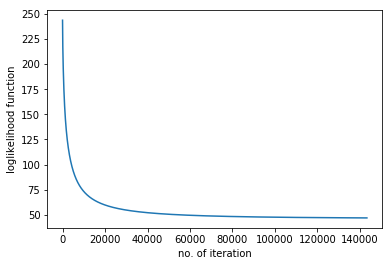

In [5]:
j_iter1=np.array([j_iter])
plt.plot(abs(j_iter1).T)
plt.xlabel('no. of iteration')
plt.ylabel('loglikelihood function')
plt.show()

[[ 5.53243936 -1.63732273]]


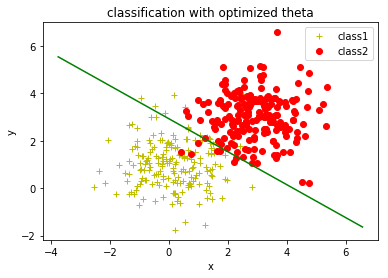

In [7]:
plt.plot(X1[:,0],X1[:,1],'y+',label='class1')
plt.plot(X2[:,0],X2[:,1],'ro',label='class2')
x_value= np.array([np.min(X1[:,1])-2,np.max(X2[:,1])])
plot_x=np.matrix(x_value)
y_value=-(theta_opt[0] +theta_opt[2]*plot_x)/theta_opt[1]
print(y_value)
plt.plot(plot_x.T,y_value.T, 'g-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('classification with optimized theta')
plt.show()